In [2]:
import os, subprocess
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)
# os.chdir('./drive/Shareddrives/CP3/TargetMol/FrozenVersions')
os.chdir('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions')

In [2]:
ls

 Volume in drive D is DataHome2T
 Volume Serial Number is E4C4-4C69

 Directory of D:\Akshar\ScottLokeyLab\TargetMol-CP3\TargetMol-CP3\FrozenVersions

2024-08-25  08:41    <DIR>          .
2024-08-25  08:41    <DIR>          ..
2024-05-20  12:13             6,148 .DS_Store
2024-05-28  15:24           483,880 AUC.png
2024-05-11  15:03    <DIR>          catboost_info
2024-08-11  22:54        43,793,405 FeatRed08_noPMA_catboost.pkl
2024-08-24  17:19       219,425,589 FeatRed08_noPMA_catboost_3compClass.pkl
2024-08-11  22:54        43,790,797 FeatRed08_PMA_catboost.pkl
2024-08-24  10:23       219,423,125 FeatRed08_PMA_catboost_3compClass.pkl
2024-08-11  22:54        43,953,221 FeatRed08_PMA+noPMA_catboost.pkl
2024-08-24  19:54       219,585,141 FeatRed08_PMA+noPMA_catboost_3compClass.pkl
2024-08-05  12:10        20,460,603 FinalClean_TM_1+10_noPMA_dropna_UMAP_longtrain.csv
2024-07-19  12:48       199,336,707 FinalClean_TM_1+10_noPMA_FeatRed_full_0.8.csv
2024-08-05  12:10        20,514,604 

In [3]:
# import copy

# import umap
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# # import torch
# # import torch.nn as nn
# # import torch.optim as optim
# import tqdm
# import pickle, glob
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# print(torch.cuda.is_available())
# print(torch.cuda.current_device())

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import top_k_accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder

import joblib
import copy
import pickle, glob
from collections import Counter
from imblearn.over_sampling import SMOTE

from pycaret.classification import * #as pyclassify

sm=SMOTE(random_state=15)

C:\ProgramData\Miniconda3\envs\MOAST\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
# Key = pd.read_excel('/content/drive/Shareddrives/CP3/TargetMol/AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx',index_col='IDname',sheet_name='reducedKey')
Key = pd.read_excel(
    "../AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx",
    index_col="IDname",
    sheet_name="reducedKey",
)

# pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [4]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE


sm=SMOTE(random_state=15)

In [39]:
# !pip install umap-learn
# import glob
[ix for ix in globals().keys() if not ix.startswith('_')]


['In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 'open',
 'os',
 'subprocess',
 'copy',
 'umap',
 'plt',
 'np',
 'pd',
 'tqdm',
 'pickle',
 'glob',
 'train_test_split',
 'OneHotEncoder',
 'Key',
 'HistGradientBoostingClassifier',
 'confusion_matrix',
 'accuracy_score',
 'precision_score',
 'ConfusionMatrixDisplay',
 'LabelEncoder',
 'StandardScaler',
 'Counter',
 'SMOTE',
 'sm',
 'full_horizconcat_PMA_noPMA',
 'ClassificationExperiment',
 'setup',
 'create_model',
 'compare_models',
 'ensemble_model',
 'tune_model',
 'blend_models',
 'stack_models',
 'plot_model',
 'evaluate_model',
 'interpret_model',
 'calibrate_model',
 'optimize_threshold',
 'predict_model',
 'finalize_model',
 'deploy_model',
 'save_model',
 'load_model',
 'automl',
 'pull',
 'models',
 'get_metrics',
 'add_metric',
 'remove_metric',
 'get_logs',
 'get_config',
 'set_config',
 'save_experiment',
 'load_experiment',
 'get_leaderboard',
 'set_current_experiment',
 'get_current_experiment',
 'dashboard',
 'convert_m

In [6]:

UMAP_Fullcor_transformer_05 = umap.UMAP(metric='correlation',
                                        n_components=32,
                                        n_neighbors=10,
                                        min_dist=0.5,
                                        angular_rp_forest=True,
                                        verbose=True,
                                        low_memory=True,
                                        # random_state=15
                                        )
# UMAP_Fullcor_transformer_08 = umap.UMAP(metric='correlation',
#                                         n_components=100,
#                                         n_neighbors=10,
#                                         min_dist=0.8,
#                                         angular_rp_forest=True,
#                                         verbose=True,
#                                         low_memory=True,
#                                         random_state=15)

In [3]:
# full_longconcat_PMA_noPMA = pd.read_csv(
#     '/content/drive/Shareddrives/CP3/TargetMol/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv',
#     index_col=0)
# full_longconcat_PMA_noPMA = pd.read_csv(
#     "TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv",
#     index_col=0,
# )
full_horizconcat_PMA_noPMA = pd.read_csv(
    "TargetMol_1-27_1uM+10uM_PMA+noPMA_horizconcat_HD_IDnames.csv",
    index_col=0
)
#  FrozenVersions/TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv
# full_noPMA = FrozenVersions/TargetMol_1-27_1uM+10uM_noPMA_horizconcat_HDpy_IDnames.csv

In [7]:
full_longconcat_PMA_noPMA = \
full_longconcat_PMA_noPMA.drop(index=[ix for ix in
                                      full_longconcat_PMA_noPMA.index if
                                      ix.split('._.')[-1] in ['SP7201','SP2701PMA',
                                                              'SP7203','SP7203PMA',
                                                              'SP7208','SP7208PMA']]).rename(index=lambda ix: ix.replace('_rep',''))

full_noPMA = full_longconcat_PMA_noPMA.loc[[ix for ix in full_longconcat_PMA_noPMA.index if not ix.split('._.')[-1].endswith('PMA')]].copy()
full_PMA = full_longconcat_PMA_noPMA.loc[[ix for ix in full_longconcat_PMA_noPMA.index if ix.split('._.')[-1].endswith('PMA')]].copy()
# full_longconcat_PMA_noPMA['ConditionStatus'] = [1 if ix.endswith('PMA') else 0 for ix in full_longconcat_PMA_noPMA.index]

In [5]:
display(
    # full_longconcat_PMA_noPMA,
    full_horizconcat_PMA_noPMA,
    # full_noPMA,
    # full_PMA
       )

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA  \
Index                                                                                           
DMSO._.NA._.A01._.SP7201                                              -0.001183                 
DMSO._.NA._.A01._.SP7202                                              -0.001054                 
DMSO._.NA._.A01._.SP7203                                              -0.001047                 
DMSO._.NA._.A01._.SP7204                                               0.000891                 
DMSO._.NA._.A01._.SP7205                                               0.000366                 
...                                                                         ...                 
well_R._.10uM._.P05._.SP7237                                           0.000112                 
T5468._.10uM._.P06._.SP7237                                           -0.000558                 
T6603._.10uM._.P07._.SP7237                                           -0.000031                 
T5400._.10uM._.P08._.SP7237                                            0.000430                 
T5110._.10uM._.P09._.SP7237                                           -0.001462                 

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000748                   
DMSO._.NA._.A01._.SP7202                                              -0.012746                   
DMSO._.NA._.A01._.SP7203                                              -0.002379                   
DMSO._.NA._.A01._.SP7204                                              -0.006452                   
DMSO._.NA._.A01._.SP7205                                              -0.007824                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000221                   
T5468._.10uM._.P06._.SP7237                                           -0.000016                   
T6603._.10uM._.P07._.SP7237                                            0.000052                   
T5400._.10uM._.P08._.SP7237                                           -0.000076                   
T5110._.10uM._.P09._.SP7237                                           -0.002479                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA  \
Index                                                                                       

In [16]:
feats_08 = [x for x in open("../FeatureReducedHD/longConcat/lsts/FeatRed_Output_full_0.8.lst",'r').read().split('\n') if x != ""]
display(len(feats_08), len(feats_08)*2)
Red08_PMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 and col.split('_')[-1] == 'PMA']].copy()
Red08_noPMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 and col.split('_')[-1] == 'noPMA']].copy()
Red08_PMA_noPMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 ]].copy()
display(Red08_noPMA,Red08_PMA,Red08_PMA_noPMA)

482

964

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_noPMA  \
Index                                                                                               
DMSO._.NA._.A01._.SP7201                                              -0.002048                     
DMSO._.NA._.A01._.SP7202                                               0.000480                     
DMSO._.NA._.A01._.SP7203                                               0.009870                     
DMSO._.NA._.A01._.SP7204                                               0.008087                     
DMSO._.NA._.A01._.SP7205                                               0.002025                     
...                                                                         ...                     
well_R._.10uM._.P05._.SP7237                                          -0.053484                     
T5468._.10uM._.P06._.SP7237                                            0.009922                     
T6603._.10uM._.P07._.SP7237                                           -0.093527                     
T5400._.10uM._.P08._.SP7237                                           -0.101198                     
T5110._.10uM._.P09._.SP7237                                           -0.125958                     

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_noPMA  \
Index                                                                                                          
DMSO._.NA._.A01._.SP7201                                               0.000575                                
DMSO._.NA._.A01._.SP7202                                               0.002342                                
DMSO._.NA._.A01._.SP7203                                               0.000128                                
DMSO._.NA._.A01._.SP7204                                               0.001614                                
DMSO._.NA._.A01._.SP7205                                               0.002133                                
...                                                                         ...                                
well_R._.10uM._.P05._.SP7237                                           0.000552                                
T5468._.10uM._.P06._.SP7237                                            0.002881                                
T6603._.10uM._.P07._.SP7237                                            0.000937                                
T5400._.10uM._.P08._.SP7237                                            0.001138                                
T5110._.10uM._.P09._.SP7237                                           -0.001780                                

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_noPMA  \
Index                                                                                          
DMSO._.NA._.A01._.SP7201                                              -0.000215                
DMSO._.NA._.A01._.SP7202                                               0.000212                
DMSO._.NA._.A01._.SP7203                                               0.015432                
DMSO._.NA._.A01._.SP7204                                               0.001792                
DMSO._.NA._.A01._.SP7205                                               0.000387                
...                                                                         ...                
well_R._.10uM._.P05._.SP7237                                           0.007239                
T5468._.10uM._.P06._.SP7237                                           -0.001056                
T6603._.10uM._.P07._.SP7237                                            0.000855                
T5400._.10uM._.P08._.SP7237                                            0.008509                
T5110._.10uM._.P09._.SP7237                                           -0.003791                

          

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_PMA  \
Index                                                                                                        
DMSO._.NA._.A01._.SP7201                                              -0.003379                              
DMSO._.NA._.A01._.SP7202                                              -0.004178                              
DMSO._.NA._.A01._.SP7203                                              -0.005073                              
DMSO._.NA._.A01._.SP7204                                               0.008139                              
DMSO._.NA._.A01._.SP7205                                               0.005761                              
...                                                                         ...                              
well_R._.10uM._.P05._.SP7237                                           0.001511                              
T5468._.10uM._.P06._.SP7237                                            0.003446                              
T6603._.10uM._.P07._.SP7237                                            0.001358                              
T5400._.10uM._.P08._.SP7237                                            0.000311                              
T5110._.10uM._.P09._.SP7237                                            0.001920                              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_PMA  \
Index                                                                                        
DMSO._.NA._.A01._.SP7201                                               0.001452              
DMSO._.NA._.A01._.SP7202                                              -0.003001              
DMSO._.NA._.A01._.SP7203                                               0.001006              
DMSO._.NA._.A01._.SP7204                                               0.002194              
DMSO._.NA._.A01._.SP7205                                               0.000359              
...                                                                         ...              
well_R._.10uM._.P05._.SP7237                                           0.000106              
T5468._.10uM._.P06._.SP7237                                           -0.000349              
T6603._.10uM._.P07._.SP7237                                           -0.000132              
T5400._.10uM._.P08._.SP7237                                            0.007524              
T5110._.10uM._.P09._.SP7237                                           -0.014605              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Symmetry_05_S

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_PMA  \
Index                                                                                                        
DMSO._.NA._.A01._.SP7201                                              -0.003379                              
DMSO._.NA._.A01._.SP7202                                              -0.004178                              
DMSO._.NA._.A01._.SP7203                                              -0.005073                              
DMSO._.NA._.A01._.SP7204                                               0.008139                              
DMSO._.NA._.A01._.SP7205                                               0.005761                              
...                                                                         ...                              
well_R._.10uM._.P05._.SP7237                                           0.001511                              
T5468._.10uM._.P06._.SP7237                                            0.003446                              
T6603._.10uM._.P07._.SP7237                                            0.001358                              
T5400._.10uM._.P08._.SP7237                                            0.000311                              
T5110._.10uM._.P09._.SP7237                                            0.001920                              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_PMA  \
Index                                                                                        
DMSO._.NA._.A01._.SP7201                                               0.001452              
DMSO._.NA._.A01._.SP7202                                              -0.003001              
DMSO._.NA._.A01._.SP7203                                               0.001006              
DMSO._.NA._.A01._.SP7204                                               0.002194              
DMSO._.NA._.A01._.SP7205                                               0.000359              
...                                                                         ...              
well_R._.10uM._.P05._.SP7237                                           0.000106              
T5468._.10uM._.P06._.SP7237                                           -0.000349              
T6603._.10uM._.P07._.SP7237                                           -0.000132              
T5400._.10uM._.P08._.SP7237                                            0.007524              
T5110._.10uM._.P09._.SP7237                                           -0.014605              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Symmetry_05_S

### UMAP training and Histgram gradient boosted classifier below (with Adam)

divert to below past that and do the pilot that Chris suggested, but with pycaret model selection


In [49]:
UMAP_Fullcor_transformer_05.fit(full_longconcat_PMA_noPMA)
# UMAP_Fullcor_transformer_08.fit(full_longconcat_PMA_noPMA)

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.5, n_components=32, n_neighbors=10, verbose=True)
Wed May  8 09:15:27 2024 Construct fuzzy simplicial set
Wed May  8 09:15:28 2024 Finding Nearest Neighbors
Wed May  8 09:15:28 2024 Building RP forest with 15 trees
Wed May  8 09:15:33 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Wed May  8 09:15:38 2024 Finished Nearest Neighbor Search
Wed May  8 09:15:39 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed May  8 09:15:59 2024 Finished embedding


UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.5, n_components=32, n_neighbors=10, verbose=True)

In [50]:
pd.DataFrame(UMAP_Fullcor_transformer_05.embedding_,
             index=full_longconcat_PMA_noPMA.index,
             columns=[f'UMAP_{i}' for i in range(UMAP_Fullcor_transformer_05.embedding_.shape[1])]).\
             to_csv('UMAP-05Correlation_PMA+noPMA_longtrain_forViz32.csv')
pickle.dump(UMAP_Fullcor_transformer_05,open('TargetMol_1-27_DMSO+PMA_longConcat_HDpy_32-UMAPTransformer_05.pkl','wb'))

Wed May  8 09:16:06 2024 Worst tree score: 0.48080002
Wed May  8 09:16:06 2024 Mean tree score: 0.48710523
Wed May  8 09:16:06 2024 Best tree score: 0.49272384
Wed May  8 09:17:22 2024 Forward diversification reduced edges from 418490 to 179935
Wed May  8 09:17:22 2024 Reverse diversification reduced edges from 179935 to 179935
Wed May  8 09:17:22 2024 Degree pruning reduced edges from 196836 to 196752
Wed May  8 09:17:22 2024 Resorting data and graph based on tree order
Wed May  8 09:17:23 2024 Building and compiling search function


CRASHED IN COLAB, run locally to pickle the transformer

In [ ]:
# clean up so session can continue:

del UMAP_Fullcor_transformer_05
del full_longconcat_PMA_noPMA

In [60]:
UMAP_PMA_noPMA_long = pd.read_csv('UMAP-05Correlation_PMA+noPMA_longtrain_forViz32.csv',index_col=0)

In [61]:

UMAP_PMA_noPMA_long

UMAP_0    UMAP_1    UMAP_2    UMAP_3  \
Index                                                                         
T6207._.1uM._.F15._.SP7209          10.090886  5.052136  4.881418  4.738885   
T4564._.1uM._.E08._.SP7209           9.939390  4.611807  5.127284  4.704180   
T5009._.1uM._.B19._.SP7209          10.045341  4.903805  4.655822  4.461192   
T4687._.1uM._.C12._.SP7209           9.914505  4.415075  4.772063  4.582568   
T5039._.1uM._.G01._.SP7209          10.163999  4.842081  4.710031  4.763267   
...                                       ...       ...       ...       ...   
DMSO_R._.10uM._.E20._.SP7237        10.078830  5.164226  4.983796  4.415852   
DMSO_R._.10uM._.M13._.SP7237        10.143600  5.340949  4.854854  4.628224   
Alrestatin_3._.10uM._.M20._.SP7237  10.070156  5.148691  5.019887  4.426306   
LY2109761_2._.10uM._.I06._.SP7237   10.074141  4.915942  4.878625  3.969652   
TCS7004_3._.10uM._.K21._.SP7237     10.181237  5.413793  4.951038  4.650558   

                                      UMAP_4    UMAP_5    UMAP_6    UMAP_7  \
Index                                                                        
T6207._.1uM._.F15._.SP7209          5.113330  5.414153  5.127252  4.674124   
T4564._.1uM._.E08._.SP7209          5.285728  5.434961  5.058163  4.236338   
T5009._.1uM._.B19._.SP7209          5.106221  5.300361  5.082241  4.503002   
T4687._.1uM._.C12._.SP7209          5.228135  5.320306  5.096903  4.169943   
T5039._.1uM._.G01._.SP7209          5.430968  5.778573  5.386496  4.219949   
...                                      ...       ...       ...       ...   
DMSO_R._.10uM._.E20._.SP7237        5.174717  5.295700  4.999789  4.313021   
DMSO_R._.10uM._.M13._.SP7237        5.238486  5.517802  5.041416  4.354017   
Alrestatin_3._.10uM._.M20._.SP7237  5.110282  5.216389  5.003748  4.333258   
LY2109761_2._.10uM._.I06._.SP7237   5.349986  5.329632  4.981284  4.268656   
TCS7004_3._.10uM._.K21._.SP7237     5.227183  5.523026  5.044275  4.836939   

                                      UMAP_8    UMAP_9  ...   UMAP_22  \
Index                                                   ...             
T6207._.1uM._.F15._.SP7209          5.043215  5.063142  ...  4.430237   
T4564._.1uM._.E08._.SP7209          5.023254  5.126436  ...  3.985810   
T5009._.1uM._.B19._.SP7209          5.195264  5.051910  ...  4.463306   
T4687._.1uM._.C12._.SP7209          5.174308  5.090621  ...  3.955798   
T5039._.1uM._.G01._.SP7209          4.676788  4.939623  ...  3.476991   
...                                      ...       ...  ...       ...   
DMSO_R._.10uM._.E20._.SP7237        5.198644  4.983038  ...  5.237860   
DMSO_R._.10uM._.M13._.SP7237        4.886591  4.853280  ...  5.215344   
Alrestatin_3._.10uM._.M20._.SP7237  5.290152  5.029452  ...  5.257022   
LY2109761_2._.10uM._.I06._.SP7237   5.223960  5.014132  ...  4.747195   
TCS7004_3._.10uM._.K21._.SP7237     4.912277  4.925801  ...  5.123422   

                                     UMAP_23   UMAP_24   UMAP_25   UMAP_26  \
Index                                                                        
T6207._.1uM._.F15._.SP7209          5.389545  5.475818  5.006559  6.013773   
T4564._.1uM._.E08._.SP7209          5.501154  4.998137  5.205487  4.913028   
T5009._.1uM._.B19._.SP7209          5.149418  6.002771  4.716347  5.476350   
T4687._.1uM._.C12._.SP7209          5.273797  5.718386  4.765610  4.725170   
T5039._.1uM._.G01._.SP7209          5.845829  5.275087  4.685457  4.744802   
...                                      ...       ...       ...       ...   
DMSO_R._.10uM._.E20._.SP7237        5.315012  5.300344  4.846986  5.105229   
DMSO_R._.10uM._.M13._.SP7237        5.716958  5.403866  5.060843  5.288319   
Alrestatin_3._.10uM._.M20._.SP7237  5.244139  5.181266  4.730333  5.021672   
LY2109761_2._.10uM._.I06._.SP7237   5.144237  5.782391  5.057224  5.289293   
TCS7004_3._.10uM._.K21._.SP7237     5.578711  5.386579  5.402726  6.735461   

                               

In [62]:
scalar = StandardScaler().fit(UMAP_PMA_noPMA_long)
pickle.dump(scalar,open('TargetMol_1-27_DMSO+PMA_longConcat_HDpy-32_UMAPTransScalar_05.pkl','wb'))

In [63]:
scaled_UMAP_PMA_noPMA_long = pd.DataFrame(scalar.transform(UMAP_PMA_noPMA_long),
                                          index=UMAP_PMA_noPMA_long.index,
                                          columns=UMAP_PMA_noPMA_long.columns)

scaled_UMAP_PMA_noPMA_long['ConditionStatus'] = [1 if ix.endswith('PMA') else 0 for ix in scaled_UMAP_PMA_noPMA_long.index]

In [75]:
scaled_UMAP_PMA_noPMA_long.dtypes

UMAP_0             float64
UMAP_1             float64
UMAP_2             float64
UMAP_3             float64
UMAP_4             float64
UMAP_5             float64
UMAP_6             float64
UMAP_7             float64
UMAP_8             float64
UMAP_9             float64
UMAP_10            float64
UMAP_11            float64
UMAP_12            float64
UMAP_13            float64
UMAP_14            float64
UMAP_15            float64
UMAP_16            float64
UMAP_17            float64
UMAP_18            float64
UMAP_19            float64
UMAP_20            float64
UMAP_21            float64
UMAP_22            float64
UMAP_23            float64
UMAP_24            float64
UMAP_25            float64
UMAP_26            float64
UMAP_27            float64
UMAP_28            float64
UMAP_29            float64
UMAP_30            float64
UMAP_31            float64
ConditionStatus      int64
dtype: object

In [24]:
set([ix.split('._.')[-1] for ix in scaled_UMAP_PMA_noPMA_long.index])

{'SP7201',
 'SP7201PMA',
 'SP7201PMA_rep',
 'SP7201_rep',
 'SP7202',
 'SP7202PMA',
 'SP7203',
 'SP7203PMA',
 'SP7203PMA_rep',
 'SP7203_rep',
 'SP7204',
 'SP7204PMA',
 'SP7205',
 'SP7205PMA',
 'SP7206',
 'SP7206PMA',
 'SP7207',
 'SP7207PMA',
 'SP7208',
 'SP7208PMA',
 'SP7208PMA_rep',
 'SP7208_rep',
 'SP7209',
 'SP7209PMA',
 'SP7210',
 'SP7210PMA',
 'SP7211',
 'SP7211PMA',
 'SP7212',
 'SP7212PMA',
 'SP7213',
 'SP7213PMA',
 'SP7214',
 'SP7214PMA',
 'SP7215',
 'SP7215PMA',
 'SP7216',
 'SP7216PMA',
 'SP7217',
 'SP7217PMA',
 'SP7218',
 'SP7218PMA',
 'SP7219',
 'SP7219PMA',
 'SP7220',
 'SP7220PMA',
 'SP7221',
 'SP7221PMA',
 'SP7222',
 'SP7222PMA',
 'SP7223',
 'SP7223PMA',
 'SP7224',
 'SP7224PMA',
 'SP7225',
 'SP7225PMA',
 'SP7226',
 'SP7226PMA',
 'SP7227',
 'SP7227PMA',
 'SP7229',
 'SP7229PMA',
 'SP7230',
 'SP7230PMA',
 'SP7231',
 'SP7231PMA',
 'SP7232',
 'SP7232PMA',
 'SP7233',
 'SP7233PMA',
 'SP7234',
 'SP7234PMA',
 'SP7235',
 'SP7235PMA',
 'SP7236',
 'SP7236PMA',
 'SP7237',
 'SP7237PMA',
 

In [79]:
combined = pd.merge(left=scaled_UMAP_PMA_noPMA_long,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
X = combined.iloc[:, :-1].values
y = combined['AL_CONSOLIDATED'].values.reshape(-1,1)

In [8]:
classed_to_consider = [x for x in Key['AL_CONSOLIDATED'].value_counts()[Key['AL_CONSOLIDATED'].value_counts()>100].index.to_list()]
classed_to_consider = [c for c in classed_to_consider if c != 'Others']
display(classed_to_consider)

['Collected_Controls',
 'Metabolite',
 'COX',
 'AChR',
 'Apoptosis_Autophagy',
 'Antibacterial',
 'Adrenergic_Receptor',
 '5-HT',
 'Dopamine',
 'DNA/RNA_Associated',
 'NFkB',
 'PI3K',
 'Histamine_Receptor',
 'Topoisomerase',
 'Estrogen_Receptor',
 'CDK',
 'EGFR',
 'Sodium_Channel',
 'Calcium_Channel',
 'GABA',
 'Penicillin_Binding',
 'Cytochrome',
 'Potassium_Channel',
 'Bacterial_Ribosome',
 'HDAC',
 'PDE',
 'PPAR',
 'Microtubule_Associated',
 'Antioxidant',
 'Transient_Receptor',
 'Glucocorticoid_Receptor',
 'JAK',
 'MAO',
 'Androgen_Receptor',
 'VEGFR',
 'Antifungal',
 'HIV',
 'Prostaglandin',
 'MAPK',
 'Tyrosine_Kinase',
 'AMPK',
 'HSP',
 'Opioid_Receptor',
 'mTOR',
 'PARP',
 'AKT',
 'Mitochondria_Associated',
 'HIF',
 'c-Met_HGFR',
 'FGFR',
 'TGF',
 'STAT',
 'NOS',
 'ROS',
 'Wnt/beta-Catenin',
 'Fatty_Acid',
 'ERK',
 'Sirtuin',
 'Histone_Methyltransferase',
 'Parasite',
 'Serotonin',
 'BCL',
 'Steroid_Biosynthesis',
 'PKC',
 'GPCR',
 'TLR',
 'NMDA_Receptor',
 'Anti-infection',
 'A

In [81]:
cat_mask = np.zeros(33)
cat_mask[-1] = 1
display(cat_mask)
y_special = [y if y in classed_to_consider else 'Others' for y in combined['AL_CONSOLIDATED']]
X_res, y_res = sm.fit_resample(X,y_special)
print(f"Resampled dataset shape {Counter(y_res)}")

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Resampled dataset shape Counter({'Others': 15828, 'Dopamine': 15828, 'DNA/RNA_Associated': 15828, 'AURK': 15828, 'PDE': 15828, 'Collected_Controls': 15828, 'Calcium_Channel': 15828, 'Transient_Receptor': 15828, 'Adrenergic_Receptor': 15828, 'MAO': 15828, 'Metabolite': 15828, 'STAT': 15828, 'GPCR': 15828, 'Microtubule_Associated': 15828, 'Histamine_Receptor': 15828, 'Penicillin_Binding': 15828, 'TGF': 15828, 'Sodium_Channel': 15828, 'Topoisomerase': 15828, 'EGFR': 15828, 'Antibacterial': 15828, 'ERK': 15828, 'HDAC': 15828, 'Antifungal': 15828, 'COX': 15828, 'GABA': 15828, 'PI3K': 15828, 'Glucocorticoid_Receptor': 15828, 'Histone_Methyltransferase': 15828, 'FGFR': 15828, 'Fatty_Acid': 15828, 'BCL': 15828, 'c-Met_HGFR': 15828, 'AChR': 15828, 'DUB': 15828, 'Apoptosis_Autophagy': 15828, '5-HT': 15828, 'NOS': 15828, 'Cannabinoid_Receptor': 15828, 'Progesterone_Receptor': 15828, 'CDK': 15828, 'Wnt/beta-Catenin': 15828, 'Potassium_Channel': 15828, 'Cytochrome': 15828, 'PPAR': 15828, 'Steroid_B

In [100]:
def stupid_typeCast(x):
    x[-1] = True if 1 else False
    return x
display(pd.DataFrame(X_train))
display(pd.DataFrame(np.apply_along_axis(stupid_typeCast,1,X_train)))

0         1         2         3         4         5         6   \
0       0.292759  0.228831 -1.013913 -0.418841  1.219225  1.317693  0.311815   
1       0.115681  0.037464  0.295511 -0.562918 -0.784518 -0.909587  0.360722   
2       0.000289  0.277977 -0.031305 -0.142375 -0.518204 -0.714993 -0.401646   
3       0.023274  0.380507  0.208031  1.233002 -0.515618 -0.102321 -0.057324   
4       0.314117  0.546024 -0.187602 -0.661026 -0.712883 -0.757780  0.200372   
...          ...       ...       ...       ...       ...       ...       ...   
952840  0.319740  0.812037  0.286091 -0.934549 -0.461541 -0.773405 -0.087249   
952841  0.379339  1.294649  1.315242 -0.152666  0.189403  0.155641 -0.228630   
952842  0.136975  0.447612  0.889945 -0.574302  0.697914  0.519357 -0.380556   
952843 -0.245425 -0.610162  0.324235  0.077158  0.108827  0.212438 -0.112644   
952844  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

              7         8         9   ...        23        24        25  \
0       0.019413 -1.439477 -1.213990  ...  0.925254  1.961301  1.218834   
1      -0.364997  1.203911  0.778339  ... -1.724359 -0.295165 -1.553339   
2      -0.113560  0.714670  0.219184  ...  0.014856 -0.744087 -0.908927   
3       0.692460 -0.088640 -0.138470  ...  0.399123 -0.823621 -0.141952   
4       0.317550  1.030085  0.428629  ... -1.082701  0.170331 -1.095384   
...          ...       ...       ...  ...       ...       ...       ...   
952840 -0.535201  1.054231  0.094912  ... -0.876774 -0.348935 -1.196154   
952841 -0.423964 -0.093976 -0.188552  ...  0.307141 -1.677488 -0.042070   
952842  0.329205 -0.404371  0.215549  ...  0.114944 -0.817840  1.051519   
952843  0.197359 -0.211299  0.526641  ... -0.230451  0.127617  0.747535   
952844  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   

              26        27        28        29        30        31        32  
0       0.673001  1.074713  0.326084  0.779054 -0.969938 -0.982510  0.000000  
1      -0.716663 -1.648539  1.783933  0.364249 -0.136214  0.455902  1.000000  
2      -0.859606  0.315399 -1.213341 -1.685972  1.459784 -1.625890  0.372006  
3       0.221366  0.141117 -0.803259 -0.825757  1.736117  0.139146  1.000000  
4       0.548575  0.008661  0.647557  0.218970 -0.371381  1.214182  1.000000  
...          ...       ...       ...       ...       ...       ...       ...  
952840 -0.353974  0.486353 -0.279178 -0.740140  0.025181  0.896848  1.000000  
952841 -0.449784  0.316906 -1.620422 -1.156724  0.248237  0.240999  1.000000  
952842  0.887224 -0.567893 -0.374611 -0.360552 -1.468190  0.690442  0.000000  
952843  0.258647 -0.805906  0.756457  1.361020 -1.112432  0.234855  0.000000  
952844  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[952845 rows x 33 columns]

0         1         2         3         4         5         6   \
0       0.292759  0.228831 -1.013913 -0.418841  1.219225  1.317693  0.311815   
1       0.115681  0.037464  0.295511 -0.562918 -0.784518 -0.909587  0.360722   
2       0.000289  0.277977 -0.031305 -0.142375 -0.518204 -0.714993 -0.401646   
3       0.023274  0.380507  0.208031  1.233002 -0.515618 -0.102321 -0.057324   
4       0.314117  0.546024 -0.187602 -0.661026 -0.712883 -0.757780  0.200372   
...          ...       ...       ...       ...       ...       ...       ...   
952840  0.319740  0.812037  0.286091 -0.934549 -0.461541 -0.773405 -0.087249   
952841  0.379339  1.294649  1.315242 -0.152666  0.189403  0.155641 -0.228630   
952842  0.136975  0.447612  0.889945 -0.574302  0.697914  0.519357 -0.380556   
952843 -0.245425 -0.610162  0.324235  0.077158  0.108827  0.212438 -0.112644   
952844  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

              7         8         9   ...        23        24        25  \
0       0.019413 -1.439477 -1.213990  ...  0.925254  1.961301  1.218834   
1      -0.364997  1.203911  0.778339  ... -1.724359 -0.295165 -1.553339   
2      -0.113560  0.714670  0.219184  ...  0.014856 -0.744087 -0.908927   
3       0.692460 -0.088640 -0.138470  ...  0.399123 -0.823621 -0.141952   
4       0.317550  1.030085  0.428629  ... -1.082701  0.170331 -1.095384   
...          ...       ...       ...  ...       ...       ...       ...   
952840 -0.535201  1.054231  0.094912  ... -0.876774 -0.348935 -1.196154   
952841 -0.423964 -0.093976 -0.188552  ...  0.307141 -1.677488 -0.042070   
952842  0.329205 -0.404371  0.215549  ...  0.114944 -0.817840  1.051519   
952843  0.197359 -0.211299  0.526641  ... -0.230451  0.127617  0.747535   
952844  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   

              26        27        28        29        30        31   32  
0       0.673001  1.074713  0.326084  0.779054 -0.969938 -0.982510  1.0  
1      -0.716663 -1.648539  1.783933  0.364249 -0.136214  0.455902  1.0  
2      -0.859606  0.315399 -1.213341 -1.685972  1.459784 -1.625890  1.0  
3       0.221366  0.141117 -0.803259 -0.825757  1.736117  0.139146  1.0  
4       0.548575  0.008661  0.647557  0.218970 -0.371381  1.214182  1.0  
...          ...       ...       ...       ...       ...       ...  ...  
952840 -0.353974  0.486353 -0.279178 -0.740140  0.025181  0.896848  1.0  
952841 -0.449784  0.316906 -1.620422 -1.156724  0.248237  0.240999  1.0  
952842  0.887224 -0.567893 -0.374611 -0.360552 -1.468190  0.690442  1.0  
952843  0.258647 -0.805906  0.756457  1.361020 -1.112432  0.234855  1.0  
952844  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  

[952845 rows x 33 columns]

In [102]:
y_special_out = LabelEncoder().fit_transform(y_res)
# y_special_out = y_special.transform(combined['AL_CONSOLIDATED'])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_special_out, train_size=0.7, shuffle=True)
X_train= np.apply_along_axis(stupid_typeCast,1,X_train)
X_test =np.apply_along_axis(stupid_typeCast,1,X_test)

In [103]:
gbc = HistGradientBoostingClassifier(random_state=15,
                                     verbose=True,
                                     max_iter=1000,
                                     l2_regularization=0.001,
                                     categorical_features=cat_mask.T.astype(bool)
                                    ).fit(X_train,y_train)
display(gbc.score(X_test,y_test))

Binning 0.226 GB of training data: 0.947 s
Binning 0.025 GB of validation data: 0.014 s
Fitting gradient boosted rounds:
[1/1000] 86 trees, 2666 leaves (31 on avg), max depth = 15, train loss: 3.95561, val loss: 3.97137, in 2.700s
[2/1000] 86 trees, 2666 leaves (31 on avg), max depth = 16, train loss: 3.73813, val loss: 3.77711, in 2.706s
[3/1000] 86 trees, 2666 leaves (31 on avg), max depth = 20, train loss: 3.59646, val loss: 3.68267, in 2.803s
[4/1000] 86 trees, 2666 leaves (31 on avg), max depth = 21, train loss: 3.43323, val loss: 3.54572, in 2.833s
[5/1000] 86 trees, 2666 leaves (31 on avg), max depth = 19, train loss: 3.30715, val loss: 3.43480, in 2.827s
[6/1000] 86 trees, 2666 leaves (31 on avg), max depth = 16, train loss: 3.18851, val loss: 3.35878, in 2.911s
[7/1000] 86 trees, 2666 leaves (31 on avg), max depth = 17, train loss: 3.10016, val loss: 3.29331, in 2.926s
[8/1000] 86 trees, 2666 leaves (31 on avg), max depth = 19, train loss: 3.05074, val loss: 3.32704, in 2.956s

0.5398750621383426

<Figure size 2000x1000 with 0 Axes>

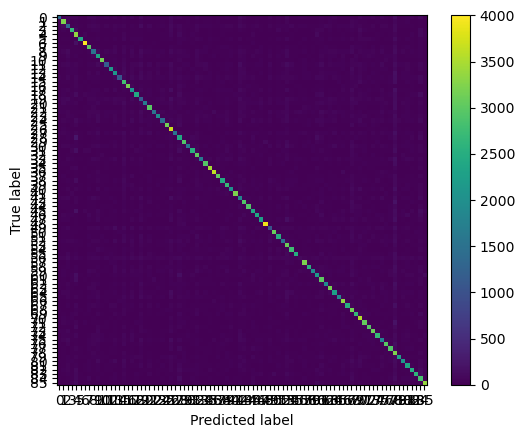

In [44]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.figure(figsize=(20,10))
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test,include_values=False) #,normalize='all'
# pcm = ax[0].imshow(g,norm=colors.PowerNorm(gamma=1./2.))
# fig.colorbar(pcm, ax=ax[0],extend='max')
# pcm = ax[1].imshow(g)
# fig.colorbar(pcm, ax=ax[1],extend='max')
plt.show()
plt.close()

In [9]:
import joblib

# joblib.dump(gbc,"histGradientBoostClass_UMAP-32_PMA+noPMA_longtrain_05_wSMOTE.joblib")

In [46]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
clf_score = cross_val_score(gbc, X_res, y_special_out, cv=5, n_jobs=-1, verbose=1)
print(clf_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min finished


[0.55963444 0.53179891 0.54874707 0.5066173  0.56287628]


### See if we can't get some of the different model testing in pycaret going

#### pilot
balanced cross validation aout of classes consider (>100 examples in reducedKey)
5-fold stratified train-test (exlude Others, condense all controls into 'Collected_Controls')

** full 5880 feature set **

plain-jane CV-RF model in scikit-learn, what's the accuracy and balanced accuracy (if possible also per-class accuracy)


whole matrix with >100 train full model on that, to get feature importance (rank by featureImportance, then make a waterfall plot) -> gives idea of what features can ignore

confidence placed on RF predictions should output
save the model

In [10]:
# import sklearn
# print(sklearn.__version__)
# import pycaret
# print(pycaret.__version__)

1.4.2
3.3.2


In [3]:
import pycaret

In [44]:
# preprep the datasets
# [ix for ix in globals().keys() if not ix.startswith('_')]
display(classed_to_consider)
# full_horizconcat_PMA_noPMA,
#     full_noPMA,
#     full_PMA
#start with concatenating the labels onto the different dataframes, then drop rows that aren't in the 'classed_to_consider'
full_noPMA_labeled = pd.merge(left=full_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
# full_horizconcat_PMA_noPMA_labeled = pd.merge(left=full_horizconcat_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)

full_noPMA_labeled = full_noPMA_labeled.loc[full_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]


['4-hydroxyphenylpyruvate_dioxygenase',
 '5-alpha_reductase',
 '5-HT',
 '8-oxoguanine_DNA_glycosylase',
 'ABC',
 'ACAT',
 'ACE',
 'Acetyl-CoA_Carboxylase',
 'AChE',
 'AChR',
 'aconitase',
 'Acyl-CoA:cholesterol_acyltransferase',
 'Acyltransferase',
 'Adenosine_deaminase',
 'Adenosine_Kinase',
 'Adenosine_Receptor',
 'Adenylyl_Cyclase',
 'Adiponectin_Receptor',
 'Adrenergic_Receptor',
 'AGE',
 'AKR1',
 'AKT',
 'Alcohol_dehydrogenase',
 'ALDH',
 'Aldose_reductase',
 'ALK',
 'alpha-glucosidase',
 'Amino_Acids_and_Derivatives',
 'Aminopeptidase',
 'AMPA_Receptor',
 'AMPK',
 'Androgen_Receptor',
 'Anti-infection',
 'Antibacterial',
 'Antibacterial_and_Antifungal',
 'Antibacterial,_Antifungal',
 'Antibiotic',
 'Antifungal',
 'Antimalarial',
 'Antioxidant',
 'Antiviral',
 'Apoptosis_Autophagy',
 'Arginase',
 'Aromatase',
 'Aromatic_L-amino_acid_decarboxylase',
 'Arp2/3_complex',
 'Aryl_Hydrocarbon_Receptor',
 'AT_Receptor',
 'ATM/ATR',
 'ATP_Citrate_Lyase',
 'ATPase',
 'AURK',
 'Autotaxin_(AT

NameError: name 'full_noPMA' is not defined

In [12]:
display(full_horizconcat_PMA_noPMA_labeled, full_noPMA_labeled)

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA  \
DMSO._.NA._.A01._.SP7201                                                     -0.001183                 
DMSO._.NA._.A01._.SP7202                                                     -0.001054                 
DMSO._.NA._.A01._.SP7203                                                     -0.001047                 
DMSO._.NA._.A01._.SP7204                                                      0.000891                 
DMSO._.NA._.A01._.SP7205                                                      0.000366                 
...                                                                                ...                 
T5155._.10uM._.P21._.SP7237                                                  -0.000018                 
T4572._.10uM._.P23._.SP7237                                                  -0.004322                 
food_coloring._.10uM._.P24._.SP7237                                           0.000278                 
T5271._.10uM._.P03._.SP7237                                                   0.003777                 
T5400._.10uM._.P08._.SP7237                                                   0.000430                 

                                     Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA  \
DMSO._.NA._.A01._.SP7201                                                      0.000748                   
DMSO._.NA._.A01._.SP7202                                                     -0.012746                   
DMSO._.NA._.A01._.SP7203                                                     -0.002379                   
DMSO._.NA._.A01._.SP7204                                                     -0.006452                   
DMSO._.NA._.A01._.SP7205                                                     -0.007824                   
...                                                                                ...                   
T5155._.10uM._.P21._.SP7237                                                   0.000082                   
T4572._.10uM._.P23._.SP7237                                                  -0.018533                   
food_coloring._.10uM._.P24._.SP7237                                          -0.005151                   
T5271._.10uM._.P03._.SP7237                                                   0.003133                   
T5400._.10uM._.P08._.SP7237                                                  -0.000076                   

                                     Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
DMSO._.NA._.A01._.SP7201                                                      0.000127                   
DMSO._.NA._.A01._.SP7202                                                     -0.002486                   
DMSO._.NA._.A01._.SP7203                                                      0.000004                   
DMSO._.NA._.A01._.SP7204                                                     -0.001968                   
DMSO._.NA._.A01._.SP7205                                                     -0.008492                   
...                                                                                ...                   
T5155._.10uM._.P21._.SP7237                                                   0.000058                   
T4572._.10uM._.P23._.SP7237                                                  -0.006354                   
food_coloring._.10uM._.P24._.SP7237                                          -0.000686                   
T5271._.10uM._.P03._.SP7237                                                   0.002635                   
T5400._.10uM._.P08._.SP7237                                                   0.000243                   

                                     Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA  \
DMSO._.NA._.A01._.SP7201                                                      0.000186                    
DMSO._.NA._.A01._.SP7202    

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean  \
T5009._.1uM._.B19._.SP7209                                                  -0.001428             
T4687._.1uM._.C12._.SP7209                                                  -0.001418             
T6380._.1uM._.G02._.SP7209                                                   0.000645             
T4695._.1uM._.C24._.SP7209                                                   0.000443             
DMSO._.NA._.F19._.SP7209                                                    -0.002094             
...                                                                               ...             
DMSO_R._.10uM._.E20._.SP7237                                                 0.005484             
DMSO_R._.10uM._.M13._.SP7237                                                 0.009683             
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.004580             
LY2109761_2._.10uM._.I06._.SP7237                                            0.013513             
TCS7004_3._.10uM._.K21._.SP7237                                              0.002146             

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev  \
T5009._.1uM._.B19._.SP7209                                                   0.000003               
T4687._.1uM._.C12._.SP7209                                                  -0.000141               
T6380._.1uM._.G02._.SP7209                                                   0.000190               
T4695._.1uM._.C24._.SP7209                                                   0.000631               
DMSO._.NA._.F19._.SP7209                                                    -0.000456               
...                                                                               ...               
DMSO_R._.10uM._.E20._.SP7237                                                 0.004344               
DMSO_R._.10uM._.M13._.SP7237                                                 0.006886               
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.002186               
LY2109761_2._.10uM._.I06._.SP7237                                            0.012986               
TCS7004_3._.10uM._.K21._.SP7237                                              0.000988               

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T5009._.1uM._.B19._.SP7209                                                  -0.000053               
T4687._.1uM._.C12._.SP7209                                                  -0.000144               
T6380._.1uM._.G02._.SP7209                                                  -0.001271               
T4695._.1uM._.C24._.SP7209                                                   0.003147               
DMSO._.NA._.F19._.SP7209                                                    -0.001567               
...                                                                               ...               
DMSO_R._.10uM._.E20._.SP7237                                                 0.005688               
DMSO_R._.10uM._.M13._.SP7237                                                 0.009055               
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.004470               
LY2109761_2._.10uM._.I06._.SP7237                                            0.014513               
TCS7004_3._.10uM._.K21._.SP7237                                             -0.002316               

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum  \
T5009._.1uM._.B19._.SP7209                                                  -0.001329                
T4687._.1uM._.C12._.SP7209                                                  -0.000390                
T6380._.1uM._.G02._.SP7209                                                   0.002386                
T4695._.1uM._

### need this import for pycaret things... START FROM FULL FEATURES

In [13]:
from pycaret.classification import * #as pyclassify

In [9]:
classed_to_consider = [x for x in Key['AL_CONSOLIDATED'].value_counts()[Key['AL_CONSOLIDATED'].value_counts()>100].index.to_list()]
classed_to_consider = [c for c in classed_to_consider if c != 'Others']
display(classed_to_consider)

['Collected_Controls',
 'Metabolite',
 'COX',
 'AChR',
 'Apoptosis_Autophagy',
 'Antibacterial',
 'Adrenergic_Receptor',
 '5-HT',
 'Dopamine',
 'DNA/RNA_Associated',
 'NFkB',
 'PI3K',
 'Histamine_Receptor',
 'Topoisomerase',
 'Estrogen_Receptor',
 'CDK',
 'EGFR',
 'Sodium_Channel',
 'Calcium_Channel',
 'GABA',
 'Penicillin_Binding',
 'Cytochrome',
 'Potassium_Channel',
 'Bacterial_Ribosome',
 'HDAC',
 'PDE',
 'PPAR',
 'Microtubule_Associated',
 'Antioxidant',
 'Transient_Receptor',
 'Glucocorticoid_Receptor',
 'JAK',
 'MAO',
 'Androgen_Receptor',
 'VEGFR',
 'Antifungal',
 'HIV',
 'Prostaglandin',
 'MAPK',
 'Tyrosine_Kinase',
 'AMPK',
 'HSP',
 'Opioid_Receptor',
 'mTOR',
 'PARP',
 'AKT',
 'Mitochondria_Associated',
 'HIF',
 'c-Met_HGFR',
 'FGFR',
 'TGF',
 'STAT',
 'NOS',
 'ROS',
 'Wnt/beta-Catenin',
 'Fatty_Acid',
 'ERK',
 'Sirtuin',
 'Histone_Methyltransferase',
 'Parasite',
 'Serotonin',
 'BCL',
 'Steroid_Biosynthesis',
 'PKC',
 'GPCR',
 'TLR',
 'NMDA_Receptor',
 'Anti-infection',
 'A

we should also have a handle on the full set of classes that have at least 3 compounds. used in the AUC-ROC analysis:

In [5]:
classed_to_consider = ['4-hydroxyphenylpyruvate_dioxygenase', '5-alpha_reductase', '5-HT', '8-oxoguanine_DNA_glycosylase', 'ABC', 'ACAT', 'ACE',
                       'Acetyl-CoA_Carboxylase', 'AChE', 'AChR', 'aconitase', 'Acyl-CoA:cholesterol_acyltransferase', 'Acyltransferase', 'Adenosine_deaminase',
                       'Adenosine_Kinase', 'Adenosine_Receptor', 'Adenylyl_Cyclase', 'Adiponectin_Receptor', 'Adrenergic_Receptor', 'AGE', 'AKR1', 'AKT',
                       'Alcohol_dehydrogenase', 'ALDH', 'Aldose_reductase', 'ALK', 'alpha-glucosidase', 'Amino_Acids_and_Derivatives', 'Aminopeptidase',
                       'AMPA_Receptor', 'AMPK', 'Androgen_Receptor', 'Anti-infection', 'Antibacterial', 'Antibacterial_and_Antifungal', 'Antibacterial,_Antifungal',
                       'Antibiotic', 'Antifungal', 'Antimalarial', 'Antioxidant', 'Antiviral', 'Apoptosis_Autophagy', 'Arginase', 'Aromatase',
                       'Aromatic_L-amino_acid_decarboxylase', 'Arp2/3_complex', 'Aryl_Hydrocarbon_Receptor', 'AT_Receptor', 'ATM/ATR', 'ATP_Citrate_Lyase', 'ATPase', 'AURK',
                       'Autotaxin_(ATX)', 'AXL_receptor_tyrosine_kinase', 'BACE', 'Bacterial_DNA', 'Bacterial_DNA_Gyrase_and_Topoisomerase_IV', 'Bacterial_Ribosome',
                       'BCL', 'Bcr-Abl', 'BET', 'Beta_Amyloid', 'beta-glucosidase', 'beta-lactamase', 'BMI-1', 'Bone_morphogenetic_protein_receptor_type_1_(BMPR1)',
                       'BRAF', 'Brassinosteroid_receptor_BRI1', 'BRD', 'Breast_Cancer_Resistance_Protein', 'BTK', 'c-Kit', 'c-Met_HGFR', 'c-RET', 'Calcium_Channel',
                       'Calpain', 'CaMK', 'cAMP', 'Cannabinoid_Receptor', 'Carbonic_Anhydrase', 'cardiac_myosin', 'Carnitine', 'Casein_Kinase', 'Caspase', 'CaSR',
                       'Catechol_O-methyltransferase_(COMT)', 'Cathepsin_K', 'CCR', 'Cdc42', 'CDK', 'cell_cycle_arrest', 'CGRP_Receptor', 'Chitin_synthase', 'Chk',
                       'Chloride_Channel', 'cholecystokinin_receptor', 'Cholesteryl_Ester_Transfer_Protein', 'Collected_Controls', 'Corticotropin-Releasing_Factor_Receptor_1',
                       'COX', 'CREB', 'Cruzain', 'CSF', 'CXCR', 'Cyclin_G_associated_kinase', 'Cysteine_Protease', 'Cystic_Fibrosis_Transmembrane_Conductance_Regulator',
                       'Cytochrome', 'Cytokinin_receptor', 'DDR', "Decaprenylphosphoryl-beta-D-ribose_2'-oxidase", 'Dehydrogenase', 'DHFR', 'Dihydroorotate_Dehydrogenase',
                       'Dihydropteroate_Synthase', 'Dihydropyrimidine_dehydrogenase_(DPD)', 'DNA/RNA_Associated', 'Dopamine', 'DPP', 'DUB', 'Dynamin',
                       'Dynamin-related_protein_1_(Drp1)', 'Dynein_ATPase', 'DYRK', 'E26_transformation-specific_(ETS)_family', 'EBI2/GPR183', 'Ecdysone_receptor',
                       'EGFR', 'Elongation_factor_G', 'Endothelin_Receptor', 'Enhancer_of_Zeste_Homolog_2_(EZH2)', 'enoyl-acyl_carrier_protein_reductase',
                       'Ephrin_Receptor', 'Epigenetic_Reader_Domain', 'ERK', 'Estrogen_Receptor', 'Eukaryotic_translation_initiation_factor_4E_(eIF4E)',
                       'Exchange_protein_directly_activated_by_cAMP_(EPAC)', 'Exportin-1_(CRM1)', 'Factor_Xa', 'FAK', 'Farnesyl_synthase', 'Fatty_Acid', 'Ferroptosis',
                       'FGFR', 'FLT3', 'Free_radical_scavengers', 'FXR', 'GABA', 'Gamma-secretase', 'Glucagon_Receptor', 'Glucocorticoid_Receptor', 'Glucokinase',
                       'Glucose_Metabolism', 'GluR', 'Glutamate_Channel', 'Glutathione_Metabolism', 'Glycine_transporter_type_1_(GlyT1)', 'Glycogen_phosphorylase',
                       'Gonadotropin-releasing_hormone_receptor', 'GPCR', 'Growth_Hormone_Secretagogue_Receptor', 'GSK', 'Guanylate_cyclase', 'H+/K+_ATPase', 'Haspin_Kinase',
                       'HAT', 'HBV', 'HCV_NS3/4A_protease', 'HCV_NS5A_protein', 'HCV_NS5B_polymerase', 'HDAC', 'Heme_oxygenase-1', 'Hexokinase', 'HIF', 'Histamine_Receptor',
                       'Histone_Demethylase', 'Histone_Methyltransferase', 'HIV', 'HMG-CoA_Reductase', 'HSP', 'HSV', 'HSV_DNA_Polymerase',
                       'Human_Epidermal_Growth_Factor_Receptor_2_(HER2)', 'Hydroxyapatite_in_bone', 'Hydroxylase', 'Hypoxanthine-guanine_phosphoribosyltransferase', 'IDH', 'IDO',
                       'IF_Receptor', 'IGF-1R', 'iGluR', 'IKK', 'IL_Receptor', 'Immunology/Inflammation_related', 'Immunomodulator', 'IMPDH', 'Influenza_Virus',
                       'Inhibitor_of_Apoptosis_Proteins_(IAP)', 'Inositol-requiring_enzyme_1', 'Insulin', 'Integrase', 'Integrin', 'ionotropic_glutamate_receptor', 'IRAK',
                       'Iron_chelator', 'Isoleucyl-tRNA_synthetase', 'JAK', 'JNK', 'Keap1-Nrf2', 'Kelch-like_ECH-associated_protein_1', 'KIF', 'Lactate_Dehydrogenase',
                       'Lanosterol_Demethylase', 'LAT1', 'Leucine-rich_repeat_kinase_2', 'Leukotriene_A4_hydrolase', 'Leukotriene_Receptor', 'LIM_Kinase', 'Lipase', 'Lipid',
                       'Liver_X_Receptor', 'LOX', 'LPA_Receptor', 'Lysine_Demethylase', 'Lysophosphatidic_acid_receptor', 'lysophospholipase_1', 'MAO', 'MAPK',
                       'mast_cell_stabilizer', 'Mdm2', 'MEK', 'Melanocortin_Receptor', 'Menin-MLL_interaction', 'Mer_tyrosine_kinase', 'Metabolite',
                       'Methionine_aminopeptidase_2', 'Methionine_synthase', 'mGluR', 'Microtubule_Associated', 'Mineralocorticoid_Receptor', 'Mitochondria_Associated',
                       'MLK', 'MMP', 'Monoacylglycerol_lipase', 'Monocarboxylate_Transporter', 'Monopolar_spindle_1_kinase', 'MTH1', 'mTOR',
                       'Multiple_ion_channels_and_receptors_including_potassium_channel,_sodium_channel,_and_calcium_channel', 'Myc', 'Mycolic_acid_synthesis', 'MyD88',
                       'Myeloid_cell_leukemia_1', 'Myeloperoxidase', 'Myosin', 'Myosin_light_chain_kinase', 'Na-K-Cl_cotransporter', 'Na+/Ca2+_Exchanger',
                       'Na+/H+_Exchanger', 'Na+/K+_ATPase', 'NADPH_MetabolismEnzyme', 'NEDD8', 'Neprilysin', 'Neuraminidase', 'Neurokinin_Receptor', 'Neuropeptide_Y_Receptor',
                       'Neurotensin_Receptor', 'Neutrophil_elastase', 'NFkB', 'Nicotinamide_phosphoribosyltransferase', 'NMDA_Receptor', 'NOD-like_Receptor_(NLR)',
                       'Norepinephrine_Transporter', 'NOS', 'Notch_signaling_pathway', 'NR1D1', 'Nrf', 'Nucleoside_Antimetabolite/Analog', 'Nur77_(NR4A1)', 'O-GlcNAcase',
                       'Octamer-binding_transcription_factor_4', 'Opioid_Receptor', 'Orexin_Receptor', 'Ornithine_decarboxylase', 'OX_Receptor', 'P-glycoprotein',
                       'P2_Receptor', 'p53', 'p97', 'PAD', 'PAK', 'Papain-like_protease_(PLpro)_of_SARS-CoV-2', 'PAR', 'Parasite', 'PARP', 'PD-1/PD-L1', 'PDE', 'PDGFR', 
                       'PDK', 'Penicillin_Binding', 'Peptidoglycan_synthesis_enzymes', 'PERK', 'Phosphatase', 'Phosphoglycerate_dehydrogenase', 
                       'Phosphoglycerate_mutase_1_(PGAM1)', 'Phospholipase', 'Photosystem_II', 'PI3K', 'Pim_Kinase', 'PKA', 'PKC', 'PKD', 'Plasminogen_activator_inhibitor-1',
                       'Platelet_aggregation', 'Platelet-activating_factor_receptor', 'PLK', 'Polycomb_Repressive_Complex_2_(PRC2)', 'Porcupine', 'Potassium_Channel', 'PPAR',
                       'Progesterone_Receptor', 'Prostaglandin', 'Protease-activated_Receptor', 'Proteasome', 'Protein_Arginine_Deiminase_(PAD)',
                       'Protein_Arginine_Methyltransferase_5', 'Protein_Phosphatase', 'Protein_Tyrosine_Phosphatase', 'PTEN_(Phosphatase_and_tensin_homolog)',
                       'Pyruvate_dehydrogenase', 'Pyruvate_kinase_M2', 'RAD51', 'RAF', 'Ras', 'Receptor_for_Advanced_Glycation_End_Products_(RAGE)', 'Renin',
                       'Respiratory_syncytial_virus', 'Retinoic_Acid', 'Retinoid_Receptor', 'Reverse_Transcriptase', 'Rho/ROCK', 'Ribonucleotide_Reductase', 'RIPK',
                       'RNA_polymerase', 'RNA-dependent_RNA_polymerase_(RdRp)', 'ROR', 'ROS', 'Ryanodine_receptor', 'S-adenosylhomocysteine_hydrolase', 'S1P_Receptor',
                       'S6_Kinase', 'SARS-CoV', 'Serine_Kinase', 'Serine_Protease', 'Serotonin', 'Serum_and_glucocorticoid-regulated_kinase',
                       "SH2_domain-containing_inositol_5'-phosphatase_1_(SHIP1)", 'SH2-containing_protein_tyrosine_phosphatase-2_(SHP2)', 'Sigma_Receptor', 'SIK', 'Sirtuin',
                       'Smoothened_Receptor', 'SMYD2', 'Sodium_Channel', 'Sodium_taurocholate_cotransporting_polypeptide_(NTCP)', 'Sodium-chloride_symporter',
                       'Sodium/glucose_cotransporter', 'Soluble_Epoxide_Hydrolase_(sEH)', 'Soluble_guanylate_cyclase_(sGC)', 'Sphingosine_Kinase/Receptor', 'Squalene_epoxidase',
                       'Src', 'STAT', 'Stearoyl-CoA_Desaturase', 'Steroid_Biosynthesis', 'STING', 'Succinate_dehydrogenase', 'Sulfonylurea_Receptor', 'Survivin', 'Syk',
                       'T-LAK_Cell-Originated_Protein_Kinase', 'TAM_Receptor', 'Tankyrase', 'Tau_protein','TBK', 'Telomerase', 'TGF', 'TGR', 'Thrombin', 'Thrombopoietin_Receptor',
                       'Thromboxane_A2', 'Thymidine_kinase', 'Thymidine_phosphorylase', 'Thymidylate_Synthase', 'Thyroid_Hormone_Receptor', 'Thyroid_peroxidase', 'Tie-2', 'TLR',
                       'TNF', 'Topoisomerase', 'Trace_amine-associated_receptor_1', 'Transient_Receptor', 'Transketolase', 'Transthyretin', 'Trk', 'Trypanothione_reductase',
                       'Tryptophan_Hydroxylase', 'Tyrosine_Kinase', 'Ubiquitin_E1', 'Ubiquitin_Ligase', 'ULK', 'Urate_transporter_1_(URAT1)', 'Vasopressin_Receptor', 'VDAC', 'VEGFR',
                       'Vesicular_monoamine_transporter_2_(VMAT2)', 'Viral_DNA_polymerase', 'Viral_RNA_polymerase', 'Virus_Protease', 'Vitamin_B', 'Vitamin_D_Receptor', 'VKOR', 'Wee1',
                       'Wnt/beta-Catenin', 'Xanthine_Oxidase', 'YAP'
                      ]

In [42]:
classed_to_consider = pd.read_clipboard(header=None)[0].to_list()
display(classed_to_consider)

['4-hydroxyphenylpyruvate_dioxygenase',
 '5-alpha_reductase',
 '5-HT',
 '8-oxoguanine_DNA_glycosylase',
 'ABC',
 'ACAT',
 'ACE',
 'Acetyl-CoA_Carboxylase',
 'AChE',
 'AChR',
 'aconitase',
 'Acyl-CoA:cholesterol_acyltransferase',
 'Acyltransferase',
 'Adenosine_deaminase',
 'Adenosine_Kinase',
 'Adenosine_Receptor',
 'Adenylyl_Cyclase',
 'Adiponectin_Receptor',
 'Adrenergic_Receptor',
 'AGE',
 'AKR1',
 'AKT',
 'Alcohol_dehydrogenase',
 'ALDH',
 'Aldose_reductase',
 'ALK',
 'alpha-glucosidase',
 'Amino_Acids_and_Derivatives',
 'Aminopeptidase',
 'AMPA_Receptor',
 'AMPK',
 'Androgen_Receptor',
 'Anti-infection',
 'Antibacterial',
 'Antibacterial_and_Antifungal',
 'Antibacterial,_Antifungal',
 'Antibiotic',
 'Antifungal',
 'Antimalarial',
 'Antioxidant',
 'Antiviral',
 'Apoptosis_Autophagy',
 'Arginase',
 'Aromatase',
 'Aromatic_L-amino_acid_decarboxylase',
 'Arp2/3_complex',
 'Aryl_Hydrocarbon_Receptor',
 'AT_Receptor',
 'ATM/ATR',
 'ATP_Citrate_Lyase',
 'ATPase',
 'AURK',
 'Autotaxin_(AT

In [40]:
[col for col in full_noPMA_labeled.columns if any(s in col for s in {',','"',':','[',']','{','}'})]

NameError: name 'full_noPMA_labeled' is not defined

In [8]:
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

def rank_of_correct_label(y_true, y_pred_proba):
    # This function computes the rank of the true label for each test sample based on predicted probabilities
    ranks = []
    for true_label, probabilities in zip(y_true, y_pred_proba):
        # Sort probabilities in descending order and get the indices
        sorted_indices = np.argsort(probabilities)[::-1]
        # Find the rank (index position in the sorted array) of the true label
        rank = np.where(sorted_indices == true_label)[0][0] + 1  # +1 to make it 1-based index
        ranks.append(rank)
    return ranks

In [12]:
full_long_PMA_noPMA_labeled = pd.merge(left=full_long_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
full_long_PMA_noPMA_labeled = full_long_PMA_noPMA_labeled.loc[full_long_PMA_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]
display(full_long_PMA_noPMA_labeled)

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean  \
DMSO._.NA._.A01._.SP7201                                                -0.000712             
DMSO._.NA._.A01._.SP7202                                                 0.000380             
DMSO._.NA._.A01._.SP7203                                                 0.002534             
DMSO._.NA._.A01._.SP7204                                                 0.002331             
DMSO._.NA._.A01._.SP7205                                                 0.000140             
...                                                                           ...             
T5271._.10uM._.P03._.SP7237PMA                                           0.003777             
T5428._.10uM._.P04._.SP7237PMA                                          -0.000894             
T5468._.10uM._.P06._.SP7237PMA                                          -0.000558             
T5400._.10uM._.P08._.SP7237PMA                                           0.000430             
T5110._.10uM._.P09._.SP7237PMA                                          -0.001462             

                                Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev  \
DMSO._.NA._.A01._.SP7201                                                -0.000029               
DMSO._.NA._.A01._.SP7202                                                 0.000017               
DMSO._.NA._.A01._.SP7203                                                 0.004823               
DMSO._.NA._.A01._.SP7204                                                 0.007331               
DMSO._.NA._.A01._.SP7205                                                 0.000038               
...                                                                           ...               
T5271._.10uM._.P03._.SP7237PMA                                           0.003133               
T5428._.10uM._.P04._.SP7237PMA                                           0.000289               
T5468._.10uM._.P06._.SP7237PMA                                          -0.000016               
T5400._.10uM._.P08._.SP7237PMA                                          -0.000076               
T5110._.10uM._.P09._.SP7237PMA                                          -0.002479               

                                Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
DMSO._.NA._.A01._.SP7201                                                -0.002048               
DMSO._.NA._.A01._.SP7202                                                 0.000480               
DMSO._.NA._.A01._.SP7203                                                 0.009870               
DMSO._.NA._.A01._.SP7204                                                 0.008087               
DMSO._.NA._.A01._.SP7205                                                 0.002025               
...                                                                           ...               
T5271._.10uM._.P03._.SP7237PMA                                           0.002635               
T5428._.10uM._.P04._.SP7237PMA                                          -0.002071               
T5468._.10uM._.P06._.SP7237PMA                                          -0.000240               
T5400._.10uM._.P08._.SP7237PMA                                           0.000243               
T5110._.10uM._.P09._.SP7237PMA                                          -0.000855               

                                Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum  \
DMSO._.NA._.A01._.SP7201                                                -0.000925                
DMSO._.NA._.A01._.SP7202                                                 0.000025                
DMSO._.NA._.A01._.SP7203                                                 0.017655                
DMSO._.NA._.A01._.SP7204                                                 0.008950                
DMSO._.NA._.A01._.SP7205                                               

In [13]:
s_noPMA_PMA_FeatSelection = ClassificationExperiment()
s_noPMA_PMA_FeatSelection.setup(data= full_long_PMA_noPMA_labeled.rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              experiment_name='full_noPMA_PMA_featSelect_3compsClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = True,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/23 00:26:26 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9541 characters) is truncated to 6000 characters to meet the length limit.


In [14]:
keepFeats_lightgbm = s_noPMA_PMA_FeatSelection.get_config('dataset_transformed').columns.to_list()

In [17]:
with open('lightbgm_3compClassFeats.lst','w') as featFile:
    [print(col, file=featFile) for col in keepFeats_lightgbm]

In [6]:
s_noPMA_PMA_horiz_FeatSelection = ClassificationExperiment()
full_horizconcat_PMA_noPMA_labeled = pd.merge(left=full_horizconcat_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
full_horizconcat_PMA_noPMA_labeled = full_horizconcat_PMA_noPMA_labeled.loc[full_horizconcat_PMA_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]
s_noPMA_PMA_horiz_FeatSelection.setup(data= full_horizconcat_PMA_noPMA_labeled.rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              experiment_name='full_noPMA_PMA_horiz_featSelect_3compsClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = True,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/25 07:39:41 INFO mlflow.tracking.fluent: Experiment with name 'full_noPMA_PMA_horiz_featSelect_3compsClass' does not exist. Creating a new experiment.
2024/08/25 07:39:41 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


In [9]:
keepFeats_horiz_lightgbm = s_noPMA_PMA_horiz_FeatSelection.get_config('dataset_transformed').columns.to_list()

In [12]:
# keepFeats_horiz_lightgbm[-5:]

with open('full_PMA+noPMA_horiz_lightgbm_3compClass.lst', 'w') as featFile:
    [print(col, file=featFile) for col in keepFeats_horiz_lightgbm]

In [5]:
keepFeats_horiz_lightgbm = open('full_PMA+noPMA_horiz_lightgbm_3compClass.lst','r').read().split('\n')
keepFeats_horiz_lightgbm = [col for col in keepFeats_horiz_lightgbm if col != '']
display(keepFeats_horiz_lightgbm[-10:])

['Nuclei-Membrane_Region_MitoTracker_Deep_Red_Symmetry_15_SER-Saddle_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Symmetry_13_SER-Edge_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Threshold_Compactness_60Pct_SER-Edge_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Axial_Length_Ratio_SER-Edge_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Hole_2_px_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Ridge_2_px_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2_noPMA',
 'Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2_noPMA',
 'AL_CONSOLIDATED']

In [18]:
display(s_noPMA_PMA_FeatSelection.get_config())
for config_param in s_noPMA_PMA_FeatSelection.get_config():
    if 'transformed' in config_param and 'y' not in config_param:
        print(config_param, (s_noPMA_PMA_FeatSelection.get_config(config_param).columns.isin(keepFeats_lightgbm[:-1])).sum(),len(keepFeats_lightgbm)-1)

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

test_transformed 1176 1176
train_transformed 1176 1176
X_train_transformed 1176 1176
X_test_transformed 1176 1176
X_transformed 1176 1176
dataset_transformed 1176 1176


In [20]:
# Initialize the ClassificationExperiment
s_noPMA = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)


# Setup the experiment with UMAP and StandardScaler as custom transformations
s_noPMA.setup(data= full_long_PMA_noPMA_labeled.loc[[ix for ix in full_long_PMA_noPMA_labeled.index if not ix.split('._.')[-1].endswith('PMA')]].rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))[keepFeats_lightgbm]
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='full_noPMA',
              experiment_name='full_noPMA_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
s_noPMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_noPMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_noPMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
models_to_compare = ['catboost']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
best_noPMA_model = s_noPMA.compare_models(include=models_to_compare)#, sort='F1')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/23 10:47:19 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9541 characters) is truncated to 6000 characters to meet the length limit.


In [32]:
# Add the custom metric to the experiment
s_noPMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_noPMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
s_noPMA.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

Name                                           Balanced Accuracy Top 5
Display Name                                   Balanced Accuracy Top 5
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy_top_k, response_...
Target                                                            pred
Args                                     {'needs_proba': True, 'k': 5}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc_top5, dtype: object

In [ ]:
s_noPMA.compare_models(include=['lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
                              'rf','qda','ada','lda','et','xgboost','lightgbm','catboost']#,
                     )

In [33]:
best_noPMA_model = s_noPMA.create_model('catboost', fold=5,return_train_score=True)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Akshar\\ScottLokeyLab\\TargetMol-CP3\\TargetMol-CP3\\FrozenVersions\\noPMA_pyCaret_default_AUC\\AUC.png'

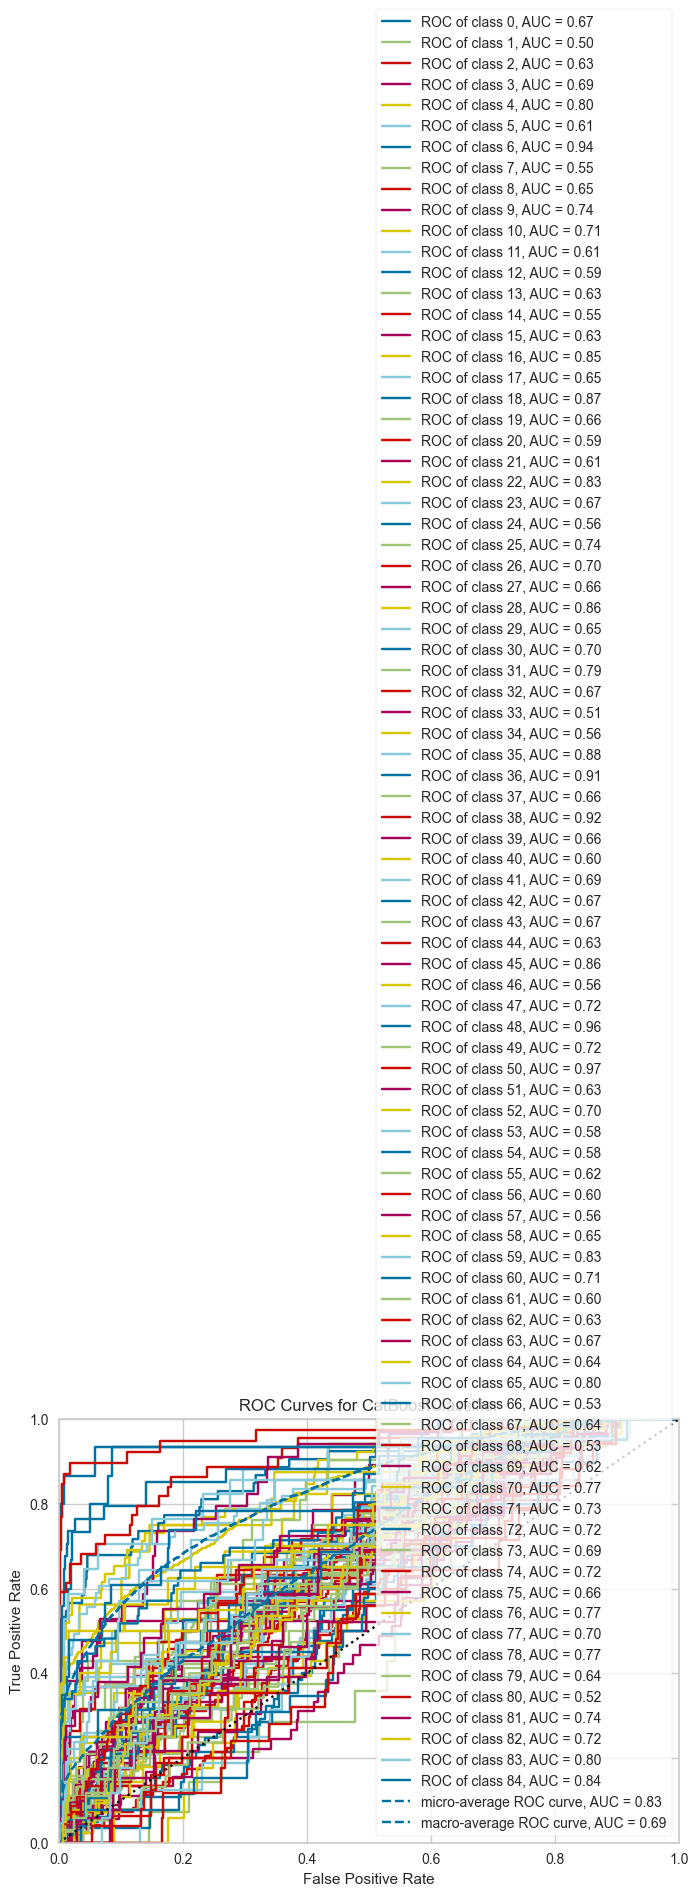

In [48]:
s_noPMA.plot_model(best_noPMA_model,plot='auc',save="noPMA_pyCaret_default_AUC")

In [ ]:
# Initialize the ClassificationExperiment
s_horiz_PMA_noPMA = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
full_horizconcat_PMA_noPMA_labeled = pd.merge(left=full_horizconcat_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
full_horizconcat_PMA_noPMA_labeled = full_horizconcat_PMA_noPMA_labeled.loc[full_horizconcat_PMA_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]

print(full_horizconcat_PMA_noPMA_labeled.shape,full_horizconcat_PMA_noPMA_labeled.rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))[keepFeats_horiz_lightgbm].shape)

# Setup the experiment with UMAP and StandardScaler as custom transformations
s_horiz_PMA_noPMA.setup(data= full_horizconcat_PMA_noPMA_labeled.rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))[keepFeats_horiz_lightgbm]
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='full_horizconcat_PMA_noPMA',
              experiment_name='full_horizconcat_PMA_noPMA_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
s_horiz_PMA_noPMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_horiz_PMA_noPMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_noPMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest
models_to_compare = ['catboost']
# Compare models
best_horiz_PMA_noPMA_model = s_horiz_PMA_noPMA.compare_models(include=models_to_compare)#, sort='F1')


(16521, 11761) (16521, 2353)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/25 17:28:23 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Initiated  . . . . . . . . . . . . . . . . . .             17:28:24
Status     . . . . . . . . . . . . . . . . . .      Fitting 5 Folds
Estimator  . . . . . . . . . . . . . . . . . .  CatBoost Classifier

Empty DataFrame
Columns: [Model, Accuracy, AUC, Recall, Prec., F1, Kappa, MCC, Top 5 Accuracy, Balanced Accuracy, TT (Sec)]
Index: []

Processing:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
# Add the custom metric to the experiment
s_horiz_PMA_noPMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_horiz_PMA_noPMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
s_horiz_PMA_noPMA.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

In [ ]:
s_horiz_PMA_noPMA.compare_models(include=['lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
                              'rf','qda','ada','lda','et','xgboost','lightgbm','catboost']#,
                     )

In [27]:
best_horiz_PMA_noPMA_model = s_horiz_PMA_noPMA.create_model('catboost', fold=5,return_train_score=True)

                                                       # s_PMA.create_model('catboost', 

In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import top_k_accuracy_score, balanced_accuracy_score

full_PMA_labeled = pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
full_PMA_labeled = full_PMA_labeled.loc[full_PMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]

NameError: name 'full_PMA' is not defined

In [86]:
full_PMA_labeled.index.value_counts()

Index
T0007._.1uM._.E20._.SP7201PMA               4
T0173._.1uM._.D13._.SP7201PMA               4
T0343._.1uM._.F16._.SP7201PMA               4
T0342._.1uM._.F24._.SP7201PMA               4
T0335._.1uM._.F23._.SP7201PMA               4
                                           ..
T10419._.1uM._.M11._.SP7213PMA              1
T1042._.10uM._.M03._.SP7230PMA              1
T1042._.1uM._.M02._.SP7202PMA               1
T1043._.10uM._.K13._.SP7230PMA              1
food_coloring._.nannan._.P24._.SP7255PMA    1
Name: count, Length: 12864, dtype: int64

In [16]:
# Initialize the ClassificationExperiment
s_PMA = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)


# Setup the experiment with UMAP and StandardScaler as custom transformations
s_PMA.setup(data= full_long_PMA_noPMA_labeled.loc[[ix for ix in full_long_PMA_noPMA_labeled.index if ix.split('._.')[-1].endswith('PMA')]].rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}',''))[keepFeats_lightgbm]
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='full_PMA',
              experiment_name ='full_PMA_3compClass', 
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
s_PMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_PMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_noPMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
models_to_compare = ['catboost']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
best_PMA_model = s_PMA.compare_models(include=models_to_compare)#, sort='F1')



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/23 00:36:11 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9541 characters) is truncated to 6000 characters to meet the length limit.


In [34]:
# Add the custom metric to the experiment
s_PMA.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_PMA.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
s_PMA.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# s_PMA.add_model('hist_grad_boost', HistGradientBoostingClassifier())

Name                                           Balanced Accuracy Top 5
Display Name                                   Balanced Accuracy Top 5
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy_top_k, response_...
Target                                                            pred
Args                                     {'needs_proba': True, 'k': 5}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc_top5, dtype: object

In [41]:
s_PMA.remove_metric('top5_acc')
s_PMA.remove_metric('balanced_acc')
s_PMA.remove_metric('balanced_acc_top5')

In [ ]:
#model List

    ‘lr’ - Logistic Regression

    ‘knn’ - K Neighbors Classifier

    ‘nb’ - Naive Bayes

    ‘dt’ - Decision Tree Classifier

    ‘svm’ - SVM - Linear Kernel

    ‘rbfsvm’ - SVM - Radial Kernel

    ‘gpc’ - Gaussian Process Classifier

    ‘mlp’ - MLP Classifier

    ‘ridge’ - Ridge Classifier

    ‘rf’ - Random Forest Classifier

    ‘qda’ - Quadratic Discriminant Analysis

    ‘ada’ - Ada Boost Classifier

    ‘gbc’ - Gradient Boosting Classifier #this trains a long time, exclude...

    ‘lda’ - Linear Discriminant Analysis

    ‘et’ - Extra Trees Classifier

    ‘xgboost’ - Extreme Gradient Boosting

    ‘lightgbm’ - Light Gradient Boosting Machine

    ‘catboost’ - CatBoost Classifier


In [19]:
best_PMA = s_PMA.compare_models(include=['lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
                              'rf','qda','ada','lda','et','xgboost','lightgbm','catboost'],
                     # round=10,
                     fold=2
                     )

Inital full dataset plottings...

In [23]:
# PMA_model = s_PMA.create_model('catboost', engine='sklearnex', fold=5,return_train_score=True)
preds = s_PMA.predict_model(best_PMA)
ranks = rank_of_correct_label(preds['Label'], np.array(preds['Score']))
print(ranks)


KeyError: 'Label'

In [58]:
s_horiz_PMA_noPMA.plot_model(best_horiz_PMA_noPMA_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")
# s_noPMA.plot_model(best_noPMA_model, plot='feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")
# s_PMA.plot_model(best_PMA, plot='feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")

ValueError: Image size of 800x117500 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000001E79FAE7010> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 800x117500 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 800x117500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x117500 with 1 Axes>

In [ ]:
s_horiz_PMA_noPMA.plot_model(best_horiz_PMA_noPMA_model, plot = 'confusion_matrix')
s_noPMA.plot_model(best_noPMA_model, plot='confusion_matrix')
s_PMA.plot_model(best_PMA_model, plot='confusion_matrix')

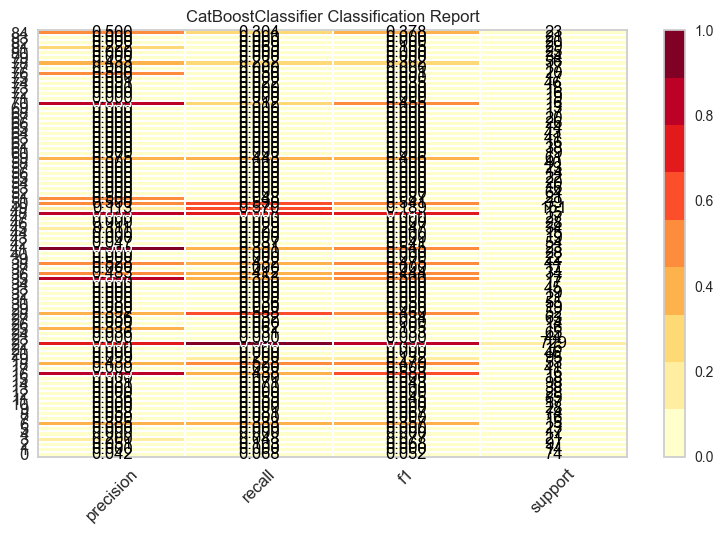

In [46]:
s_horiz_PMA_noPMA.plot_model(best_horiz_PMA_noPMA_model, plot = "class_report")

save all the best ML models, 'catboost', at the same time

In [ ]:
# s_noPMA.save_model(best_noPMA_model, 'lightbgm_full_noPMA_catboost')
# s_PMA.save_model(best_PMA_model,'lightbgm_full_PMA_catboost')
# s_horiz_PMA_noPMA.save_model(best_horiz_PMA_noPMA_model,'lightbgm_full_horiz_PMA+noPMA_catboost')
# s_noPMA.save_model(best_noPMA_model, 'lightbgm_full_noPMA_catboost_3compClass')
# s_PMA.save_model(best_PMA_model,'lightbgm_full_PMA_catboost_3compClass')
s_horiz_PMA_noPMA.save_model(best_horiz_PMA_noPMA_model,'lightbgm_full_horiz_PMA+noPMA_catboost_3compClass')

## non-built-in reduction method incorporations (UMAP):

We should use UMAP which is being used for the rest of the data..


RUN THE REGENERATE UMAP section, or at least pull the files saved there for this section

In [1]:
# # from pycaret.classification import ClassificationExperiment
# # from sklearn.datasets import load_iris
# import umap
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
# from sklearn.metrics import top_k_accuracy_score, balanced_accuracy_score


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import top_k_accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder

import joblib
import copy
import pickle, glob
from collections import Counter
from imblearn.over_sampling import SMOTE

from pycaret.classification import * #as pyclassify

sm=SMOTE(random_state=15)


C:\ProgramData\Miniconda3\envs\MOAST\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
# Key = pd.read_excel('/content/drive/Shareddrives/CP3/TargetMol/AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx',index_col='IDname',sheet_name='reducedKey')
Key = pd.read_excel(
    "../AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx",
    index_col="IDname",
    sheet_name="reducedKey",
)

# pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [31]:
UMAP_PMA_noPMA = pd.read_csv('FinalClean_TM_1+10_PMA+noPMA_dropna_UMAP_horiztrain.csv',index_col=0)
UMAP_PMA = pd.read_csv('FinalClean_TM_1+10_PMA_dropna_UMAP_longtrain.csv',index_col=0)
UMAP_noPMA = pd.read_csv('FinalClean_TM_1+10_noPMA_dropna_UMAP_longtrain.csv',index_col=0)

In [ ]:
classed_to_consider = [x for x in Key['AL_CONSOLIDATED'].value_counts()[Key['AL_CONSOLIDATED'].value_counts()>100].index.to_list()]
classed_to_consider = [c for c in classed_to_consider if c != 'Others']
display(classed_to_consider)

In [5]:
classed_to_consider = ['4-hydroxyphenylpyruvate_dioxygenase', '5-alpha_reductase', '5-HT', '8-oxoguanine_DNA_glycosylase', 'ABC', 'ACAT', 'ACE',
                       'Acetyl-CoA_Carboxylase', 'AChE', 'AChR', 'aconitase', 'Acyl-CoA:cholesterol_acyltransferase', 'Acyltransferase', 'Adenosine_deaminase',
                       'Adenosine_Kinase', 'Adenosine_Receptor', 'Adenylyl_Cyclase', 'Adiponectin_Receptor', 'Adrenergic_Receptor', 'AGE', 'AKR1', 'AKT',
                       'Alcohol_dehydrogenase', 'ALDH', 'Aldose_reductase', 'ALK', 'alpha-glucosidase', 'Amino_Acids_and_Derivatives', 'Aminopeptidase',
                       'AMPA_Receptor', 'AMPK', 'Androgen_Receptor', 'Anti-infection', 'Antibacterial', 'Antibacterial_and_Antifungal', 'Antibacterial,_Antifungal',
                       'Antibiotic', 'Antifungal', 'Antimalarial', 'Antioxidant', 'Antiviral', 'Apoptosis_Autophagy', 'Arginase', 'Aromatase',
                       'Aromatic_L-amino_acid_decarboxylase', 'Arp2/3_complex', 'Aryl_Hydrocarbon_Receptor', 'AT_Receptor', 'ATM/ATR', 'ATP_Citrate_Lyase', 'ATPase', 'AURK',
                       'Autotaxin_(ATX)', 'AXL_receptor_tyrosine_kinase', 'BACE', 'Bacterial_DNA', 'Bacterial_DNA_Gyrase_and_Topoisomerase_IV', 'Bacterial_Ribosome',
                       'BCL', 'Bcr-Abl', 'BET', 'Beta_Amyloid', 'beta-glucosidase', 'beta-lactamase', 'BMI-1', 'Bone_morphogenetic_protein_receptor_type_1_(BMPR1)',
                       'BRAF', 'Brassinosteroid_receptor_BRI1', 'BRD', 'Breast_Cancer_Resistance_Protein', 'BTK', 'c-Kit', 'c-Met_HGFR', 'c-RET', 'Calcium_Channel',
                       'Calpain', 'CaMK', 'cAMP', 'Cannabinoid_Receptor', 'Carbonic_Anhydrase', 'cardiac_myosin', 'Carnitine', 'Casein_Kinase', 'Caspase', 'CaSR',
                       'Catechol_O-methyltransferase_(COMT)', 'Cathepsin_K', 'CCR', 'Cdc42', 'CDK', 'cell_cycle_arrest', 'CGRP_Receptor', 'Chitin_synthase', 'Chk',
                       'Chloride_Channel', 'cholecystokinin_receptor', 'Cholesteryl_Ester_Transfer_Protein', 'Collected_Controls', 'Corticotropin-Releasing_Factor_Receptor_1',
                       'COX', 'CREB', 'Cruzain', 'CSF', 'CXCR', 'Cyclin_G_associated_kinase', 'Cysteine_Protease', 'Cystic_Fibrosis_Transmembrane_Conductance_Regulator',
                       'Cytochrome', 'Cytokinin_receptor', 'DDR', "Decaprenylphosphoryl-beta-D-ribose_2'-oxidase", 'Dehydrogenase', 'DHFR', 'Dihydroorotate_Dehydrogenase',
                       'Dihydropteroate_Synthase', 'Dihydropyrimidine_dehydrogenase_(DPD)', 'DNA/RNA_Associated', 'Dopamine', 'DPP', 'DUB', 'Dynamin',
                       'Dynamin-related_protein_1_(Drp1)', 'Dynein_ATPase', 'DYRK', 'E26_transformation-specific_(ETS)_family', 'EBI2/GPR183', 'Ecdysone_receptor',
                       'EGFR', 'Elongation_factor_G', 'Endothelin_Receptor', 'Enhancer_of_Zeste_Homolog_2_(EZH2)', 'enoyl-acyl_carrier_protein_reductase',
                       'Ephrin_Receptor', 'Epigenetic_Reader_Domain', 'ERK', 'Estrogen_Receptor', 'Eukaryotic_translation_initiation_factor_4E_(eIF4E)',
                       'Exchange_protein_directly_activated_by_cAMP_(EPAC)', 'Exportin-1_(CRM1)', 'Factor_Xa', 'FAK', 'Farnesyl_synthase', 'Fatty_Acid', 'Ferroptosis',
                       'FGFR', 'FLT3', 'Free_radical_scavengers', 'FXR', 'GABA', 'Gamma-secretase', 'Glucagon_Receptor', 'Glucocorticoid_Receptor', 'Glucokinase',
                       'Glucose_Metabolism', 'GluR', 'Glutamate_Channel', 'Glutathione_Metabolism', 'Glycine_transporter_type_1_(GlyT1)', 'Glycogen_phosphorylase',
                       'Gonadotropin-releasing_hormone_receptor', 'GPCR', 'Growth_Hormone_Secretagogue_Receptor', 'GSK', 'Guanylate_cyclase', 'H+/K+_ATPase', 'Haspin_Kinase',
                       'HAT', 'HBV', 'HCV_NS3/4A_protease', 'HCV_NS5A_protein', 'HCV_NS5B_polymerase', 'HDAC', 'Heme_oxygenase-1', 'Hexokinase', 'HIF', 'Histamine_Receptor',
                       'Histone_Demethylase', 'Histone_Methyltransferase', 'HIV', 'HMG-CoA_Reductase', 'HSP', 'HSV', 'HSV_DNA_Polymerase',
                       'Human_Epidermal_Growth_Factor_Receptor_2_(HER2)', 'Hydroxyapatite_in_bone', 'Hydroxylase', 'Hypoxanthine-guanine_phosphoribosyltransferase', 'IDH', 'IDO',
                       'IF_Receptor', 'IGF-1R', 'iGluR', 'IKK', 'IL_Receptor', 'Immunology/Inflammation_related', 'Immunomodulator', 'IMPDH', 'Influenza_Virus',
                       'Inhibitor_of_Apoptosis_Proteins_(IAP)', 'Inositol-requiring_enzyme_1', 'Insulin', 'Integrase', 'Integrin', 'ionotropic_glutamate_receptor', 'IRAK',
                       'Iron_chelator', 'Isoleucyl-tRNA_synthetase', 'JAK', 'JNK', 'Keap1-Nrf2', 'Kelch-like_ECH-associated_protein_1', 'KIF', 'Lactate_Dehydrogenase',
                       'Lanosterol_Demethylase', 'LAT1', 'Leucine-rich_repeat_kinase_2', 'Leukotriene_A4_hydrolase', 'Leukotriene_Receptor', 'LIM_Kinase', 'Lipase', 'Lipid',
                       'Liver_X_Receptor', 'LOX', 'LPA_Receptor', 'Lysine_Demethylase', 'Lysophosphatidic_acid_receptor', 'lysophospholipase_1', 'MAO', 'MAPK',
                       'mast_cell_stabilizer', 'Mdm2', 'MEK', 'Melanocortin_Receptor', 'Menin-MLL_interaction', 'Mer_tyrosine_kinase', 'Metabolite',
                       'Methionine_aminopeptidase_2', 'Methionine_synthase', 'mGluR', 'Microtubule_Associated', 'Mineralocorticoid_Receptor', 'Mitochondria_Associated',
                       'MLK', 'MMP', 'Monoacylglycerol_lipase', 'Monocarboxylate_Transporter', 'Monopolar_spindle_1_kinase', 'MTH1', 'mTOR',
                       'Multiple_ion_channels_and_receptors_including_potassium_channel,_sodium_channel,_and_calcium_channel', 'Myc', 'Mycolic_acid_synthesis', 'MyD88',
                       'Myeloid_cell_leukemia_1', 'Myeloperoxidase', 'Myosin', 'Myosin_light_chain_kinase', 'Na-K-Cl_cotransporter', 'Na+/Ca2+_Exchanger',
                       'Na+/H+_Exchanger', 'Na+/K+_ATPase', 'NADPH_MetabolismEnzyme', 'NEDD8', 'Neprilysin', 'Neuraminidase', 'Neurokinin_Receptor', 'Neuropeptide_Y_Receptor',
                       'Neurotensin_Receptor', 'Neutrophil_elastase', 'NFkB', 'Nicotinamide_phosphoribosyltransferase', 'NMDA_Receptor', 'NOD-like_Receptor_(NLR)',
                       'Norepinephrine_Transporter', 'NOS', 'Notch_signaling_pathway', 'NR1D1', 'Nrf', 'Nucleoside_Antimetabolite/Analog', 'Nur77_(NR4A1)', 'O-GlcNAcase',
                       'Octamer-binding_transcription_factor_4', 'Opioid_Receptor', 'Orexin_Receptor', 'Ornithine_decarboxylase', 'OX_Receptor', 'P-glycoprotein',
                       'P2_Receptor', 'p53', 'p97', 'PAD', 'PAK', 'Papain-like_protease_(PLpro)_of_SARS-CoV-2', 'PAR', 'Parasite', 'PARP', 'PD-1/PD-L1', 'PDE', 'PDGFR', 
                       'PDK', 'Penicillin_Binding', 'Peptidoglycan_synthesis_enzymes', 'PERK', 'Phosphatase', 'Phosphoglycerate_dehydrogenase', 
                       'Phosphoglycerate_mutase_1_(PGAM1)', 'Phospholipase', 'Photosystem_II', 'PI3K', 'Pim_Kinase', 'PKA', 'PKC', 'PKD', 'Plasminogen_activator_inhibitor-1',
                       'Platelet_aggregation', 'Platelet-activating_factor_receptor', 'PLK', 'Polycomb_Repressive_Complex_2_(PRC2)', 'Porcupine', 'Potassium_Channel', 'PPAR',
                       'Progesterone_Receptor', 'Prostaglandin', 'Protease-activated_Receptor', 'Proteasome', 'Protein_Arginine_Deiminase_(PAD)',
                       'Protein_Arginine_Methyltransferase_5', 'Protein_Phosphatase', 'Protein_Tyrosine_Phosphatase', 'PTEN_(Phosphatase_and_tensin_homolog)',
                       'Pyruvate_dehydrogenase', 'Pyruvate_kinase_M2', 'RAD51', 'RAF', 'Ras', 'Receptor_for_Advanced_Glycation_End_Products_(RAGE)', 'Renin',
                       'Respiratory_syncytial_virus', 'Retinoic_Acid', 'Retinoid_Receptor', 'Reverse_Transcriptase', 'Rho/ROCK', 'Ribonucleotide_Reductase', 'RIPK',
                       'RNA_polymerase', 'RNA-dependent_RNA_polymerase_(RdRp)', 'ROR', 'ROS', 'Ryanodine_receptor', 'S-adenosylhomocysteine_hydrolase', 'S1P_Receptor',
                       'S6_Kinase', 'SARS-CoV', 'Serine_Kinase', 'Serine_Protease', 'Serotonin', 'Serum_and_glucocorticoid-regulated_kinase',
                       "SH2_domain-containing_inositol_5'-phosphatase_1_(SHIP1)", 'SH2-containing_protein_tyrosine_phosphatase-2_(SHP2)', 'Sigma_Receptor', 'SIK', 'Sirtuin',
                       'Smoothened_Receptor', 'SMYD2', 'Sodium_Channel', 'Sodium_taurocholate_cotransporting_polypeptide_(NTCP)', 'Sodium-chloride_symporter',
                       'Sodium/glucose_cotransporter', 'Soluble_Epoxide_Hydrolase_(sEH)', 'Soluble_guanylate_cyclase_(sGC)', 'Sphingosine_Kinase/Receptor', 'Squalene_epoxidase',
                       'Src', 'STAT', 'Stearoyl-CoA_Desaturase', 'Steroid_Biosynthesis', 'STING', 'Succinate_dehydrogenase', 'Sulfonylurea_Receptor', 'Survivin', 'Syk',
                       'T-LAK_Cell-Originated_Protein_Kinase', 'TAM_Receptor', 'Tankyrase', 'Tau_protein','TBK', 'Telomerase', 'TGF', 'TGR', 'Thrombin', 'Thrombopoietin_Receptor',
                       'Thromboxane_A2', 'Thymidine_kinase', 'Thymidine_phosphorylase', 'Thymidylate_Synthase', 'Thyroid_Hormone_Receptor', 'Thyroid_peroxidase', 'Tie-2', 'TLR',
                       'TNF', 'Topoisomerase', 'Trace_amine-associated_receptor_1', 'Transient_Receptor', 'Transketolase', 'Transthyretin', 'Trk', 'Trypanothione_reductase',
                       'Tryptophan_Hydroxylase', 'Tyrosine_Kinase', 'Ubiquitin_E1', 'Ubiquitin_Ligase', 'ULK', 'Urate_transporter_1_(URAT1)', 'Vasopressin_Receptor', 'VDAC', 'VEGFR',
                       'Vesicular_monoamine_transporter_2_(VMAT2)', 'Viral_DNA_polymerase', 'Viral_RNA_polymerase', 'Virus_Protease', 'Vitamin_B', 'Vitamin_D_Receptor', 'VKOR', 'Wee1',
                       'Wnt/beta-Catenin', 'Xanthine_Oxidase', 'YAP'
                      ]

In [10]:
# Load sample data
# data = load_iris(as_frame=True)
# df = data.frame
# df['target'] = data.target

# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
umap_scaler_pipeline = make_pipeline(umap.UMAP(
    metric="correlation",
    n_components=100,
    n_neighbors=10,
    min_dist=0.1, #default is 0.1, which has been already generated....
        # n_jobs=30,
    angular_rp_forest=True,
    verbose=True,
    low_memory=True,
    random_state=15,
        densmap=False
), StandardScaler())

# Initialize the ClassificationExperiment
s_noPMA_UMAP_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)

UMAP_noPMA_labeled = pd.merge(left=UMAP_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
UMAP_noPMA_labeled = UMAP_noPMA_labeled.loc[UMAP_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]


# Setup the experiment with UMAP and StandardScaler as custom transformations
s_noPMA_UMAP_experiment.setup(data= UMAP_noPMA_labeled
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
                              # right=full_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True)
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='pre_noPMA_UMAP',
              experiment_name='pre_noPMA_UMAP_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
s_noPMA_UMAP_experiment.add_metric('top5_acc', 'Top 5 Accuracy', top_k_accuracy, greater_is_better=True, needs_proba=True)
# Add the standard balanced accuracy metric
s_noPMA_UMAP_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_noPMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
# best_noPMA_UMAP_model = s_noPMA_UMAP_experiment.compare_models(include=models_to_compare)#, sort='F1')
# s_noPMA_UMAP_experiment.plot_model(best_noPMA_UMAP_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")
# s_noPMA_UMAP_experiment.plot_model(best_noPMA_UMAP_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 01:03:50 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy, response_method...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc, dtype: object

In [97]:
print(s_noPMA_UMAP_experiment.models())

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [11]:
best_noPMA_UMAP_model = s_noPMA_UMAP_experiment.create_model('catboost')

In [12]:
# best_noPMA_UMAP_model
# s_noPMA_UMAP_experiment.save_model(best_noPMA_UMAP_model,'UMAP01_noPMA_catboost')
s_noPMA_UMAP_experiment.save_model(best_noPMA_UMAP_model,'UMAP01_noPMA_catboost_3compClass')
# s_noPMA_UMAP_experiment.save_experiment('UMAP01_noPMA_catboost_3compClass_exp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [13]:
s_noPMA_UMAP_experiment.plot_model(best_noPMA_UMAP_model,plot='pipeline',save="B:/")

'Pipeline Plot.png'

In [19]:
UMAP_noPMA = pd.read_csv('FinalClean_TM_1+10_noPMA_dropna_UMAP_longtrain.csv',index_col=0)
UMAP_noPMA_labeled = pd.merge(left=UMAP_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
UMAP_noPMA_labeled = UMAP_noPMA_labeled.loc[UMAP_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]
s_noPMA_UMAP_experiment = load_experiment('UMAP01_noPMA_catboost_3compClass_exp', data=UMAP_noPMA_labeled)
best_noPMA_UMAP_model = load_model('UMAP01_noPMA_catboost_3compClass')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/26 20:20:17 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Transformation Pipeline and Model Successfully Loaded


In [ ]:
s_noPMA_UMAP_experiment.interpret_model(best_noPMA_UMAP_model,plot='summary',save="B:/")

In [14]:
best_noPMA_UMAP_model_final = s_noPMA_UMAP_experiment.finalize_model(best_noPMA_UMAP_model)


In [39]:
display(best_noPMA_UMAP_model,best_noPMA_UMAP_model_final)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000020CA47BDB10>)],
         verbose=False)

In [15]:
noPMA_UMAP_pred_result = s_noPMA_UMAP_experiment.predict_model(best_noPMA_UMAP_model,data=UMAP_noPMA_labeled)

In [16]:
s_noPMA_UMAP_experiment.save_model(best_noPMA_UMAP_model_final,'FINAL_UMAP01_noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [30]:
pd.DataFrame(best_noPMA_UMAP_model_final.predict_proba(UMAP_noPMA),index=UMAP_noPMA.index, columns=best_noPMA_UMAP_model_final.classes_).apply(np.argsort,axis=1)
display(best_noPMA_UMAP_model_final.decision_function)

AttributeError: 'CatBoostClassifier' object has no attribute 'decision_function'

horizontal concat UMAP

In [101]:
nanAfflicted = full_horizconcat_PMA_noPMA_labeled.loc[full_horizconcat_PMA_noPMA_labeled.isna().sum(axis=1)>0.2*full_horizconcat_PMA_noPMA_labeled.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    full_horizconcat_PMA_noPMA_labeled.drop(index=nanAfflicted,inplace=True)

nanAfflicted = full_PMA_labeled.loc[full_PMA_labeled.isna().sum(axis=1)>0.2*full_PMA_labeled.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    full_PMA_labeled.drop(index=nanAfflicted,inplace=True)

NAN FOUND IN THE DATASET. REMOVING ['food_coloring._.10uM._.A01._.SP7246', 'food_coloring._.10uM._.A01._.SP7249', 'food_coloring._.10uM._.A01._.SP7253', 'food_coloring._.10uM._.A01._.SP7231']


In [103]:
umap_scaler_pipeline.fit_transform(
full_horizconcat_PMA_noPMA_labeled.rename(
    columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
                                  drop(columns= 'AL_CONSOLIDATED')
                                                                        )

UMAP(angular_rp_forest=True, metric='correlation', n_components=100, n_jobs=1, n_neighbors=10, random_state=15, verbose=True)
Sun Jun  9 21:42:24 2024 Construct fuzzy simplicial set
Sun Jun  9 21:42:25 2024 Finding Nearest Neighbors
Sun Jun  9 21:42:25 2024 Building RP forest with 10 trees
Sun Jun  9 21:42:30 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Sun Jun  9 21:42:58 2024 Finished Nearest Neighbor Search
Sun Jun  9 21:42:59 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Jun  9 21:43:16 2024 Finished embedding


array([[ 9.939683 ,  5.256741 ,  4.18768  , ...,  4.6796494,  5.0413604,
         5.0105863],
       [ 9.998258 ,  5.383571 ,  4.5846877, ...,  4.649391 ,  5.158547 ,
         5.0833783],
       [ 9.964026 ,  5.233453 ,  4.1838603, ...,  4.6856894,  5.0547166,
         5.02761  ],
       ...,
       [ 9.970251 ,  5.23854  ,  4.576    , ...,  4.974182 ,  5.252621 ,
         5.0221996],
       [10.03378  ,  5.1984076,  4.5149617, ...,  4.694581 ,  4.834318 ,
         5.0182962],
       [10.0337715,  5.198455 ,  4.5151067, ...,  4.695221 ,  4.8327417,
         5.0185466]], dtype=float32)

horizontal PMA+noPMA UMAP Exp setup

In [32]:
# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
# umap_scaler_pipeline = make_pipeline(umap.UMAP(
#     metric="correlation",
#     n_components=100,
#     n_neighbors=10,
#     min_dist=0.1, #default is 0.1, which has been already generated....
#         # n_jobs=30,
#     angular_rp_forest=True,
#     verbose=True,
#     low_memory=True,
#     random_state=15,
#         densmap=False
# ), StandardScaler())

# Initialize the ClassificationExperiment
s_horiz_PMA_noPMA_UMAP_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)

UMAP_PMA_noPMA_labeled = pd.merge(left=UMAP_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
UMAP_PMA_noPMA_labeled = UMAP_PMA_noPMA_labeled.loc[UMAP_PMA_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]


# Setup the experiment with UMAP and StandardScaler as custom transformations
s_horiz_PMA_noPMA_UMAP_experiment.setup(data= UMAP_PMA_noPMA_labeled
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_horizconcat_PMA_noPMA_labeled.rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_horizconcat_PMA_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
    #                             right=full_horizconcat_PMA_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True,how='left')
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              experiment_name='pre_PMA+noPMA_UMAP',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              preprocess = True,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k, labels=model.classes_)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
#s_PMA_UMAP_experiment
s_horiz_PMA_noPMA_UMAP_experiment.add_metric(id='top5_acc', name='Top 5 Accuracy', score_func = top_k_accuracy, greater_is_better=True, needs_proba=True,k=5)
# Add the standard balanced accuracy metric
s_horiz_PMA_noPMA_UMAP_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_PMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
#best_PMA_UMAP_model
# best_horiz_PMA_noPMA_UMAP_model = s_horiz_PMA_noPMA_UMAP_experiment.compare_models(include=models_to_compare)#, sort='F1')
# s_horiz_PMA_noPMA_UMAP_experiment.plot_model(best_horiz_PMA_noPMA_UMAP_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")
# s_horiz_PMA_noPMA_UMAP_experiment.plot_model(best_horiz_PMA_noPMA_UMAP_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 03:13:35 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy, response_method...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc, dtype: object

In [33]:
best_horiz_PMA_noPMA_UMAP_model = s_horiz_PMA_noPMA_UMAP_experiment.create_model('catboost')

In [ ]:
s_horiz_PMA_noPMA_UMAP_experiment.interpret_model(best_horiz_PMA_noPMA_UMAP_model,plot='summary')

In [34]:
# s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model,'UMAP01_PMA+noPMA_catboost')
s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model,'UMAP01_PMA+noPMA_catboost_3compClass')
# s_horiz_PMA_noPMA_UMAP_experiment.save_experiment(best_horiz_PMA_noPMA_UMAP_model,'UMAP01_PMA+noPMA_catboost_3compClass_exp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [43]:
best_horiz_PMA_noPMA_UMAP_model_final = s_horiz_PMA_noPMA_UMAP_experiment.finalize_model(best_horiz_PMA_noPMA_UMAP_model)
display(best_horiz_PMA_noPMA_UMAP_model_final)
# PMA_noPMA_UMAP_pred_result = s_horiz_PMA_noPMA_UMAP_experiment.predict_model(best_horiz_PMA_noPMA_UMAP_model_final,data=UMAP_PMA_noPMA_labeled)
# display(PMA_noPMA_UMAP_pred_result)
# s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model_final,'FINAL_UMAP01_PMA+noPMA_catboost_3compClass')

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000020CB58F8790>)],
         verbose=False)

In [44]:
PMA_noPMA_UMAP_pred_result = s_horiz_PMA_noPMA_UMAP_experiment.predict_model(best_horiz_PMA_noPMA_UMAP_model_final,data=UMAP_PMA_noPMA_labeled)
display(PMA_noPMA_UMAP_pred_result)
# s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model_final,'FINAL_UMAP01_PMA+noPMA_catboost_3compClass')

UMAP_0    UMAP_1    UMAP_2    UMAP_3  \
DMSO._.NA._.A01._.SP7201      9.991454 -0.471708  5.917063  7.163189   
DMSO._.NA._.A01._.SP7202      9.645799  9.618718  7.520401  6.861956   
DMSO._.NA._.A01._.SP7203     10.010361 -0.450599  5.976485  7.160769   
DMSO._.NA._.A01._.SP7204      9.561563  9.533028  7.465376  6.870721   
DMSO._.NA._.A01._.SP7205      9.567543  9.531452  7.479595  6.860948   
...                                ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237   9.624646  9.764939  7.274463  6.918565   
T5428._.10uM._.P04._.SP7237   9.600015  9.729553  7.208857  6.911493   
T5468._.10uM._.P06._.SP7237   9.620143  9.810329  7.190661  6.931098   
T5400._.10uM._.P08._.SP7237   9.624638  9.764585  7.275483  6.918415   
T5110._.10uM._.P09._.SP7237   9.570139  9.598256  7.246808  6.906390   

                               UMAP_4    UMAP_5    UMAP_6    UMAP_7    UMAP_8  \
DMSO._.NA._.A01._.SP7201     9.948620  8.609430 -0.251612  6.154166  5.649270   
DMSO._.NA._.A01._.SP7202     9.374681  8.767661  3.856578  5.638780  4.464044   
DMSO._.NA._.A01._.SP7203     9.949783  8.606299 -0.259843  6.143785  5.642884   
DMSO._.NA._.A01._.SP7204     9.282730  8.711053  4.231388  5.571792  4.580073   
DMSO._.NA._.A01._.SP7205     9.285844  8.711561  4.220273  5.580934  4.584932   
...                               ...       ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237  9.779546  8.676294  3.168479  5.680604  3.876256   
T5428._.10uM._.P04._.SP7237  9.696514  8.679318  3.325709  5.661982  3.957032   
T5468._.10uM._.P06._.SP7237  9.850560  8.675499  3.014733  5.688961  3.777721   
T5400._.10uM._.P08._.SP7237  9.779413  8.676381  3.170094  5.680470  3.876776   
T5110._.10uM._.P09._.SP7237  9.403012  8.676318  3.832812  5.613990  4.351661   

                               UMAP_9  ...   UMAP_93   UMAP_94   UMAP_95  \
DMSO._.NA._.A01._.SP7201     8.214250  ...  4.904323  4.174397  4.751401   
DMSO._.NA._.A01._.SP7202     7.536723  ...  4.917077  4.338041  4.840124   
DMSO._.NA._.A01._.SP7203     8.215027  ...  4.907536  4.224895  4.796031   
DMSO._.NA._.A01._.SP7204     7.388078  ...  4.866313  3.668393  4.952192   
DMSO._.NA._.A01._.SP7205     7.412696  ...  4.869028  3.647673  4.928563   
...                               ...  ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237  8.257335  ...  4.928943  5.088543  4.604572   
T5428._.10uM._.P04._.SP7237  8.173531  ...  4.949130  4.222151  4.279089   
T5468._.10uM._.P06._.SP7237  8.333639  ...  4.936324  4.699940  5.200521   
T5400._.10uM._.P08._.SP7237  8.257109  ...  4.929119  5.090521  4.600458   
T5110._.10uM._.P09._.SP7237  7.991982  ...  4.814197  3.187888  5.153627   

                              UMAP_96   UMAP_97   UMAP_98   UMAP_99  \
DMSO._.NA._.A01._.SP7201     7.026680  6.365721  2.700079  7.165786   
DMSO._.NA._.A01._.SP7202     7.104449  6.334074  2.840647  6.985035   
DMSO._.NA._.A01._.SP7203     7.023411  6.364440  2.653804  7.167013   
DMSO._.NA._.A01._.SP7204     7.283446  6.356748  2.808262  7.169492   
DMSO._.NA._.A01._.SP7205     7.299104  6.360507  2.821832  7.186643   
...                               ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237  6.714731  6.323299  2.676596  7.022715   
T5428._.10uM._.P04._.SP7237  7.495984  6.402904  2.657519  6.956940   
T5468._.10uM._.P06._.SP7237  7.201058  6.307757  2.614101  7.086007   
T5400._.10uM._.P08._.SP7237  6.716166  6.323405  2.672667  7.024704   
T5110._.10uM._.P09._.SP7237  7.039695  6.369625  3.361406  7.203058   

                                          AL_CONSOLIDATED  \
DMSO._.NA._.A01._.SP7201               Collected_Controls   
DMSO._.NA._.A01._.SP7202               Collected_Controls   
DMSO._.NA._.A01._.SP7203               Collected_Controls   
DMSO._.NA._.A01._.SP7204               Collected_Controls   
DMSO._.NA._.A01._.SP7205               Collected_Controls   
...                                                   ...   
T

In [45]:
s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model_final,'FINAL_UMAP01_PMA+noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [59]:
# full_horizconcat_PMA_noPMA_labeled[[x for x in full_horizconcat_PMA_noPMA_labeled.columns if x.split('_')[-1] == 'PMA']]
StandardScaler().fit_transform(UMAP_PMA).shape


(20730, 100)

UMAP PMA experiment setup

In [46]:
# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
# umap_scaler_pipeline = make_pipeline(umap.UMAP(
#     metric="correlation",
#     n_components=100,
#     n_neighbors=10,
#     min_dist=0.1, #default is 0.1, which has been already generated....
#         # n_jobs=30,
#     angular_rp_forest=True,
#     verbose=True,
#     low_memory=True,
#     random_state=15,
#         densmap=False
# ), StandardScaler())

# Initialize the ClassificationExperiment
s_PMA_UMAP_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)


# UMAP_PMA_labeled = pd.merge(left=pd.DataFrame(StandardScaler().fit_transform(UMAP_PMA),index=UMAP_PMA.index,columns=UMAP_PMA.columns),right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
UMAP_PMA_labeled = pd.merge(left=UMAP_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
UMAP_PMA_labeled = UMAP_PMA_labeled.loc[UMAP_PMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]


# Setup the experiment with UMAP and StandardScaler as custom transformations
s_PMA_UMAP_experiment.setup(data= UMAP_PMA_labeled
    #                           pd.merge(left=pd.DataFrame(umap_scaler_pipeline.fit_transform(
    #                           full_horizconcat_PMA_noPMA_labeled[[x for x in full_horizconcat_PMA_noPMA_labeled.columns if x.split('_')[-1] == 'PMA' or x == 'AL_CONSOLIDATED']].rename(
    # columns=lambda col: col.replace(',','').replace('"','').replace(':','_').replace('[','').replace(']','').replace('{','').replace('}','')).\
    #                               drop(columns= 'AL_CONSOLIDATED')), 
    #                               index=full_horizconcat_PMA_noPMA_labeled.index,columns=[f'UMAP_{i}'for i in range(100)]),
    #                             right=full_horizconcat_PMA_noPMA_labeled['AL_CONSOLIDATED'],left_index=True,right_index=True,how='left')
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='pre_PMA_UMAP',
              experiment_name='pre_PMA_UMAP_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              preprocess = True,
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k, labels=model.classes_)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
#s_PMA_UMAP_experiment
s_PMA_UMAP_experiment.add_metric(id='top5_acc', name='Top 5 Accuracy', score_func = top_k_accuracy, greater_is_better=True, needs_proba=True,k=5)
# Add the standard balanced accuracy metric
s_PMA_UMAP_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_PMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
#best_PMA_UMAP_model
# best_PMA_UMAP_model = s_PMA_UMAP_experiment.compare_models(include=models_to_compare)#, sort='F1')
# s_PMA_UMAP_experiment.plot_model(best_PMA_UMAP_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")
# s_PMA_UMAP_experiment.plot_model(best_PMA_UMAP_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 10:17:04 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy, response_method...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc, dtype: object

In [47]:
best_PMA_UMAP_model = s_PMA_UMAP_experiment.create_model('catboost')

In [ ]:
s_PMA_UMAP_experiment.interpret_model(best_PMA_UMAP_model, plot = 'summary' )

In [48]:
# s_PMA_UMAP_experiment.save_model(best_PMA_UMAP_model,'UMAP01_PMA_catboost')
s_PMA_UMAP_experiment.save_model(best_PMA_UMAP_model,'UMAP01_PMA_catboost_3compClass')
# s_PMA_UMAP_experiment.save_experiment(best_PMA_UMAP_model,'UMAP01_PMA_catboost_3compClass_exp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [49]:
best_PMA_UMAP_model_final = s_PMA_UMAP_experiment.finalize_model(best_PMA_UMAP_model)
display(best_PMA_UMAP_model_final)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000020CC1BC6890>)],
         verbose=False)

In [50]:
PMA_UMAP_pred_result = s_PMA_UMAP_experiment.predict_model(best_PMA_UMAP_model_final,data=UMAP_PMA_labeled)
display(PMA_UMAP_pred_result)

UMAP_0    UMAP_1    UMAP_2    UMAP_3  \
DMSO._.NA._.A01._.SP7201PMA     10.003493 -1.559809  0.902296  0.085165   
DMSO._.NA._.A01._.SP7202PMA     10.001447  9.077403  0.014261  0.226666   
DMSO._.NA._.A01._.SP7203PMA      9.986051 -1.525437  0.896338  0.082566   
DMSO._.NA._.A01._.SP7204PMA      9.959257  9.055007  0.022018  0.159056   
DMSO._.NA._.A01._.SP7205PMA      9.958598  9.058169  0.021482  0.171158   
...                                   ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237PMA   9.970597  9.122399  0.035249  0.141295   
T5428._.10uM._.P04._.SP7237PMA   9.970133  9.112675  0.035894  0.163710   
T5468._.10uM._.P06._.SP7237PMA   9.966880  9.126284  0.040082  0.138529   
T5400._.10uM._.P08._.SP7237PMA   9.970928  9.121256  0.032748  0.147339   
T5110._.10uM._.P09._.SP7237PMA   9.970495  9.099940  0.035639  0.186260   

                                  UMAP_4    UMAP_5    UMAP_6    UMAP_7  \
DMSO._.NA._.A01._.SP7201PMA     2.915500  0.566954  9.945695  9.328014   
DMSO._.NA._.A01._.SP7202PMA     2.656110  1.025711  9.962981  9.055182   
DMSO._.NA._.A01._.SP7203PMA     2.933147  0.583234  9.920621  9.313409   
DMSO._.NA._.A01._.SP7204PMA     2.640457  1.031393  9.941210  8.984127   
DMSO._.NA._.A01._.SP7205PMA     2.649152  1.038687  9.953491  8.981214   
...                                  ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237PMA  2.732648  0.846560  9.964374  9.386785   
T5428._.10uM._.P04._.SP7237PMA  2.700464  0.899657  9.948068  9.364617   
T5468._.10uM._.P06._.SP7237PMA  2.765629  0.838290  9.948508  9.400454   
T5400._.10uM._.P08._.SP7237PMA  2.717681  0.849686  9.946433  9.387178   
T5110._.10uM._.P09._.SP7237PMA  2.660299  0.971103  9.945465  9.329386   

                                  UMAP_8    UMAP_9  ...   UMAP_93   UMAP_94  \
DMSO._.NA._.A01._.SP7201PMA     6.953946  0.084809  ...  3.400567  4.597900   
DMSO._.NA._.A01._.SP7202PMA     6.455669  0.048057  ...  3.303467  4.636468   
DMSO._.NA._.A01._.SP7203PMA     6.931207  0.089416  ...  3.382997  4.601097   
DMSO._.NA._.A01._.SP7204PMA     6.360118  0.041078  ...  3.348328  4.709382   
DMSO._.NA._.A01._.SP7205PMA     6.377048  0.047504  ...  3.348380  4.730433   
...                                  ...       ...  ...       ...       ...   
T5271._.10uM._.P03._.SP7237PMA  6.750016  0.084296  ...  3.380353  4.803981   
T5428._.10uM._.P04._.SP7237PMA  6.642432  0.100269  ...  3.292775  4.666047   
T5468._.10uM._.P06._.SP7237PMA  6.766010  0.100073  ...  3.300191  4.646211   
T5400._.10uM._.P08._.SP7237PMA  6.722388  0.100193  ...  3.339575  4.714512   
T5110._.10uM._.P09._.SP7237PMA  6.515284  0.105021  ...  3.312426  4.706343   

                                 UMAP_95   UMAP_96   UMAP_97   UMAP_98  \
DMSO._.NA._.A01._.SP7201PMA     5.743430  4.743005  4.650676  7.239279   
DMSO._.NA._.A01._.SP7202PMA     5.757957  4.515715  4.576436  7.184893   
DMSO._.NA._.A01._.SP7203PMA     5.763021  4.762468  4.644424  7.223746   
DMSO._.NA._.A01._.SP7204PMA     5.911146  4.518892  4.610761  7.284330   
DMSO._.NA._.A01._.SP7205PMA     5.906095  4.485396  4.615042  7.274317   
...                                  ...       ...       ...       ...   
T5271._.10uM._.P03._.SP7237PMA  5.864986  4.649362  4.605316  7.227231   
T5428._.10uM._.P04._.SP7237PMA  5.659747  4.905689  4.589979  7.219900   
T5468._.10uM._.P06._.SP7237PMA  5.745389  5.128198  4.597549  7.224041   
T5400._.10uM._.P08._.SP7237PMA  5.774502  5.055976  4.581815  7.235020   
T5110._.10uM._.P09._.SP7237PMA  5.699175  4.799353  4.583692  7.223536   

                                 UMAP_99               AL_CONSOLIDATED  \
DMSO._.NA._.A01._.SP7201PMA     2.886357            Collected_Controls   
DMSO._.NA._.A01._.SP7202PMA     2.903480            Collected_Controls   
DMSO._.NA._.A01._.SP7203PMA     2.890826            Collected_Controls   
DMSO._.NA._.A01._.SP7204PMA     2.894436            Collected_Controls   
DMSO._.NA._.A01._.SP7205PMA     2.898

In [51]:
s_PMA_UMAP_experiment.save_model(best_PMA_UMAP_model_final,'FINAL_UMAP01_PMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                              'UMAP_3', 'UMAP_4', 'UMAP_5',
                                              'UMAP_6', 'UMAP_7', 'UMAP_8',
                                              'UMAP_9', 'UMAP_10', 'UMAP_11',
                                              'UMAP_12', 'UMAP_13', 'UMAP_14',...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imput

In [36]:
[ix for ix in globals().keys() if not ix.startswith('_')]


['In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 'open',
 'os',
 'subprocess',
 'copy',
 'umap',
 'plt',
 'np',
 'pd',
 'tqdm',
 'pickle',
 'glob',
 'train_test_split',
 'OneHotEncoder',
 'Key',
 'HistGradientBoostingClassifier',
 'confusion_matrix',
 'accuracy_score',
 'precision_score',
 'ConfusionMatrixDisplay',
 'LabelEncoder',
 'StandardScaler',
 'Counter',
 'SMOTE',
 'sm',
 'full_horizconcat_PMA_noPMA',
 'ClassificationExperiment',
 'setup',
 'create_model',
 'compare_models',
 'ensemble_model',
 'tune_model',
 'blend_models',
 'stack_models',
 'plot_model',
 'evaluate_model',
 'interpret_model',
 'calibrate_model',
 'optimize_threshold',
 'predict_model',
 'finalize_model',
 'deploy_model',
 'save_model',
 'load_model',
 'automl',
 'pull',
 'models',
 'get_metrics',
 'add_metric',
 'remove_metric',
 'get_logs',
 'get_config',
 'set_config',
 'save_experiment',
 'load_experiment',
 'get_leaderboard',
 'set_current_experiment',
 'get_current_experiment',
 'dashboard',
 'convert_m

## use the 0.8 Feature Collinearity Reduction set of features in pycaret

Prep for FeatRead08 iterations

In [ ]:
import os, subprocess
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)
# os.chdir('./drive/Shareddrives/CP3/TargetMol/FrozenVersions')
os.chdir('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions')

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap

from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import top_k_accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder

import joblib
import copy
import pickle, glob
from collections import Counter
from imblearn.over_sampling import SMOTE

from pycaret.classification import * #as pyclassify

sm=SMOTE(random_state=15)

In [ ]:
# Key = pd.read_excel('/content/drive/Shareddrives/CP3/TargetMol/AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx',index_col='IDname',sheet_name='reducedKey')
Key = pd.read_excel(
    "../AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx",
    index_col="IDname",
    sheet_name="reducedKey",
)

# pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [ ]:
# full_longconcat_PMA_noPMA = pd.read_csv(
#     '/content/drive/Shareddrives/CP3/TargetMol/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv',
#     index_col=0)
# full_longconcat_PMA_noPMA = pd.read_csv(
#     "TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv",
#     index_col=0,
# )
full_horizconcat_PMA_noPMA = pd.read_csv(
    "TargetMol_1-27_1uM+10uM_PMA+noPMA_horizconcat_HD_IDnames.csv",
    index_col=0
)
#  FrozenVersions/TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv
# full_noPMA = FrozenVersions/TargetMol_1-27_1uM+10uM_noPMA_horizconcat_HDpy_IDnames.csv

In [37]:
feats_08 = [x for x in open("../FeatureReducedHD/longConcat/lsts/FeatRed_Output_full_0.8.lst",'r').read().split('\n') if x != ""]
display(len(feats_08), len(feats_08)*2)
Red08_PMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 and col.split('_')[-1] == 'PMA']].copy()
Red08_noPMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 and col.split('_')[-1] == 'noPMA']].copy()
Red08_PMA_noPMA = full_horizconcat_PMA_noPMA.loc[:,[col for col in full_horizconcat_PMA_noPMA.columns if "_".join(col.split("_")[:-1]) in feats_08 ]].copy()
display(Red08_noPMA,Red08_PMA,Red08_PMA_noPMA)

482

964

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_noPMA  \
Index                                                                                               
DMSO._.NA._.A01._.SP7201                                              -0.002048                     
DMSO._.NA._.A01._.SP7202                                               0.000480                     
DMSO._.NA._.A01._.SP7203                                               0.009870                     
DMSO._.NA._.A01._.SP7204                                               0.008087                     
DMSO._.NA._.A01._.SP7205                                               0.002025                     
...                                                                         ...                     
well_R._.10uM._.P05._.SP7237                                          -0.053484                     
T5468._.10uM._.P06._.SP7237                                            0.009922                     
T6603._.10uM._.P07._.SP7237                                           -0.093527                     
T5400._.10uM._.P08._.SP7237                                           -0.101198                     
T5110._.10uM._.P09._.SP7237                                           -0.125958                     

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_noPMA  \
Index                                                                                                          
DMSO._.NA._.A01._.SP7201                                               0.000575                                
DMSO._.NA._.A01._.SP7202                                               0.002342                                
DMSO._.NA._.A01._.SP7203                                               0.000128                                
DMSO._.NA._.A01._.SP7204                                               0.001614                                
DMSO._.NA._.A01._.SP7205                                               0.002133                                
...                                                                         ...                                
well_R._.10uM._.P05._.SP7237                                           0.000552                                
T5468._.10uM._.P06._.SP7237                                            0.002881                                
T6603._.10uM._.P07._.SP7237                                            0.000937                                
T5400._.10uM._.P08._.SP7237                                            0.001138                                
T5110._.10uM._.P09._.SP7237                                           -0.001780                                

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_noPMA  \
Index                                                                                          
DMSO._.NA._.A01._.SP7201                                              -0.000215                
DMSO._.NA._.A01._.SP7202                                               0.000212                
DMSO._.NA._.A01._.SP7203                                               0.015432                
DMSO._.NA._.A01._.SP7204                                               0.001792                
DMSO._.NA._.A01._.SP7205                                               0.000387                
...                                                                         ...                
well_R._.10uM._.P05._.SP7237                                           0.007239                
T5468._.10uM._.P06._.SP7237                                           -0.001056                
T6603._.10uM._.P07._.SP7237                                            0.000855                
T5400._.10uM._.P08._.SP7237                                            0.008509                
T5110._.10uM._.P09._.SP7237                                           -0.003791                

          

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_PMA  \
Index                                                                                                        
DMSO._.NA._.A01._.SP7201                                              -0.003379                              
DMSO._.NA._.A01._.SP7202                                              -0.004178                              
DMSO._.NA._.A01._.SP7203                                              -0.005073                              
DMSO._.NA._.A01._.SP7204                                               0.008139                              
DMSO._.NA._.A01._.SP7205                                               0.005761                              
...                                                                         ...                              
well_R._.10uM._.P05._.SP7237                                           0.001511                              
T5468._.10uM._.P06._.SP7237                                            0.003446                              
T6603._.10uM._.P07._.SP7237                                            0.001358                              
T5400._.10uM._.P08._.SP7237                                            0.000311                              
T5110._.10uM._.P09._.SP7237                                            0.001920                              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_PMA  \
Index                                                                                        
DMSO._.NA._.A01._.SP7201                                               0.001452              
DMSO._.NA._.A01._.SP7202                                              -0.003001              
DMSO._.NA._.A01._.SP7203                                               0.001006              
DMSO._.NA._.A01._.SP7204                                               0.002194              
DMSO._.NA._.A01._.SP7205                                               0.000359              
...                                                                         ...              
well_R._.10uM._.P05._.SP7237                                           0.000106              
T5468._.10uM._.P06._.SP7237                                           -0.000349              
T6603._.10uM._.P07._.SP7237                                           -0.000132              
T5400._.10uM._.P08._.SP7237                                            0.007524              
T5110._.10uM._.P09._.SP7237                                           -0.014605              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Symmetry_05_S

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_PMA  \
Index                                                                                                        
DMSO._.NA._.A01._.SP7201                                              -0.003379                              
DMSO._.NA._.A01._.SP7202                                              -0.004178                              
DMSO._.NA._.A01._.SP7203                                              -0.005073                              
DMSO._.NA._.A01._.SP7204                                               0.008139                              
DMSO._.NA._.A01._.SP7205                                               0.005761                              
...                                                                         ...                              
well_R._.10uM._.P05._.SP7237                                           0.001511                              
T5468._.10uM._.P06._.SP7237                                            0.003446                              
T6603._.10uM._.P07._.SP7237                                            0.001358                              
T5400._.10uM._.P08._.SP7237                                            0.000311                              
T5110._.10uM._.P09._.SP7237                                            0.001920                              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Profile_1/2_PMA  \
Index                                                                                        
DMSO._.NA._.A01._.SP7201                                               0.001452              
DMSO._.NA._.A01._.SP7202                                              -0.003001              
DMSO._.NA._.A01._.SP7203                                               0.001006              
DMSO._.NA._.A01._.SP7204                                               0.002194              
DMSO._.NA._.A01._.SP7205                                               0.000359              
...                                                                         ...              
well_R._.10uM._.P05._.SP7237                                           0.000106              
T5468._.10uM._.P06._.SP7237                                           -0.000349              
T6603._.10uM._.P07._.SP7237                                           -0.000132              
T5400._.10uM._.P08._.SP7237                                            0.007524              
T5110._.10uM._.P09._.SP7237                                           -0.014605              

                              Nuclei-Nucleus_Region_HOECHST_33342_expanded_Symmetry_05_S

In [52]:
Red08_PMA = pd.read_csv('FinalClean_TM_1+10_PMA_FeatRed_full_0.8.csv',index_col=0)
Red08_noPMA = pd.read_csv('FinalClean_TM_1+10_noPMA_FeatRed_full_0.8.csv',index_col=0)
Red08_PMA_noPMA = pd.read_csv('FinalClean_TM_1+10_PMA+noPMA_horiztack_FeatRed_full_0.8.csv',index_col=0)
display(Red08_noPMA,Red08_PMA,Red08_PMA_noPMA)

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T6207._.1uM._.F15._.SP7209                                                   0.000810                      
T4564._.1uM._.E08._.SP7209                                                   0.000069                      
T5009._.1uM._.B19._.SP7209                                                  -0.000082                      
T4687._.1uM._.C12._.SP7209                                                  -0.000030                      
T5039._.1uM._.G01._.SP7209                                                  -0.000133                      
...                                                                               ...                      
well_R._.10uM._.E20._.SP7237                                                 0.000025                      
well_R._.10uM._.M13._.SP7237                                                 0.000060                      
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.000250                      
LY2109761_2._.10uM._.I06._.SP7237                                           -0.001207                      
TCS7004_3._.10uM._.K21._.SP7237                                             -0.001362                      

                                    Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T6207._.1uM._.F15._.SP7209                                                  -0.001466     
T4564._.1uM._.E08._.SP7209                                                   0.002839     
T5009._.1uM._.B19._.SP7209                                                  -0.000254     
T4687._.1uM._.C12._.SP7209                                                   0.000850     
T5039._.1uM._.G01._.SP7209                                                  -0.000256     
...                                                                               ...     
well_R._.10uM._.E20._.SP7237                                                -0.000098     
well_R._.10uM._.M13._.SP7237                                                -0.001613     
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.000003     
LY2109761_2._.10uM._.I06._.SP7237                                           -0.000422     
TCS7004_3._.10uM._.K21._.SP7237                                             -0.016240     

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T6207._.1uM._.F15._.SP7209                                                  -0.013967               
T4564._.1uM._.E08._.SP7209                                                  -0.000768               
T5009._.1uM._.B19._.SP7209                                                  -0.000053               
T4687._.1uM._.C12._.SP7209                                                  -0.000144               
T5039._.1uM._.G01._.SP7209                                                   0.000488               
...                                                                               ...               
well_R._.10uM._.E20._.SP7237                                                 0.005688               
well_R._.10uM._.M13._.SP7237                                                 0.009055               
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.004470               
LY2109761_2._.10uM._.I06._.SP7237                                            0.014513               
TCS7004_3._.10uM._.K21._.SP7237                                             -0.002316               

                                    Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T6207._.1uM._.F15._.SP7209                                                   0.003759                                 
T4564._.1uM._.E08._.SP7209                                                   0.001150                                 
T5009._.1uM._.B19._.SP7209                                                  

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000289                      
T1924._.1uM._.E08._.SP7224PMA                                             0.000655                      
T3456._.1uM._.B19._.SP7224PMA                                            -0.000277                      
T6090._.1uM._.C12._.SP7224PMA                                             0.000200                      
T3S0027._.1uM._.G01._.SP7224PMA                                          -0.001654                      
...                                                                            ...                      
T4786._.10uM._.E11._.SP7237PMA                                            0.000227                      
T4880._.10uM._.I21._.SP7237PMA                                            0.000202                      
T4993._.10uM._.D03._.SP7237PMA                                           -0.000772                      
T4572._.10uM._.P23._.SP7237PMA                                           -0.006353                      
well_R._.10uM._.B03._.SP7237PMA                                          -0.000180                      

                                 Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000009     
T1924._.1uM._.E08._.SP7224PMA                                             0.000046     
T3456._.1uM._.B19._.SP7224PMA                                             0.000043     
T6090._.1uM._.C12._.SP7224PMA                                            -0.000040     
T3S0027._.1uM._.G01._.SP7224PMA                                           0.001276     
...                                                                            ...     
T4786._.10uM._.E11._.SP7237PMA                                           -0.000075     
T4880._.10uM._.I21._.SP7237PMA                                            0.000508     
T4993._.10uM._.D03._.SP7237PMA                                            0.000993     
T4572._.10uM._.P23._.SP7237PMA                                           -0.001480     
well_R._.10uM._.B03._.SP7237PMA                                           0.000062     

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000274               
T1924._.1uM._.E08._.SP7224PMA                                             0.013028               
T3456._.1uM._.B19._.SP7224PMA                                            -0.139986               
T6090._.1uM._.C12._.SP7224PMA                                            -0.031803               
T3S0027._.1uM._.G01._.SP7224PMA                                           0.046286               
...                                                                            ...               
T4786._.10uM._.E11._.SP7237PMA                                           -0.003912               
T4880._.10uM._.I21._.SP7237PMA                                           -0.000600               
T4993._.10uM._.D03._.SP7237PMA                                            0.000086               
T4572._.10uM._.P23._.SP7237PMA                                           -0.006354               
well_R._.10uM._.B03._.SP7237PMA                                           0.004645               

                                 Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000074                                 
T1924._.1uM._.E08._.SP7224PMA                                             0.000645                                 
T3456._.1uM._.B19._.SP7224PMA                                             0.001366                                 
T6090._.1uM._.C12._.SP7224PMA                                            -

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole_PMA  \
(R)-Pregabalin._.10.0uM._.P10._.SP7255                                                      -0.000398                          
1-Palmitoyl-sn-glycero-3-phosphocholine._.10.0u...                                          -0.000297                          
2'-DEOXYCYTIDINE-5'-TRIPHOSPHATE_TRISODI._.10.0...                                          -0.001905                          
4-Hydroxyisoleucine._.10.0uM._.N03._.SP7255                                                 -0.000822                          
5'-Guanylic_acid._.10.0uM._.P09._.SP7255                                                    -0.001153                          
...                                                                                               ...                          
well_R._.10uM._.P11._.SP7250                                                                -0.001012                          
well_R._.10uM._.P11._.SP7251                                                                -0.000938                          
well_R._.10uM._.P11._.SP7252                                                                -0.000851                          
well_R._.10uM._.P11._.SP7253                                                                 0.001096                          
well_R._.10uM._.P11._.SP7254                                                                -0.001655                          

                                                    Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5_PMA  \
(R)-Pregabalin._.10.0uM._.P10._.SP7255                                                       0.000131         
1-Palmitoyl-sn-glycero-3-phosphocholine._.10.0u...                                          -0.000054         
2'-DEOXYCYTIDINE-5'-TRIPHOSPHATE_TRISODI._.10.0...                                           0.000045         
4-Hydroxyisoleucine._.10.0uM._.N03._.SP7255                                                  0.000007         
5'-Guanylic_acid._.10.0uM._.P09._.SP7255                                                     0.000014         
...                                                                                               ...         
well_R._.10uM._.P11._.SP7250                                                                -0.000336         
well_R._.10uM._.P11._.SP7251                                                                -0.001086         
well_R._.10uM._.P11._.SP7252                                                                -0.000110         
well_R._.10uM._.P11._.SP7253                                                                -0.001830         
well_R._.10uM._.P11._.SP7254                                                                -0.000589         

                                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
(R)-Pregabalin._.10.0uM._.P10._.SP7255                                                      -0.023299                   
1-Palmitoyl-sn-glycero-3-phosphocholine._.10.0u...                                          -0.022651                   
2'-DEOXYCYTIDINE-5'-TRIPHOSPHATE_TRISODI._.10.0...                                          -0.029184                   
4-Hydroxyisoleucine._.10.0uM._.N03._.SP7255                                                  0.008757                   
5'-Guanylic_acid._.10.0uM._.P09._.SP7255                                                    -0.096973                   
...                                                                                               ...                   
well_R._.10uM._.P11._.SP7250                                                                 0.006012                   
well_R._.10uM._.P11._.SP7251                                                                 0.003627                   
well_R._.10uM._.P11._.SP7252                                                                 

In [79]:
classed_to_consider = [x for x in Key['AL_CONSOLIDATED'].value_counts()[Key['AL_CONSOLIDATED'].value_counts()>100].index.to_list()]
classed_to_consider = [c for c in classed_to_consider if c != 'Others']
display(classed_to_consider)

['Collected_Controls',
 'Metabolite',
 'COX',
 'AChR',
 'Apoptosis_Autophagy',
 'Antibacterial',
 'Adrenergic_Receptor',
 '5-HT',
 'Dopamine',
 'DNA/RNA_Associated',
 'NFkB',
 'PI3K',
 'Histamine_Receptor',
 'Topoisomerase',
 'Estrogen_Receptor',
 'CDK',
 'EGFR',
 'Sodium_Channel',
 'Calcium_Channel',
 'GABA',
 'Penicillin_Binding',
 'Cytochrome',
 'Potassium_Channel',
 'Bacterial_Ribosome',
 'HDAC',
 'PDE',
 'PPAR',
 'Microtubule_Associated',
 'Antioxidant',
 'Transient_Receptor',
 'Glucocorticoid_Receptor',
 'JAK',
 'MAO',
 'Androgen_Receptor',
 'VEGFR',
 'Antifungal',
 'HIV',
 'Prostaglandin',
 'MAPK',
 'Tyrosine_Kinase',
 'AMPK',
 'HSP',
 'Opioid_Receptor',
 'mTOR',
 'PARP',
 'AKT',
 'Mitochondria_Associated',
 'HIF',
 'c-Met_HGFR',
 'FGFR',
 'TGF',
 'STAT',
 'NOS',
 'ROS',
 'Wnt/beta-Catenin',
 'Fatty_Acid',
 'ERK',
 'Sirtuin',
 'Histone_Methyltransferase',
 'Parasite',
 'Serotonin',
 'BCL',
 'Steroid_Biosynthesis',
 'PKC',
 'GPCR',
 'TLR',
 'NMDA_Receptor',
 'Anti-infection',
 'A

In [55]:
classed_to_consider = ['4-hydroxyphenylpyruvate_dioxygenase', '5-alpha_reductase', '5-HT', '8-oxoguanine_DNA_glycosylase', 'ABC', 'ACAT', 'ACE',
                       'Acetyl-CoA_Carboxylase', 'AChE', 'AChR', 'aconitase', 'Acyl-CoA:cholesterol_acyltransferase', 'Acyltransferase', 'Adenosine_deaminase',
                       'Adenosine_Kinase', 'Adenosine_Receptor', 'Adenylyl_Cyclase', 'Adiponectin_Receptor', 'Adrenergic_Receptor', 'AGE', 'AKR1', 'AKT',
                       'Alcohol_dehydrogenase', 'ALDH', 'Aldose_reductase', 'ALK', 'alpha-glucosidase', 'Amino_Acids_and_Derivatives', 'Aminopeptidase',
                       'AMPA_Receptor', 'AMPK', 'Androgen_Receptor', 'Anti-infection', 'Antibacterial', 'Antibacterial_and_Antifungal', 'Antibacterial,_Antifungal',
                       'Antibiotic', 'Antifungal', 'Antimalarial', 'Antioxidant', 'Antiviral', 'Apoptosis_Autophagy', 'Arginase', 'Aromatase',
                       'Aromatic_L-amino_acid_decarboxylase', 'Arp2/3_complex', 'Aryl_Hydrocarbon_Receptor', 'AT_Receptor', 'ATM/ATR', 'ATP_Citrate_Lyase', 'ATPase', 'AURK',
                       'Autotaxin_(ATX)', 'AXL_receptor_tyrosine_kinase', 'BACE', 'Bacterial_DNA', 'Bacterial_DNA_Gyrase_and_Topoisomerase_IV', 'Bacterial_Ribosome',
                       'BCL', 'Bcr-Abl', 'BET', 'Beta_Amyloid', 'beta-glucosidase', 'beta-lactamase', 'BMI-1', 'Bone_morphogenetic_protein_receptor_type_1_(BMPR1)',
                       'BRAF', 'Brassinosteroid_receptor_BRI1', 'BRD', 'Breast_Cancer_Resistance_Protein', 'BTK', 'c-Kit', 'c-Met_HGFR', 'c-RET', 'Calcium_Channel',
                       'Calpain', 'CaMK', 'cAMP', 'Cannabinoid_Receptor', 'Carbonic_Anhydrase', 'cardiac_myosin', 'Carnitine', 'Casein_Kinase', 'Caspase', 'CaSR',
                       'Catechol_O-methyltransferase_(COMT)', 'Cathepsin_K', 'CCR', 'Cdc42', 'CDK', 'cell_cycle_arrest', 'CGRP_Receptor', 'Chitin_synthase', 'Chk',
                       'Chloride_Channel', 'cholecystokinin_receptor', 'Cholesteryl_Ester_Transfer_Protein', 'Collected_Controls', 'Corticotropin-Releasing_Factor_Receptor_1',
                       'COX', 'CREB', 'Cruzain', 'CSF', 'CXCR', 'Cyclin_G_associated_kinase', 'Cysteine_Protease', 'Cystic_Fibrosis_Transmembrane_Conductance_Regulator',
                       'Cytochrome', 'Cytokinin_receptor', 'DDR', "Decaprenylphosphoryl-beta-D-ribose_2'-oxidase", 'Dehydrogenase', 'DHFR', 'Dihydroorotate_Dehydrogenase',
                       'Dihydropteroate_Synthase', 'Dihydropyrimidine_dehydrogenase_(DPD)', 'DNA/RNA_Associated', 'Dopamine', 'DPP', 'DUB', 'Dynamin',
                       'Dynamin-related_protein_1_(Drp1)', 'Dynein_ATPase', 'DYRK', 'E26_transformation-specific_(ETS)_family', 'EBI2/GPR183', 'Ecdysone_receptor',
                       'EGFR', 'Elongation_factor_G', 'Endothelin_Receptor', 'Enhancer_of_Zeste_Homolog_2_(EZH2)', 'enoyl-acyl_carrier_protein_reductase',
                       'Ephrin_Receptor', 'Epigenetic_Reader_Domain', 'ERK', 'Estrogen_Receptor', 'Eukaryotic_translation_initiation_factor_4E_(eIF4E)',
                       'Exchange_protein_directly_activated_by_cAMP_(EPAC)', 'Exportin-1_(CRM1)', 'Factor_Xa', 'FAK', 'Farnesyl_synthase', 'Fatty_Acid', 'Ferroptosis',
                       'FGFR', 'FLT3', 'Free_radical_scavengers', 'FXR', 'GABA', 'Gamma-secretase', 'Glucagon_Receptor', 'Glucocorticoid_Receptor', 'Glucokinase',
                       'Glucose_Metabolism', 'GluR', 'Glutamate_Channel', 'Glutathione_Metabolism', 'Glycine_transporter_type_1_(GlyT1)', 'Glycogen_phosphorylase',
                       'Gonadotropin-releasing_hormone_receptor', 'GPCR', 'Growth_Hormone_Secretagogue_Receptor', 'GSK', 'Guanylate_cyclase', 'H+/K+_ATPase', 'Haspin_Kinase',
                       'HAT', 'HBV', 'HCV_NS3/4A_protease', 'HCV_NS5A_protein', 'HCV_NS5B_polymerase', 'HDAC', 'Heme_oxygenase-1', 'Hexokinase', 'HIF', 'Histamine_Receptor',
                       'Histone_Demethylase', 'Histone_Methyltransferase', 'HIV', 'HMG-CoA_Reductase', 'HSP', 'HSV', 'HSV_DNA_Polymerase',
                       'Human_Epidermal_Growth_Factor_Receptor_2_(HER2)', 'Hydroxyapatite_in_bone', 'Hydroxylase', 'Hypoxanthine-guanine_phosphoribosyltransferase', 'IDH', 'IDO',
                       'IF_Receptor', 'IGF-1R', 'iGluR', 'IKK', 'IL_Receptor', 'Immunology/Inflammation_related', 'Immunomodulator', 'IMPDH', 'Influenza_Virus',
                       'Inhibitor_of_Apoptosis_Proteins_(IAP)', 'Inositol-requiring_enzyme_1', 'Insulin', 'Integrase', 'Integrin', 'ionotropic_glutamate_receptor', 'IRAK',
                       'Iron_chelator', 'Isoleucyl-tRNA_synthetase', 'JAK', 'JNK', 'Keap1-Nrf2', 'Kelch-like_ECH-associated_protein_1', 'KIF', 'Lactate_Dehydrogenase',
                       'Lanosterol_Demethylase', 'LAT1', 'Leucine-rich_repeat_kinase_2', 'Leukotriene_A4_hydrolase', 'Leukotriene_Receptor', 'LIM_Kinase', 'Lipase', 'Lipid',
                       'Liver_X_Receptor', 'LOX', 'LPA_Receptor', 'Lysine_Demethylase', 'Lysophosphatidic_acid_receptor', 'lysophospholipase_1', 'MAO', 'MAPK',
                       'mast_cell_stabilizer', 'Mdm2', 'MEK', 'Melanocortin_Receptor', 'Menin-MLL_interaction', 'Mer_tyrosine_kinase', 'Metabolite',
                       'Methionine_aminopeptidase_2', 'Methionine_synthase', 'mGluR', 'Microtubule_Associated', 'Mineralocorticoid_Receptor', 'Mitochondria_Associated',
                       'MLK', 'MMP', 'Monoacylglycerol_lipase', 'Monocarboxylate_Transporter', 'Monopolar_spindle_1_kinase', 'MTH1', 'mTOR',
                       'Multiple_ion_channels_and_receptors_including_potassium_channel,_sodium_channel,_and_calcium_channel', 'Myc', 'Mycolic_acid_synthesis', 'MyD88',
                       'Myeloid_cell_leukemia_1', 'Myeloperoxidase', 'Myosin', 'Myosin_light_chain_kinase', 'Na-K-Cl_cotransporter', 'Na+/Ca2+_Exchanger',
                       'Na+/H+_Exchanger', 'Na+/K+_ATPase', 'NADPH_MetabolismEnzyme', 'NEDD8', 'Neprilysin', 'Neuraminidase', 'Neurokinin_Receptor', 'Neuropeptide_Y_Receptor',
                       'Neurotensin_Receptor', 'Neutrophil_elastase', 'NFkB', 'Nicotinamide_phosphoribosyltransferase', 'NMDA_Receptor', 'NOD-like_Receptor_(NLR)',
                       'Norepinephrine_Transporter', 'NOS', 'Notch_signaling_pathway', 'NR1D1', 'Nrf', 'Nucleoside_Antimetabolite/Analog', 'Nur77_(NR4A1)', 'O-GlcNAcase',
                       'Octamer-binding_transcription_factor_4', 'Opioid_Receptor', 'Orexin_Receptor', 'Ornithine_decarboxylase', 'OX_Receptor', 'P-glycoprotein',
                       'P2_Receptor', 'p53', 'p97', 'PAD', 'PAK', 'Papain-like_protease_(PLpro)_of_SARS-CoV-2', 'PAR', 'Parasite', 'PARP', 'PD-1/PD-L1', 'PDE', 'PDGFR', 
                       'PDK', 'Penicillin_Binding', 'Peptidoglycan_synthesis_enzymes', 'PERK', 'Phosphatase', 'Phosphoglycerate_dehydrogenase', 
                       'Phosphoglycerate_mutase_1_(PGAM1)', 'Phospholipase', 'Photosystem_II', 'PI3K', 'Pim_Kinase', 'PKA', 'PKC', 'PKD', 'Plasminogen_activator_inhibitor-1',
                       'Platelet_aggregation', 'Platelet-activating_factor_receptor', 'PLK', 'Polycomb_Repressive_Complex_2_(PRC2)', 'Porcupine', 'Potassium_Channel', 'PPAR',
                       'Progesterone_Receptor', 'Prostaglandin', 'Protease-activated_Receptor', 'Proteasome', 'Protein_Arginine_Deiminase_(PAD)',
                       'Protein_Arginine_Methyltransferase_5', 'Protein_Phosphatase', 'Protein_Tyrosine_Phosphatase', 'PTEN_(Phosphatase_and_tensin_homolog)',
                       'Pyruvate_dehydrogenase', 'Pyruvate_kinase_M2', 'RAD51', 'RAF', 'Ras', 'Receptor_for_Advanced_Glycation_End_Products_(RAGE)', 'Renin',
                       'Respiratory_syncytial_virus', 'Retinoic_Acid', 'Retinoid_Receptor', 'Reverse_Transcriptase', 'Rho/ROCK', 'Ribonucleotide_Reductase', 'RIPK',
                       'RNA_polymerase', 'RNA-dependent_RNA_polymerase_(RdRp)', 'ROR', 'ROS', 'Ryanodine_receptor', 'S-adenosylhomocysteine_hydrolase', 'S1P_Receptor',
                       'S6_Kinase', 'SARS-CoV', 'Serine_Kinase', 'Serine_Protease', 'Serotonin', 'Serum_and_glucocorticoid-regulated_kinase',
                       "SH2_domain-containing_inositol_5'-phosphatase_1_(SHIP1)", 'SH2-containing_protein_tyrosine_phosphatase-2_(SHP2)', 'Sigma_Receptor', 'SIK', 'Sirtuin',
                       'Smoothened_Receptor', 'SMYD2', 'Sodium_Channel', 'Sodium_taurocholate_cotransporting_polypeptide_(NTCP)', 'Sodium-chloride_symporter',
                       'Sodium/glucose_cotransporter', 'Soluble_Epoxide_Hydrolase_(sEH)', 'Soluble_guanylate_cyclase_(sGC)', 'Sphingosine_Kinase/Receptor', 'Squalene_epoxidase',
                       'Src', 'STAT', 'Stearoyl-CoA_Desaturase', 'Steroid_Biosynthesis', 'STING', 'Succinate_dehydrogenase', 'Sulfonylurea_Receptor', 'Survivin', 'Syk',
                       'T-LAK_Cell-Originated_Protein_Kinase', 'TAM_Receptor', 'Tankyrase', 'Tau_protein','TBK', 'Telomerase', 'TGF', 'TGR', 'Thrombin', 'Thrombopoietin_Receptor',
                       'Thromboxane_A2', 'Thymidine_kinase', 'Thymidine_phosphorylase', 'Thymidylate_Synthase', 'Thyroid_Hormone_Receptor', 'Thyroid_peroxidase', 'Tie-2', 'TLR',
                       'TNF', 'Topoisomerase', 'Trace_amine-associated_receptor_1', 'Transient_Receptor', 'Transketolase', 'Transthyretin', 'Trk', 'Trypanothione_reductase',
                       'Tryptophan_Hydroxylase', 'Tyrosine_Kinase', 'Ubiquitin_E1', 'Ubiquitin_Ligase', 'ULK', 'Urate_transporter_1_(URAT1)', 'Vasopressin_Receptor', 'VDAC', 'VEGFR',
                       'Vesicular_monoamine_transporter_2_(VMAT2)', 'Viral_DNA_polymerase', 'Viral_RNA_polymerase', 'Virus_Protease', 'Vitamin_B', 'Vitamin_D_Receptor', 'VKOR', 'Wee1',
                       'Wnt/beta-Catenin', 'Xanthine_Oxidase', 'YAP'
                      ]

In [56]:
# prepare the Red0.8 data for pycaret model testing
nanAfflicted = Red08_noPMA.loc[Red08_noPMA.isna().sum(axis=1)>0.2*Red08_noPMA.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    Red08_noPMA.drop(index=nanAfflicted,inplace=True)

nanAfflicted = Red08_PMA.loc[Red08_PMA.isna().sum(axis=1)>0.2*Red08_PMA.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    Red08_PMA.drop(index=nanAfflicted,inplace=True)

nanAfflicted = Red08_PMA_noPMA.loc[Red08_PMA_noPMA.isna().sum(axis=1)>0.2*Red08_PMA_noPMA.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    Red08_PMA_noPMA.drop(index=nanAfflicted,inplace=True)

Red08_PMA_labeled = pd.merge(left=Red08_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
Red08_PMA_labeled = Red08_PMA_labeled.loc[Red08_PMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]

Red08_noPMA_labeled = pd.merge(left=Red08_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
Red08_noPMA_labeled = Red08_noPMA_labeled.loc[Red08_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]

Red08_PMA_noPMA_labeled = pd.merge(left=Red08_PMA_noPMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
Red08_PMA_noPMA_labeled = Red08_PMA_noPMA_labeled.loc[Red08_PMA_noPMA_labeled['AL_CONSOLIDATED'].isin(classed_to_consider)]


In [57]:
display(Red08_noPMA_labeled,Red08_PMA_labeled,Red08_PMA_noPMA_labeled)
# import subprocess

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T5009._.1uM._.B19._.SP7209                                              -8.182080e-05                      
T4687._.1uM._.C12._.SP7209                                              -3.039108e-05                      
T6380._.1uM._.G02._.SP7209                                              -8.196321e-04                      
T4695._.1uM._.C24._.SP7209                                              -1.864028e-04                      
DMSO._.NA._.F19._.SP7209                                                 7.176254e-07                      
...                                                                               ...                      
T5266._.10uM._.J18._.SP7237                                              4.004808e-04                      
T5126._.10uM._.B08._.SP7237                                              1.095861e-05                      
Alrestatin_3._.10uM._.M20._.SP7237                                      -2.499995e-04                      
LY2109761_2._.10uM._.I06._.SP7237                                       -1.206843e-03                      
TCS7004_3._.10uM._.K21._.SP7237                                         -1.362140e-03                      

                                    Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T5009._.1uM._.B19._.SP7209                                                  -0.000254     
T4687._.1uM._.C12._.SP7209                                                   0.000850     
T6380._.1uM._.G02._.SP7209                                                  -0.043510     
T4695._.1uM._.C24._.SP7209                                                   0.001986     
DMSO._.NA._.F19._.SP7209                                                     0.000690     
...                                                                               ...     
T5266._.10uM._.J18._.SP7237                                                 -0.000292     
T5126._.10uM._.B08._.SP7237                                                  0.000277     
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.000003     
LY2109761_2._.10uM._.I06._.SP7237                                           -0.000422     
TCS7004_3._.10uM._.K21._.SP7237                                             -0.016240     

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T5009._.1uM._.B19._.SP7209                                                  -0.000053               
T4687._.1uM._.C12._.SP7209                                                  -0.000144               
T6380._.1uM._.G02._.SP7209                                                  -0.001271               
T4695._.1uM._.C24._.SP7209                                                   0.003147               
DMSO._.NA._.F19._.SP7209                                                    -0.001567               
...                                                                               ...               
T5266._.10uM._.J18._.SP7237                                                  0.005329               
T5126._.10uM._.B08._.SP7237                                                  0.005694               
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.004470               
LY2109761_2._.10uM._.I06._.SP7237                                            0.014513               
TCS7004_3._.10uM._.K21._.SP7237                                             -0.002316               

                                    Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T5009._.1uM._.B19._.SP7209                                                   0.000408                                 
T4687._.1uM._.C12._.SP7209                                                  -0.000244                                 
T6380._.1uM._.G02._.SP7209                                                  

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000289                      
T1924._.1uM._.E08._.SP7224PMA                                             0.000655                      
T3456._.1uM._.B19._.SP7224PMA                                            -0.000277                      
T6090._.1uM._.C12._.SP7224PMA                                             0.000200                      
T3S0027._.1uM._.G01._.SP7224PMA                                          -0.001654                      
...                                                                            ...                      
T4952._.10uM._.C19._.SP7237PMA                                            0.005255                      
T4786._.10uM._.E11._.SP7237PMA                                            0.000227                      
T4880._.10uM._.I21._.SP7237PMA                                            0.000202                      
T4993._.10uM._.D03._.SP7237PMA                                           -0.000772                      
T4572._.10uM._.P23._.SP7237PMA                                           -0.006353                      

                                 Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000009     
T1924._.1uM._.E08._.SP7224PMA                                             0.000046     
T3456._.1uM._.B19._.SP7224PMA                                             0.000043     
T6090._.1uM._.C12._.SP7224PMA                                            -0.000040     
T3S0027._.1uM._.G01._.SP7224PMA                                           0.001276     
...                                                                            ...     
T4952._.10uM._.C19._.SP7237PMA                                            0.011630     
T4786._.10uM._.E11._.SP7237PMA                                           -0.000075     
T4880._.10uM._.I21._.SP7237PMA                                            0.000508     
T4993._.10uM._.D03._.SP7237PMA                                            0.000993     
T4572._.10uM._.P23._.SP7237PMA                                           -0.001480     

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000274               
T1924._.1uM._.E08._.SP7224PMA                                             0.013028               
T3456._.1uM._.B19._.SP7224PMA                                            -0.139986               
T6090._.1uM._.C12._.SP7224PMA                                            -0.031803               
T3S0027._.1uM._.G01._.SP7224PMA                                           0.046286               
...                                                                            ...               
T4952._.10uM._.C19._.SP7237PMA                                           -0.012410               
T4786._.10uM._.E11._.SP7237PMA                                           -0.003912               
T4880._.10uM._.I21._.SP7237PMA                                           -0.000600               
T4993._.10uM._.D03._.SP7237PMA                                            0.000086               
T4572._.10uM._.P23._.SP7237PMA                                           -0.006354               

                                 Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000074                                 
T1924._.1uM._.E08._.SP7224PMA                                             0.000645                                 
T3456._.1uM._.B19._.SP7224PMA                                             0.001366                                 
T6090._.1uM._.C12._.SP7224PMA                                            -

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.013972                          
AMG-900_1._.10.0uM._.G05._.SP7255                                              -0.012414                          
AMG-900_1._.10.0uM._.K20._.SP7255                                              -0.013041                          
AMG-900_1._.10uM._.A10._.SP7229                                                -0.006842                          
AMG-900_1._.10uM._.A10._.SP7230                                                -0.007160                          
...                                                                                  ...                          
food_coloring._.10uM._.P24._.SP7252                                            -0.024324                          
food_coloring._.10uM._.P24._.SP7253                                            -0.020271                          
food_coloring._.10uM._.P24._.SP7254                                            -0.019990                          
food_coloring._.nannan._.A01._.SP7255                                          -0.013492                          
food_coloring._.nannan._.P24._.SP7255                                          -0.021432                          

                                       Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.000029         
AMG-900_1._.10.0uM._.G05._.SP7255                                              -0.000044         
AMG-900_1._.10.0uM._.K20._.SP7255                                               0.000356         
AMG-900_1._.10uM._.A10._.SP7229                                                -0.006382         
AMG-900_1._.10uM._.A10._.SP7230                                                -0.004843         
...                                                                                  ...         
food_coloring._.10uM._.P24._.SP7252                                             0.041448         
food_coloring._.10uM._.P24._.SP7253                                             0.023692         
food_coloring._.10uM._.P24._.SP7254                                             0.009227         
food_coloring._.nannan._.A01._.SP7255                                           0.006049         
food_coloring._.nannan._.P24._.SP7255                                           0.002931         

                                       Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.090299                   
AMG-900_1._.10.0uM._.G05._.SP7255                                               0.018697                   
AMG-900_1._.10.0uM._.K20._.SP7255                                               0.003682                   
AMG-900_1._.10uM._.A10._.SP7229                                                -0.104195                   
AMG-900_1._.10uM._.A10._.SP7230                                                -0.125536                   
...                                                                                  ...                   
food_coloring._.10uM._.P24._.SP7252                                             0.000412                   
food_coloring._.10uM._.P24._.SP7253                                            -0.005913                   
food_coloring._.10uM._.P24._.SP7254                                            -0.194445                   
food_coloring._.nannan._.A01._.SP7255                                          -0.273197                   
food_coloring._.nannan._.P24._.SP7255                                          -0.191022                   

                                       Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                         

FeatRed08 PMA exp setup

In [58]:
# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
# umap_scaler_pipeline = make_pipeline(umap.UMAP(
#     metric="correlation",
#     n_components=100,
#     n_neighbors=10,
#     min_dist=0.1, #default is 0.1, which has been already generated....
#         # n_jobs=30,
#     angular_rp_forest=True,
#     verbose=True,
#     low_memory=True,
#     random_state=15,
#         densmap=False
# ), StandardScaler())

# Initialize the ClassificationExperiment
s_PMA_Red08_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
# Setup the experiment with UMAP and StandardScaler as custom transformations
s_PMA_Red08_experiment.setup(data= Red08_PMA_labeled
                              
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='Red08_PMA',
              experiment_name='Red08_PMA_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k, labels=model.classes_)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
#s_PMA_UMAP_experiment
s_PMA_Red08_experiment.add_metric(id='top5_acc', name='Top 5 Accuracy', score_func = top_k_accuracy, greater_is_better=True, needs_proba=True,k=5)
# Add the standard balanced accuracy metric
s_PMA_Red08_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_PMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

models_to_compare = ['catboost']
# Compare models
#best_PMA_UMAP_model
# best_PMA_Red08_model = s_PMA_Red08_experiment.compare_models(include=models_to_compare, sort='F1')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 13:11:48 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


In [59]:
best_PMA_Red08_model = s_PMA_Red08_experiment.create_model('catboost')

In [24]:
# s_PMA_Red08_experiment.plot_model(best_PMA_Red08_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
# s_PMA_Red08_experiment.plot_model(best_PMA_Red08_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
expSaveName = "Red08_PMA"
# subprocess.run(["mv", "D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance (All).png", f"D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance (All).png"])
# subprocess.run(f"mv D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance.png D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance.png",shell=True)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [42]:
best_PMA_Red08_model = s_PMA_Red08_experiment.tune_model(best_PMA_Red08_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
# s_PMA_Red08_experiment.save_model(best_PMA_Red08_model,'FeatRed08_PMA_catboost')
s_PMA_Red08_experiment.save_model(best_PMA_Red08_model,'FeatRed08_PMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                              'Nuclei-Intensi...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

In [61]:
best_PMA_Red08_model_final = s_PMA_Red08_experiment.finalize_model(best_PMA_Red08_model)
display(best_PMA_Red08_model_final)
# PMA_noPMA_UMAP_pred_result = s_horiz_PMA_noPMA_UMAP_experiment.predict_model(best_horiz_PMA_noPMA_UMAP_model_final,data=UMAP_PMA_noPMA_labeled)
# display(PMA_noPMA_UMAP_pred_result)
# s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model_final,'FINAL_UMAP01_PMA+noPMA_catboost_3compClass')

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                             'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                             'Nuclei-Intensi...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000020CC11D7370>)],
         verbose=False)

In [62]:
Red08_PMA_pred_result = s_PMA_Red08_experiment.predict_model(best_PMA_Red08_model_final,data=Red08_PMA_labeled)
display(Red08_PMA_pred_result)
# s_horiz_PMA_noPMA_UMAP_experiment.save_model(best_horiz_PMA_noPMA_UMAP_model_final,'FINAL_UMAP01_PMA+noPMA_catboost_3compClass')

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000289                      
T1924._.1uM._.E08._.SP7224PMA                                             0.000655                      
T3456._.1uM._.B19._.SP7224PMA                                            -0.000277                      
T6090._.1uM._.C12._.SP7224PMA                                             0.000200                      
T3S0027._.1uM._.G01._.SP7224PMA                                          -0.001654                      
...                                                                            ...                      
T4952._.10uM._.C19._.SP7237PMA                                            0.005255                      
T4786._.10uM._.E11._.SP7237PMA                                            0.000227                      
T4880._.10uM._.I21._.SP7237PMA                                            0.000202                      
T4993._.10uM._.D03._.SP7237PMA                                           -0.000772                      
T4572._.10uM._.P23._.SP7237PMA                                           -0.006353                      

                                 Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000009     
T1924._.1uM._.E08._.SP7224PMA                                             0.000046     
T3456._.1uM._.B19._.SP7224PMA                                             0.000043     
T6090._.1uM._.C12._.SP7224PMA                                            -0.000040     
T3S0027._.1uM._.G01._.SP7224PMA                                           0.001276     
...                                                                            ...     
T4952._.10uM._.C19._.SP7237PMA                                            0.011630     
T4786._.10uM._.E11._.SP7237PMA                                           -0.000075     
T4880._.10uM._.I21._.SP7237PMA                                            0.000508     
T4993._.10uM._.D03._.SP7237PMA                                            0.000993     
T4572._.10uM._.P23._.SP7237PMA                                           -0.001480     

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T2S1814._.1uM._.F15._.SP7224PMA                                          -0.000274               
T1924._.1uM._.E08._.SP7224PMA                                             0.013028               
T3456._.1uM._.B19._.SP7224PMA                                            -0.139986               
T6090._.1uM._.C12._.SP7224PMA                                            -0.031803               
T3S0027._.1uM._.G01._.SP7224PMA                                           0.046286               
...                                                                            ...               
T4952._.10uM._.C19._.SP7237PMA                                           -0.012410               
T4786._.10uM._.E11._.SP7237PMA                                           -0.003912               
T4880._.10uM._.I21._.SP7237PMA                                           -0.000600               
T4993._.10uM._.D03._.SP7237PMA                                            0.000086               
T4572._.10uM._.P23._.SP7237PMA                                           -0.006354               

                                 Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T2S1814._.1uM._.F15._.SP7224PMA                                           0.000074                                 
T1924._.1uM._.E08._.SP7224PMA                                             0.000645                                 
T3456._.1uM._.B19._.SP7224PMA                                             0.001366                                 
T6090._.1uM._.C12._.SP7224PMA                                            -

In [63]:
s_PMA_Red08_experiment.save_model(best_PMA_Red08_model_final,'FINAL_FeatRed08_PMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                              'Nuclei-Intensi...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

FeatRed noPMA experiment setup

In [64]:
# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
# umap_scaler_pipeline = make_pipeline(umap.UMAP(
#     metric="correlation",
#     n_components=100,
#     n_neighbors=10,
#     min_dist=0.1, #default is 0.1, which has been already generated....
#         # n_jobs=30,
#     angular_rp_forest=True,
#     verbose=True,
#     low_memory=True,
#     random_state=15,
#         densmap=False
# ), StandardScaler())

# Initialize the ClassificationExperiment
s_noPMA_Red08_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
# Setup the experiment with UMAP and StandardScaler as custom transformations
s_noPMA_Red08_experiment.setup(data= Red08_noPMA_labeled
                              
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='Red08_noPMA',
              experiment_name='Red08_noPMA_3compClass', 
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k, labels=model.classes_)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
#s_PMA_UMAP_experiment
s_noPMA_Red08_experiment.add_metric(id='top5_acc', name='Top 5 Accuracy', score_func = top_k_accuracy, greater_is_better=True, needs_proba=True,k=5)
# Add the standard balanced accuracy metric
s_noPMA_Red08_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_PMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest
models_to_compare = ['catboost']
# Compare models
#best_PMA_UMAP_model
# best_noPMA_Red08_model = s_noPMA_Red08_experiment.compare_models(include=models_to_compare, sort='F1')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 15:30:36 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


In [65]:
best_noPMA_Red08_model = s_noPMA_Red08_experiment.create_model('catboost')

In [29]:
s_noPMA_Red08_experiment.plot_model(best_noPMA_Red08_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
s_noPMA_Red08_experiment.plot_model(best_noPMA_Red08_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
expSaveName = "Red08_noPMA"
for png in glob.glob('D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/Feature*.png'):
    subprocess.run(f'mv {png} {png.replace("Feature",f"Feat{expSaveName}_Feature")}',shell=True)
# subprocess.run(f"mv D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance (All).png D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance (All).png",shell=True)
# subprocess.run(f"mv D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance.png D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance.png",shell=True)

In [46]:
best_noPMA_Red08_model = s_noPMA_Red08_experiment.tune_model(best_noPMA_Red08_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [66]:
# s_noPMA_Red08_experiment.save_model(best_noPMA_Red08_model,'FeatRed08_noPMA_catboost')
s_noPMA_Red08_experiment.save_model(best_noPMA_Red08_model,'FeatRed08_noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                              'Nuclei-Intensi...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

In [67]:
best_noPMA_Red08_model_final = s_noPMA_Red08_experiment.finalize_model(best_noPMA_Red08_model)
display(best_noPMA_Red08_model_final)
# Red08_noPMA_pred_result = s_noPMA_Red08_experiment.predict_model(best_noPMA_Red08_model_final,data=Red08_noPMA_labeled)
# display(Red08_noPMA_pred_result)
# s_noPMA_Red08_experiment.save_model(best_noPMA_Red08_model_final,'FINAL_FeatRed08_noPMA_catboost_3compClass')

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                             'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                             'Nuclei-Intensi...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x0000020CC11D56C0>)],
         verbose=False)

In [68]:
Red08_noPMA_pred_result = s_noPMA_Red08_experiment.predict_model(best_noPMA_Red08_model_final,data=Red08_noPMA_labeled)
display(Red08_noPMA_pred_result)
# s_noPMA_Red08_experiment.save_model(best_noPMA_Red08_model_final,'FINAL_FeatRed08_noPMA_catboost_3compClass')

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole  \
T5009._.1uM._.B19._.SP7209                                              -8.182080e-05                      
T4687._.1uM._.C12._.SP7209                                              -3.039108e-05                      
T6380._.1uM._.G02._.SP7209                                              -8.196321e-04                      
T4695._.1uM._.C24._.SP7209                                              -1.864028e-04                      
DMSO._.NA._.F19._.SP7209                                                 7.176254e-07                      
...                                                                               ...                      
T5266._.10uM._.J18._.SP7237                                              4.004808e-04                      
T5126._.10uM._.B08._.SP7237                                              1.095861e-05                      
Alrestatin_3._.10uM._.M20._.SP7237                                      -2.499995e-04                      
LY2109761_2._.10uM._.I06._.SP7237                                       -1.206843e-03                      
TCS7004_3._.10uM._.K21._.SP7237                                         -1.362140e-03                      

                                    Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5  \
T5009._.1uM._.B19._.SP7209                                                  -0.000254     
T4687._.1uM._.C12._.SP7209                                                   0.000850     
T6380._.1uM._.G02._.SP7209                                                  -0.043510     
T4695._.1uM._.C24._.SP7209                                                   0.001986     
DMSO._.NA._.F19._.SP7209                                                     0.000690     
...                                                                               ...     
T5266._.10uM._.J18._.SP7237                                                 -0.000292     
T5126._.10uM._.B08._.SP7237                                                  0.000277     
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.000003     
LY2109761_2._.10uM._.I06._.SP7237                                           -0.000422     
TCS7004_3._.10uM._.K21._.SP7237                                             -0.016240     

                                    Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
T5009._.1uM._.B19._.SP7209                                                  -0.000053               
T4687._.1uM._.C12._.SP7209                                                  -0.000144               
T6380._.1uM._.G02._.SP7209                                                  -0.001271               
T4695._.1uM._.C24._.SP7209                                                   0.003147               
DMSO._.NA._.F19._.SP7209                                                    -0.001567               
...                                                                               ...               
T5266._.10uM._.J18._.SP7237                                                  0.005329               
T5126._.10uM._.B08._.SP7237                                                  0.005694               
Alrestatin_3._.10uM._.M20._.SP7237                                          -0.004470               
LY2109761_2._.10uM._.I06._.SP7237                                            0.014513               
TCS7004_3._.10uM._.K21._.SP7237                                             -0.002316               

                                    Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright  \
T5009._.1uM._.B19._.SP7209                                                   0.000408                                 
T4687._.1uM._.C12._.SP7209                                                  -0.000244                                 
T6380._.1uM._.G02._.SP7209                                                  

In [69]:
s_noPMA_Red08_experiment.save_model(best_noPMA_Red08_model_final,'FINAL_FeatRed08_noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5',
                                              'Nuclei-Intensi...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

FeatRed08 PMA+noPMA Horiz tack exp setup

In [70]:
# Create a UMAP and StandardScaler transformation pipeline #make_pipeline(UMAP(n_neighbors=5, n_components=2, random_state=42), StandardScaler())
# umap_scaler_pipeline = make_pipeline(umap.UMAP(
#     metric="correlation",
#     n_components=100,
#     n_neighbors=10,
#     min_dist=0.1, #default is 0.1, which has been already generated....
#         # n_jobs=30,
#     angular_rp_forest=True,
#     verbose=True,
#     low_memory=True,
    # random_state=15,
#         densmap=False
# ), StandardScaler())

# Initialize the ClassificationExperiment
s_PMA_noPMA_Red08_experiment = ClassificationExperiment()
# pd.merge(left=full_PMA,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
# Setup the experiment with UMAP and StandardScaler as custom transformations
s_PMA_noPMA_Red08_experiment.setup(data= Red08_PMA_noPMA_labeled
                              
                                  ,
                 # target='target',
                 # session_id=42,
                 verbose=True,
              target = 'AL_CONSOLIDATED',
              session_id = 123,
              log_experiment=True,
              profile = True,
              # experiment_name='Red08_PMA+noPMA',
              experiment_name='Red08_PMA+noPMA_3compClass',
              use_gpu=True,
              pca = False,
              pca_method = 'linear', #'incremental'
              pca_components = 'mle',
              # low_variance_threshold = 0,
              # remove_multicollinearity = True,
              # multicollinearity_threshold = 0.8,
              # fix_imbalance = False,
              feature_selection = False,
              # custom_pipeline = [umap_scaler_pipeline], #Addidiotnal custom transformers. If passed, they are applied to the pipeline last, after all the build-in transformers.
              # custom_pipeline_position =0,
              # fold_strategy = 'stratifiedkfold',
              fold = 5,
              fold_shuffle = True
)
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k, labels=model.classes_)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

# Add the custom metric to the experiment
#s_PMA_UMAP_experiment
s_PMA_noPMA_Red08_experiment.add_metric(id='top5_acc', name='Top 5 Accuracy', score_func = top_k_accuracy, greater_is_better=True, needs_proba=True,k=5)
# Add the standard balanced accuracy metric
s_PMA_noPMA_Red08_experiment.add_metric('balanced_acc', 'Balanced Accuracy', balanced_accuracy, greater_is_better=True)
# Add the balanced accuracy for top-k predictions
# s_PMA_UMAP_experiment.add_metric('balanced_acc_top5', 'Balanced Accuracy Top 5', balanced_accuracy_top_k, greater_is_better=True, needs_proba=True, k=5)

# Add HistGradientBoostingClassifier to the experiment
# experiment.add_model('hist_grad_boost', HistGradientBoostingClassifier())

# Include models to compare; you can list other models here as well
# models_to_compare = ['catboost','lr',HistGradientBoostingClassifier(),'knn','nb','dt','svm','ridge', 'dummy', #'gpc','mlp',
#                               'rf','qda','ada','lda','et','xgboost','lightgbm']
# ['lr', 'dt', 'rf', 'hist_grad_boost']  # 'lr' for Logistic Regression, 'dt' for Decision Tree, 'rf' for Random Forest

# Compare models
#best_PMA_UMAP_model
# best_PMA_noPMA_Red08_model = s_PMA_noPMA_Red08_experiment.compare_models(include=models_to_compare, sort='F1')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because t

2024/08/27 17:48:03 WARNING mlflow.utils.validation: Param value '4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase:...' (9528 characters) is truncated to 6000 characters to meet the length limit.


Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy, response_method...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_acc, dtype: object

In [71]:
best_PMA_noPMA_Red08_model = s_PMA_noPMA_Red08_experiment.create_model('catboost')

In [38]:
s_PMA_noPMA_Red08_experiment.plot_model(best_PMA_noPMA_Red08_model, plot = 'feature_all',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
s_PMA_noPMA_Red08_experiment.plot_model(best_PMA_noPMA_Red08_model, plot = 'feature',save="D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/")
expSaveName = "Red08_PMA+noPMA"
# subprocess.run(f"mv D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance (All).png D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance (All).png",shell=True)
# subprocess.run(f"mv D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/Feature Importance.png D:/Akshar/ScottLokeyLab/MOAST_paper/MOAST/outDumps/{expSaveName}_Feature Importance.png",shell=True)

In [72]:
# s_PMA_noPMA_Red08_experiment.save_model(best_PMA_noPMA_Red08_model,'FeatRed08_PMA+noPMA_catboost')
s_PMA_noPMA_Red08_experiment.save_model(best_PMA_noPMA_Red08_model,'FeatRed08_PMA+noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole_PMA',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5_PMA',
                                              'Nuclei...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

In [76]:
best_PMA_noPMA_Red08_model_final = s_PMA_noPMA_Red08_experiment.finalize_model(best_PMA_noPMA_Red08_model)
# display(best_PMA_noPMA_Red08_model_final)
# Red08_PMA_noPMA_pred_result = s_PMA_noPMA_Red08_experiment.predict_model(best_PMA_noPMA_Red08_model_final,data=Red08_PMA_noPMA_labeled)
# display(Red08_PMA_noPMA_pred_result)
# s_PMA_noPMA_Red08_experiment.save_model(best_PMA_noPMA_Red08_model_final,'FINAL_FeatRed08_PMA+noPMA_catboost_3compClass')

In [224]:
Red08_PMA_noPMA_pred_result = s_PMA_noPMA_Red08_experiment.predict_model(best_PMA_noPMA_Red08_model,data=Red08_PMA_noPMA_labeled)
display(Red08_PMA_noPMA_pred_result)
# s_PMA_noPMA_Red08_experiment.save_model(best_PMA_noPMA_Red08_model_final,'FINAL_FeatRed08_PMA+noPMA_catboost_3compClass')

Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.013972                          
AMG-900_1._.10.0uM._.G05._.SP7255                                              -0.012414                          
AMG-900_1._.10.0uM._.K20._.SP7255                                              -0.013041                          
AMG-900_1._.10uM._.A10._.SP7229                                                -0.006842                          
AMG-900_1._.10uM._.A10._.SP7230                                                -0.007160                          
...                                                                                  ...                          
food_coloring._.10uM._.P24._.SP7252                                            -0.024324                          
food_coloring._.10uM._.P24._.SP7253                                            -0.020271                          
food_coloring._.10uM._.P24._.SP7254                                            -0.019990                          
food_coloring._.nannan._.A01._.SP7255                                          -0.013492                          
food_coloring._.nannan._.P24._.SP7255                                          -0.021432                          

                                       Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.000029         
AMG-900_1._.10.0uM._.G05._.SP7255                                              -0.000044         
AMG-900_1._.10.0uM._.K20._.SP7255                                               0.000356         
AMG-900_1._.10uM._.A10._.SP7229                                                -0.006382         
AMG-900_1._.10uM._.A10._.SP7230                                                -0.004843         
...                                                                                  ...         
food_coloring._.10uM._.P24._.SP7252                                             0.041448         
food_coloring._.10uM._.P24._.SP7253                                             0.023692         
food_coloring._.10uM._.P24._.SP7254                                             0.009227         
food_coloring._.nannan._.A01._.SP7255                                           0.006049         
food_coloring._.nannan._.P24._.SP7255                                           0.002931         

                                       Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                                              -0.090299                   
AMG-900_1._.10.0uM._.G05._.SP7255                                               0.018697                   
AMG-900_1._.10.0uM._.K20._.SP7255                                               0.003682                   
AMG-900_1._.10uM._.A10._.SP7229                                                -0.104195                   
AMG-900_1._.10uM._.A10._.SP7230                                                -0.125536                   
...                                                                                  ...                   
food_coloring._.10uM._.P24._.SP7252                                             0.000412                   
food_coloring._.10uM._.P24._.SP7253                                            -0.005913                   
food_coloring._.10uM._.P24._.SP7254                                            -0.194445                   
food_coloring._.nannan._.A01._.SP7255                                          -0.273197                   
food_coloring._.nannan._.P24._.SP7255                                          -0.191022                   

                                       Nuclei-Nucleus_Region_TMR/AF555_Rabbitts_Threshold_Compactness_60Pct_SER-Bright_PMA  \
AMG-900_1._.10.0uM._.A10._.SP7255                         

In [75]:
s_PMA_noPMA_Red08_experiment.save_model(best_PMA_noPMA_Red08_model_final,'FINAL_FeatRed08_PMA+noPMA_catboost_3compClass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nuclei-Membrane_Region_TMR/AF555_Rabbitts_Radial_Mean_Ratio_SER-Hole_PMA',
                                              'Nuclei-Ring_Region_MitoTracker_Deep_Red_Profile_1/5_PMA',
                                              'Nuclei...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

#### debug 

In [8]:
# Custom metric for top-k accuracy
def top_k_accuracy(y_true, y_pred_proba, k=5):
    return top_k_accuracy_score(y_true, y_pred_proba, k=k)

# Standard balanced accuracy
def balanced_accuracy(y_true, y_pred, **kwargs):
    return balanced_accuracy_score(y_true, y_pred)

# Balanced accuracy for top-k predictions
def balanced_accuracy_top_k(y_true, y_pred_proba, k=5):
    # top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    top_k_preds = np.argsort(y_pred_proba)[-k:]
    y_true_in_top_k = np.array([y_true[i] in top_k_preds for i in range(len(y_true))])
    return balanced_accuracy_score(y_true, y_true_in_top_k)

def rank_of_correct_label(y_true, y_pred_proba):
    # This function computes the rank of the true label for each test sample based on predicted probabilities
    ranks = []
    for true_label, probabilities in zip(y_true, y_pred_proba):
        # Sort probabilities in descending order and get the indices
        sorted_indices = np.argsort(probabilities)[::-1]
        # Find the rank (index position in the sorted array) of the true label
        rank = np.where(sorted_indices == true_label)[0][0] + 1  # +1 to make it 1-based index
        ranks.append(rank)
    return ranks

### REGENERATE FIXED UMAP (maybe also re-do UMAP model testing with these embeddings)

In [8]:
# display([ix for ix in  globals().keys() if not ix.startswith('_')])
display(full_horizconcat_PMA_noPMA)

nanAfflicted = full_horizconcat_PMA_noPMA.loc[full_horizconcat_PMA_noPMA.isna().sum(axis=1)>0.2*full_horizconcat_PMA_noPMA.shape[1]].index.to_list()
if len(nanAfflicted)>0:
    print(f"NAN FOUND IN THE DATASET. REMOVING {nanAfflicted}")
    full_horizconcat_PMA_noPMA_dropna = full_horizconcat_PMA_noPMA.drop(index=nanAfflicted)

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA  \
Index                                                                                           
DMSO._.NA._.A01._.SP7201                                              -0.001183                 
DMSO._.NA._.A01._.SP7202                                              -0.001054                 
DMSO._.NA._.A01._.SP7203                                              -0.001047                 
DMSO._.NA._.A01._.SP7204                                               0.000891                 
DMSO._.NA._.A01._.SP7205                                               0.000366                 
...                                                                         ...                 
well_R._.10uM._.P05._.SP7237                                           0.000112                 
T5468._.10uM._.P06._.SP7237                                           -0.000558                 
T6603._.10uM._.P07._.SP7237                                           -0.000031                 
T5400._.10uM._.P08._.SP7237                                            0.000430                 
T5110._.10uM._.P09._.SP7237                                           -0.001462                 

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000748                   
DMSO._.NA._.A01._.SP7202                                              -0.012746                   
DMSO._.NA._.A01._.SP7203                                              -0.002379                   
DMSO._.NA._.A01._.SP7204                                              -0.006452                   
DMSO._.NA._.A01._.SP7205                                              -0.007824                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000221                   
T5468._.10uM._.P06._.SP7237                                           -0.000016                   
T6603._.10uM._.P07._.SP7237                                            0.000052                   
T5400._.10uM._.P08._.SP7237                                           -0.000076                   
T5110._.10uM._.P09._.SP7237                                           -0.002479                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA  \
Index                                                                                       

NAN FOUND IN THE DATASET. REMOVING ['food_coloring._.10uM._.A01._.SP7246', 'food_coloring._.10uM._.A01._.SP7249', 'food_coloring._.10uM._.A01._.SP7253', 'food_coloring._.10uM._.A01._.SP7231', 'T6210._.10uM._.K19._.SP7235']


In [ ]:
UMAP_Fullcor_transformer = umap.UMAP(
    metric="correlation",
    n_components=100,
    n_neighbors=10,
    min_dist=0.1, #default is 0.1, which has been already generated....
        # n_jobs=30,
    angular_rp_forest=True,
    verbose=True,
    low_memory=True,
    random_state=15,
        densmap=False
)


UMAP_Fullcor_transformer.fit(full_horizconcat_PMA_noPMA_dropna) 
UMAP_PMA_noPMA = pd.DataFrame(UMAP_Fullcor_transformer.embedding_,
             index = full_horizconcat_PMA_noPMA_dropna.index,
             columns = [f'UMAP_{i}' for i in range(UMAP_Fullcor_transformer.embedding_.shape[1])])

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean_PMA  \
Index                                                                                           
DMSO._.NA._.A01._.SP7201                                              -0.001183                 
DMSO._.NA._.A01._.SP7202                                              -0.001054                 
DMSO._.NA._.A01._.SP7203                                              -0.001047                 
DMSO._.NA._.A01._.SP7204                                               0.000891                 
DMSO._.NA._.A01._.SP7205                                               0.000366                 
...                                                                         ...                 
well_R._.10uM._.P05._.SP7237                                           0.000112                 
T5468._.10uM._.P06._.SP7237                                           -0.000558                 
T6603._.10uM._.P07._.SP7237                                           -0.000031                 
T5400._.10uM._.P08._.SP7237                                            0.000430                 
T5110._.10uM._.P09._.SP7237                                           -0.001462                 

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000748                   
DMSO._.NA._.A01._.SP7202                                              -0.012746                   
DMSO._.NA._.A01._.SP7203                                              -0.002379                   
DMSO._.NA._.A01._.SP7204                                              -0.006452                   
DMSO._.NA._.A01._.SP7205                                              -0.007824                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000221                   
T5468._.10uM._.P06._.SP7237                                           -0.000016                   
T6603._.10uM._.P07._.SP7237                                            0.000052                   
T5400._.10uM._.P08._.SP7237                                           -0.000076                   
T5110._.10uM._.P09._.SP7237                                           -0.002479                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201                                               0.000127                   
DMSO._.NA._.A01._.SP7202                                              -0.002486                   
DMSO._.NA._.A01._.SP7203                                               0.000004                   
DMSO._.NA._.A01._.SP7204                                              -0.001968                   
DMSO._.NA._.A01._.SP7205                                              -0.008492                   
...                                                                         ...                   
well_R._.10uM._.P05._.SP7237                                           0.000084                   
T5468._.10uM._.P06._.SP7237                                           -0.000240                   
T6603._.10uM._.P07._.SP7237                                           -0.000035                   
T5400._.10uM._.P08._.SP7237                                            0.000243                   
T5110._.10uM._.P09._.SP7237                                           -0.000855                   

                              Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum_PMA  \
Index                                                                                       

NAN FOUND IN THE DATASET. REMOVING ['food_coloring._.10uM._.A01._.SP7246', 'food_coloring._.10uM._.A01._.SP7249', 'food_coloring._.10uM._.A01._.SP7253', 'food_coloring._.10uM._.A01._.SP7231', 'T6210._.10uM._.K19._.SP7235']
UMAP(angular_rp_forest=True, metric='correlation', n_components=100, n_jobs=1, n_neighbors=10, random_state=15, verbose=True)
Mon Aug  5 12:04:35 2024 Construct fuzzy simplicial set
Mon Aug  5 12:04:35 2024 Finding Nearest Neighbors
Mon Aug  5 12:04:35 2024 Building RP forest with 12 trees
Mon Aug  5 12:04:47 2024 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon Aug  5 12:05:40 2024 Finished Nearest Neighbor Search
Mon Aug  5 12:05:40 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Aug  5 12:06:17 2024 Finished embedding


In [9]:
full_long_PMA_noPMA = pd.concat([full_horizconcat_PMA_noPMA_dropna[[col for col in full_horizconcat_PMA_noPMA_dropna.columns if col.split('_')[-1] == 'noPMA']].\
                                 rename(columns=lambda c: "_".join(c.split("_")[:-1])),
                   full_horizconcat_PMA_noPMA_dropna[[col for col in full_horizconcat_PMA_noPMA_dropna.columns if col.split('_')[-1] == 'PMA']].\
                                 rename(columns = lambda c: "_".join(c.split("_")[:-1])).\
                                 rename(index=lambda ix: ix+"PMA")])
display(full_long_PMA_noPMA)

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean  \
Index                                                                                          
DMSO._.NA._.A01._.SP7201                                                 -0.000712             
DMSO._.NA._.A01._.SP7202                                                  0.000380             
DMSO._.NA._.A01._.SP7203                                                  0.002534             
DMSO._.NA._.A01._.SP7204                                                  0.002331             
DMSO._.NA._.A01._.SP7205                                                  0.000140             
...                                                                            ...             
well_R._.10uM._.P05._.SP7237PMA                                           0.000112             
T5468._.10uM._.P06._.SP7237PMA                                           -0.000558             
T6603._.10uM._.P07._.SP7237PMA                                           -0.000031             
T5400._.10uM._.P08._.SP7237PMA                                            0.000430             
T5110._.10uM._.P09._.SP7237PMA                                           -0.001462             

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev  \
Index                                                                                            
DMSO._.NA._.A01._.SP7201                                                 -0.000029               
DMSO._.NA._.A01._.SP7202                                                  0.000017               
DMSO._.NA._.A01._.SP7203                                                  0.004823               
DMSO._.NA._.A01._.SP7204                                                  0.007331               
DMSO._.NA._.A01._.SP7205                                                  0.000038               
...                                                                            ...               
well_R._.10uM._.P05._.SP7237PMA                                           0.000221               
T5468._.10uM._.P06._.SP7237PMA                                           -0.000016               
T6603._.10uM._.P07._.SP7237PMA                                            0.000052               
T5400._.10uM._.P08._.SP7237PMA                                           -0.000076               
T5110._.10uM._.P09._.SP7237PMA                                           -0.002479               

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
Index                                                                                            
DMSO._.NA._.A01._.SP7201                                                 -0.002048               
DMSO._.NA._.A01._.SP7202                                                  0.000480               
DMSO._.NA._.A01._.SP7203                                                  0.009870               
DMSO._.NA._.A01._.SP7204                                                  0.008087               
DMSO._.NA._.A01._.SP7205                                                  0.002025               
...                                                                            ...               
well_R._.10uM._.P05._.SP7237PMA                                           0.000084               
T5468._.10uM._.P06._.SP7237PMA                                           -0.000240               
T6603._.10uM._.P07._.SP7237PMA                                           -0.000035               
T5400._.10uM._.P08._.SP7237PMA                                            0.000243               
T5110._.10uM._.P09._.SP7237PMA                                           -0.000855               

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201            

In [ ]:
UMAP_Fullcor_transformer = umap.UMAP(
    metric="correlation",
    n_components=100,
    n_neighbors=10,
    min_dist=0.1, #default is 0.1, which has been already generated....
        # n_jobs=30,
    angular_rp_forest=True,
    verbose=True,
    low_memory=True,
    random_state=15,
        densmap=False
)

UMAP_Fullcor_transformer.fit(full_long_PMA_noPMA) 
UMAP_PMA_noPMA_long = pd.DataFrame(UMAP_Fullcor_transformer.embedding_,
             index = full_long_PMA_noPMA.index,
             columns = [f'UMAP_{i}' for i in range(UMAP_Fullcor_transformer.embedding_.shape[1])])

UMAP_PMA = UMAP_PMA_noPMA_long.loc[UMAP_PMA_noPMA_long.index.str.endswith('PMA')]
UMAP_noPMA = UMAP_PMA_noPMA_long.loc[~UMAP_PMA_noPMA_long.index.str.endswith('PMA')]
display(UMAP_noPMA,UMAP_PMA)

Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean  \
Index                                                                                          
DMSO._.NA._.A01._.SP7201                                                 -0.000712             
DMSO._.NA._.A01._.SP7202                                                  0.000380             
DMSO._.NA._.A01._.SP7203                                                  0.002534             
DMSO._.NA._.A01._.SP7204                                                  0.002331             
DMSO._.NA._.A01._.SP7205                                                  0.000140             
...                                                                            ...             
well_R._.10uM._.P05._.SP7237PMA                                           0.000112             
T5468._.10uM._.P06._.SP7237PMA                                           -0.000558             
T6603._.10uM._.P07._.SP7237PMA                                           -0.000031             
T5400._.10uM._.P08._.SP7237PMA                                            0.000430             
T5110._.10uM._.P09._.SP7237PMA                                           -0.001462             

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev  \
Index                                                                                            
DMSO._.NA._.A01._.SP7201                                                 -0.000029               
DMSO._.NA._.A01._.SP7202                                                  0.000017               
DMSO._.NA._.A01._.SP7203                                                  0.004823               
DMSO._.NA._.A01._.SP7204                                                  0.007331               
DMSO._.NA._.A01._.SP7205                                                  0.000038               
...                                                                            ...               
well_R._.10uM._.P05._.SP7237PMA                                           0.000221               
T5468._.10uM._.P06._.SP7237PMA                                           -0.000016               
T6603._.10uM._.P07._.SP7237PMA                                            0.000052               
T5400._.10uM._.P08._.SP7237PMA                                           -0.000076               
T5110._.10uM._.P09._.SP7237PMA                                           -0.002479               

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median  \
Index                                                                                            
DMSO._.NA._.A01._.SP7201                                                 -0.002048               
DMSO._.NA._.A01._.SP7202                                                  0.000480               
DMSO._.NA._.A01._.SP7203                                                  0.009870               
DMSO._.NA._.A01._.SP7204                                                  0.008087               
DMSO._.NA._.A01._.SP7205                                                  0.002025               
...                                                                            ...               
well_R._.10uM._.P05._.SP7237PMA                                           0.000084               
T5468._.10uM._.P06._.SP7237PMA                                           -0.000240               
T6603._.10uM._.P07._.SP7237PMA                                           -0.000035               
T5400._.10uM._.P08._.SP7237PMA                                            0.000243               
T5110._.10uM._.P09._.SP7237PMA                                           -0.000855               

                                 Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum  \
Index                                                                                             
DMSO._.NA._.A01._.SP7201            

UMAP(angular_rp_forest=True, metric='correlation', n_components=100, n_jobs=1, n_neighbors=10, random_state=15, verbose=True)
Mon Aug  5 12:06:49 2024 Construct fuzzy simplicial set
Mon Aug  5 12:06:50 2024 Finding Nearest Neighbors
Mon Aug  5 12:06:50 2024 Building RP forest with 15 trees
Mon Aug  5 12:07:06 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Mon Aug  5 12:08:02 2024 Finished Nearest Neighbor Search
Mon Aug  5 12:08:04 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Aug  5 12:09:29 2024 Finished embedding


UMAP_0    UMAP_1    UMAP_2    UMAP_3  \
Index                                                                  
DMSO._.NA._.A01._.SP7201      9.961735  9.124350  0.050961  0.113082   
DMSO._.NA._.A01._.SP7202      9.957189  9.116875  0.068479  0.125359   
DMSO._.NA._.A01._.SP7203      9.965919  9.116580  0.047829  0.139049   
DMSO._.NA._.A01._.SP7204      9.960388  9.118958  0.056809  0.122534   
DMSO._.NA._.A01._.SP7205      9.959433  9.108170  0.077878  0.131499   
...                                ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237  9.966187  9.114071  0.034548  0.131068   
T5468._.10uM._.P06._.SP7237   9.965615  9.113260  0.044517  0.148865   
T6603._.10uM._.P07._.SP7237   9.974210  9.124850  0.033966  0.124807   
T5400._.10uM._.P08._.SP7237   9.973624  9.126173  0.034888  0.122450   
T5110._.10uM._.P09._.SP7237   9.973398  9.125750  0.034911  0.122990   

                                UMAP_4    UMAP_5    UMAP_6    UMAP_7  \
Index                                                                  
DMSO._.NA._.A01._.SP7201      2.747037  0.776155  9.981292  9.382408   
DMSO._.NA._.A01._.SP7202      2.770728  0.814892  9.972559  9.353162   
DMSO._.NA._.A01._.SP7203      2.728350  0.834337  9.964305  9.355800   
DMSO._.NA._.A01._.SP7204      2.757606  0.803432  9.976015  9.349619   
DMSO._.NA._.A01._.SP7205      2.781056  0.817029  9.978819  9.333034   
...                                ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237  2.685557  0.808228  9.966146  9.337818   
T5468._.10uM._.P06._.SP7237   2.747500  0.873017  9.952673  9.343461   
T6603._.10uM._.P07._.SP7237   2.728442  0.802458  9.964342  9.380327   
T5400._.10uM._.P08._.SP7237   2.735391  0.796962  9.965425  9.385242   
T5110._.10uM._.P09._.SP7237   2.733008  0.797296  9.965032  9.383597   

                                UMAP_8    UMAP_9  ...   UMAP_90   UMAP_91  \
Index                                             ...                       
DMSO._.NA._.A01._.SP7201      6.865649  0.097045  ...  3.542192  5.647489   
DMSO._.NA._.A01._.SP7202      6.818408  0.103157  ...  3.571975  5.591250   
DMSO._.NA._.A01._.SP7203      6.763083  0.102351  ...  3.522830  5.888569   
DMSO._.NA._.A01._.SP7204      6.827747  0.093272  ...  3.581350  5.659151   
DMSO._.NA._.A01._.SP7205      6.824574  0.092577  ...  3.665619  5.515975   
...                                ...       ...  ...       ...       ...   
well_R._.10uM._.P05._.SP7237  6.772008  0.095501  ...  3.471508  5.692064   
T5468._.10uM._.P06._.SP7237   6.710279  0.131156  ...  3.477885  5.882987   
T6603._.10uM._.P07._.SP7237   6.809545  0.092933  ...  3.596104  6.017807   
T5400._.10uM._.P08._.SP7237   6.821132  0.092048  ...  3.604363  5.999247   
T5110._.10uM._.P09._.SP7237   6.818876  0.092814  ...  3.595766  5.998401   

                               UMAP_92   UMAP_93   UMAP_94   UMAP_95  \
Index                                                                  
DMSO._.NA._.A01._.SP7201      4.740403  3.304173  4.764527  5.936357   
DMSO._.NA._.A01._.SP7202      4.609659  3.334457  4.710630  5.850596   
DMSO._.NA._.A01._.SP7203      4.549395  3.367527  4.766278  5.813884   
DMSO._.NA._.A01._.SP7204      4.675324  3.337197  4.740899  5.891882   
DMSO._.NA._.A01._.SP7205      4.618836  3.414104  4.817892  5.945838   
...                                ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237  4.803682  3.254537  4.719873  5.736142   
T5468._.10uM._.P06._.SP7237   4.547731  3.260273  4.604193  5.583673   
T6603._.10uM._.P07._.SP7237   4.676848  3.481393  4.912226  6.095038   
T5400._.10uM._.P08._.SP7237   4.686087  3.486918  4.910665  6.109012   
T5110._.10uM._.P09._.SP7237   4.685465  3.479911  4.904321  6.097216   

                               UMAP_96   UMAP_97   UMAP_98   UMAP_99  
Index                                                                 
DMSO._.NA._.A01._.SP7201      4.623735  4.665864  7.201392  2.911746  
DMSO._

UMAP_0    UMAP_1    UMAP_2    UMAP_3  \
Index                                                                      
DMSO._.NA._.A01._.SP7201PMA      10.003493 -1.559809  0.902296  0.085165   
DMSO._.NA._.A01._.SP7202PMA      10.001447  9.077403  0.014261  0.226666   
DMSO._.NA._.A01._.SP7203PMA       9.986051 -1.525437  0.896338  0.082566   
DMSO._.NA._.A01._.SP7204PMA       9.959257  9.055007  0.022018  0.159056   
DMSO._.NA._.A01._.SP7205PMA       9.958598  9.058169  0.021482  0.171158   
...                                    ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237PMA   9.971792  9.117382  0.033587  0.151168   
T5468._.10uM._.P06._.SP7237PMA    9.966880  9.126284  0.040082  0.138529   
T6603._.10uM._.P07._.SP7237PMA    9.970343  9.103310  0.037142  0.178480   
T5400._.10uM._.P08._.SP7237PMA    9.970928  9.121256  0.032748  0.147339   
T5110._.10uM._.P09._.SP7237PMA    9.970495  9.099940  0.035639  0.186260   

                                   UMAP_4    UMAP_5    UMAP_6    UMAP_7  \
Index                                                                     
DMSO._.NA._.A01._.SP7201PMA      2.915500  0.566954  9.945695  9.328014   
DMSO._.NA._.A01._.SP7202PMA      2.656110  1.025711  9.962981  9.055182   
DMSO._.NA._.A01._.SP7203PMA      2.933147  0.583234  9.920621  9.313409   
DMSO._.NA._.A01._.SP7204PMA      2.640457  1.031393  9.941210  8.984127   
DMSO._.NA._.A01._.SP7205PMA      2.649152  1.038687  9.953491  8.981214   
...                                   ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237PMA  2.714953  0.872027  9.955676  9.367158   
T5468._.10uM._.P06._.SP7237PMA   2.765629  0.838290  9.948508  9.400454   
T6603._.10uM._.P07._.SP7237PMA   2.695188  0.961656  9.950079  9.320635   
T5400._.10uM._.P08._.SP7237PMA   2.717681  0.849686  9.946433  9.387178   
T5110._.10uM._.P09._.SP7237PMA   2.660299  0.971103  9.945465  9.329386   

                                   UMAP_8    UMAP_9  ...   UMAP_90   UMAP_91  \
Index                                                ...                       
DMSO._.NA._.A01._.SP7201PMA      6.953946  0.084809  ...  3.563825  5.717555   
DMSO._.NA._.A01._.SP7202PMA      6.455669  0.048057  ...  3.486650  5.916134   
DMSO._.NA._.A01._.SP7203PMA      6.931207  0.089416  ...  3.568491  5.727593   
DMSO._.NA._.A01._.SP7204PMA      6.360118  0.041078  ...  3.487372  5.958090   
DMSO._.NA._.A01._.SP7205PMA      6.377048  0.047504  ...  3.494777  5.961341   
...                                   ...       ...  ...       ...       ...   
well_R._.10uM._.P05._.SP7237PMA  6.700458  0.090840  ...  3.601202  5.923687   
T5468._.10uM._.P06._.SP7237PMA   6.766010  0.100073  ...  3.557047  5.676149   
T6603._.10uM._.P07._.SP7237PMA   6.563977  0.088340  ...  3.593161  6.071327   
T5400._.10uM._.P08._.SP7237PMA   6.722388  0.100193  ...  3.535655  5.753738   
T5110._.10uM._.P09._.SP7237PMA   6.515284  0.105021  ...  3.526577  5.740316   

                                  UMAP_92   UMAP_93   UMAP_94   UMAP_95  \
Index                                                                     
DMSO._.NA._.A01._.SP7201PMA      4.586029  3.400567  4.597900  5.743430   
DMSO._.NA._.A01._.SP7202PMA      4.571858  3.303467  4.636468  5.757957   
DMSO._.NA._.A01._.SP7203PMA      4.611048  3.382997  4.601097  5.763021   
DMSO._.NA._.A01._.SP7204PMA      4.560768  3.348328  4.709382  5.911146   
DMSO._.NA._.A01._.SP7205PMA      4.577064  3.348380  4.730433  5.906095   
...                                   ...       ...       ...       ...   
well_R._.10uM._.P05._.SP7237PMA  4.642328  3.415277  4.826370  5.897813   
T5468._.10uM._.P06._.SP7237PMA   4.771526  3.300191  4.646211  5.745389   
T6603._.10uM._.P07._.SP7237PMA   4.472042  3.444872  4.837950  5.900384   
T5400._.10uM._.P08._.SP7237PMA   4.768348  3.339575  4.714512  5.774502   
T5110._.10uM._.P09._.SP7237PMA   4.687188  3.312426  4.706343  5.699175   

                                  UMAP_96   UMAP_97   

In [53]:
UMAP_PMA_noPMA.to_csv('FinalClean_TM_1+10_PMA+noPMA_dropna_UMAP_horiztrain.csv')
UMAP_PMA.to_csv('FinalClean_TM_1+10_PMA_dropna_UMAP_longtrain.csv')
UMAP_noPMA.to_csv('FinalClean_TM_1+10_noPMA_dropna_UMAP_longtrain.csv')

## Comparisons for thesis MOAST ML classifier:
- start with classes with 25< members
 - full feature dataset(s) with default preprocessing steps for ML picking (done)
 - pre-filtered FeatRed08 Feature dataset(s), no 'preprocessing' (to-do?)
 - pre-filtered FeatRed08 Feature dataset(s), with 'preprocessing' (done?)
     - if *fingers-crossed* no big difference between the featred08 model testing, with and without setup_preprocessing, keep the 'no preprocessing' version
 - pre-transformed UMAP dataset(s), no 'preprocessing' (done?)
 - pre-transformed UMAP dataset(s), with 'preprocessing' (done?)
     - if *fingers-crossed* no big difference between the featred08 model testing, with and without setup_preprocessing, keep the 'no preprocessing' version
- repeat with all classes with 3< members (actual compounds) --> pull from auc-roc list of compounds maybe?
- balanced_top_k_accuracy debug
- top_k_accuracy debug

we've got a number of complete catboost models, let's load and see if we can make a top 5 accuracy plot of some sort

In [235]:
[print(ix,ix) for ix in globals().keys() if not ix.startswith('_') and ix.startswith('best') and ix.endswith('final')]
[print(ix) for ix in globals().keys() if not ix.startswith('_') and ix.startswith('s_')]

best_noPMA_UMAP_model_final best_noPMA_UMAP_model_final
best_horiz_PMA_noPMA_UMAP_model_final best_horiz_PMA_noPMA_UMAP_model_final
best_PMA_UMAP_model_final best_PMA_UMAP_model_final
best_PMA_Red08_model_final best_PMA_Red08_model_final
best_noPMA_Red08_model_final best_noPMA_Red08_model_final
best_PMA_noPMA_Red08_model_final best_PMA_noPMA_Red08_model_final
s_noPMA_UMAP_experiment
s_horiz_PMA_noPMA_UMAP_experiment
s_PMA_UMAP_experiment
s_PMA_Red08_experiment
s_noPMA_Red08_experiment
s_PMA_noPMA_Red08_experiment


[None, None, None, None, None, None]

## SAVE the models

should save in the project folder to upload into github

In [238]:
for model,exp,saveName in [(best_noPMA_UMAP_model_final, s_noPMA_UMAP_experiment, 'best_noPMA_UMAP_model_final'),
                                 (best_horiz_PMA_noPMA_UMAP_model_final, s_horiz_PMA_noPMA_UMAP_experiment, 'best_PMA+noPMA_UMAP_model_final'),
                                 (best_PMA_UMAP_model_final, s_PMA_UMAP_experiment, 'best_PMA_UMAP_model_final'),
                                 (best_PMA_Red08_model_final, s_PMA_Red08_experiment, 'best_PMA_Red08_model_final'),
                                 (best_noPMA_Red08_model_final, s_noPMA_Red08_experiment, 'best_noPMA_Red08_model_final'),
                                 (best_PMA_noPMA_Red08_model_final, s_PMA_noPMA_Red08_experiment, 'best_PMA+noPMA_Red08_model_final'),
                                 (best_noPMA_UMAP_model, s_noPMA_UMAP_experiment,'best_UMAP01_noPMA_model'),
                                 (best_horiz_PMA_noPMA_UMAP_model, s_horiz_PMA_noPMA_UMAP_experiment,'best_UMAP01_PMA+noPMA_model'),
                                 (best_PMA_UMAP_model, s_PMA_UMAP_experiment,'best_UMAP01_PMA_model'),
                                 (best_PMA_Red08_model, s_PMA_Red08_experiment,'best_Red08_PMA_model'),
                                 (best_noPMA_Red08_model, s_noPMA_Red08_experiment,'best_Red08_noPMA_model'),
                                 (best_PMA_noPMA_Red08_model, s_PMA_noPMA_Red08_experiment,'best_Red08_PMA+noPMA_model')
                                ]:
    
    exp.save_model(model,f"../../../MOAST_paper/MOAST/TrainedCatboostModel/{saveName}",model_only=True,compress=('gzip',True))

Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved
Model Successfully Saved


In [115]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

### attempt load and then plotting

In [12]:
catboost_Red08_PMA = load_model("FeatRed08_noPMA_catboost_3compClass")
catboost_Red08_noPMA = load_model('FeatRed08_noPMA_catboost_3compClass')
catboost_Red08_PMA_noPMA = load_model('FeatRed08_PMA+noPMA_catboost_3compClass')
display(catboost_Red08_PMA,catboost_Red08_noPMA,catboost_Red08_PMA_noPMA)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_noPMA',
                                             'Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_noPMA',
                                             'Nuclei-Nucleus_Region_HOECH...
                                             'Nuclei-Nucleus_Region_HOECHST_33342_expanded_Haralick_Sum_Variance_2_px_noPMA', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001EAC900FC40>)])

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median_PMA',
                                             'Nuclei-Nucleus_Region_HOECHST_33342_expanded_Threshold_Compactness_40Pct_PMA',
                                             'Nuclei-Nucleus_Region_HOECHST_3...
                                             'Nuclei-Nucleus_Region_HOECHST_33342_expanded_Haralick_Sum_Variance_2_px_PMA', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001EAC8FE7640>)])

In [13]:
catboost_UMAP_PMA = load_model("UMAP01_noPMA_catboost_3compClass")
catboost_UMAP_noPMA = load_model('UMAP01_noPMA_catboost_3compClass')
catboost_UMAP_PMA_noPMA = load_model('UMAP01_PMA+noPMA_catboost_3compClass')
display(catboost_UMAP_PMA,catboost_UMAP_noPMA,catboost_UMAP_PMA_noPMA)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',
                                             'UMAP_15', 'UMAP_16', 'UMAP_17',
                                             'UMAP_18', 'UMAP_19', 'UMAP_20',
                                             'UMAP_21', 'UMAP_22', 'UMAP_23',
                                             'UMAP_24', 'UMAP_25', 'UMAP_26',
                                             'UMAP_27', 'UMAP_28', 'UMAP_29', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001EAC900AA70>)])

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',
                                             'UMAP_15', 'UMAP_16', 'UMAP_17',
                                             'UMAP_18', 'UMAP_19', 'UMAP_20',
                                             'UMAP_21', 'UMAP_22', 'UMAP_23',
                                             'UMAP_24', 'UMAP_25', 'UMAP_26',
                                             'UMAP_27', 'UMAP_28', 'UMAP_29', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001EAC9008190>)])

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['UMAP_0', 'UMAP_1', 'UMAP_2',
                                             'UMAP_3', 'UMAP_4', 'UMAP_5',
                                             'UMAP_6', 'UMAP_7', 'UMAP_8',
                                             'UMAP_9', 'UMAP_10', 'UMAP_11',
                                             'UMAP_12', 'UMAP_13', 'UMAP_14',
                                             'UMAP_15', 'UMAP_16', 'UMAP_17',
                                             'UMAP_18', 'UMAP_19', 'UMAP_20',
                                             'UMAP_21', 'UMAP_22', 'UMAP_23',
                                             'UMAP_24', 'UMAP_25', 'UMAP_26',
                                             'UMAP_27', 'UMAP_28', 'UMAP_29', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001EAC900A740>)])

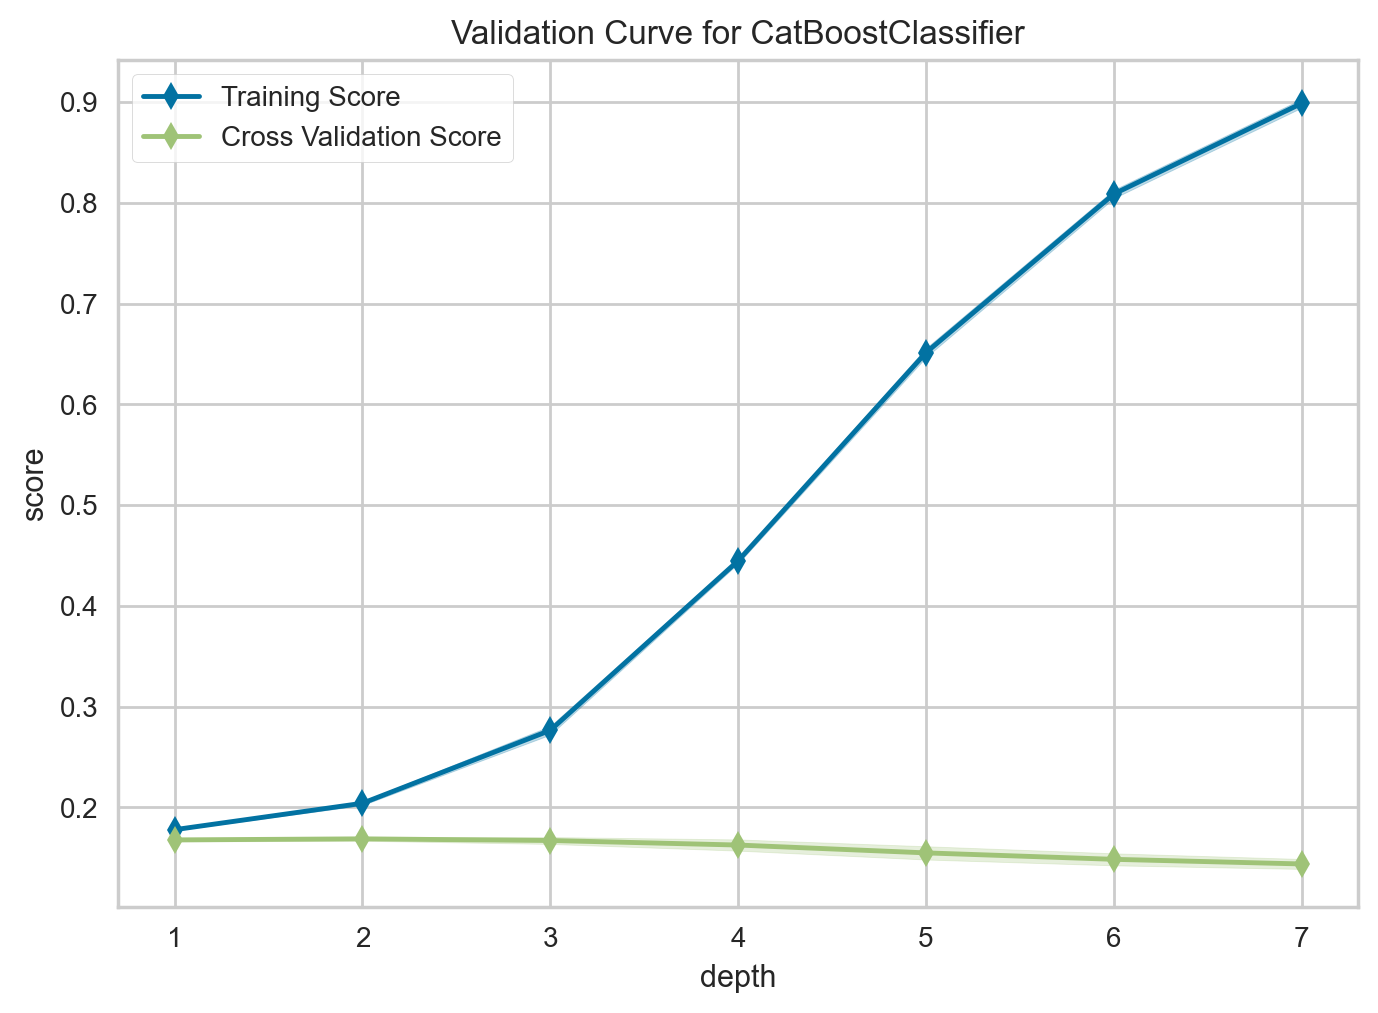

In [117]:
s_noPMA_UMAP_experiment.plot_model(best_noPMA_UMAP_model, plot = 'vc', scale = 2)

okay let's save the arg sort best model results as CSVs so that we can easily pickup if the kernel fails

In [84]:
encodedClasses = [(c.split(':')[0],int(c.split(': ')[-1])) for c in "4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase: 3, ABC: 4, ACAT: 5, ACE: 6, AChE: 7, AChR: 8, AGE: 9, AKR1: 10, AKT: 11, ALDH: 12, ALK: 13, AMPA_Receptor: 14, AMPK: 15, ATM/ATR: 16, ATP_Citrate_Lyase: 17, ATPase: 18, AT_Receptor: 19, AURK: 20, AXL_receptor_tyrosine_kinase: 21, Acetyl-CoA_Carboxylase: 22, Acyl-CoA:cholesterol_acyltransferase: 23, Acyltransferase: 24, Adenosine_Kinase: 25, Adenosine_Receptor: 26, Adenosine_deaminase: 27, Adenylyl_Cyclase: 28, Adiponectin_Receptor: 29, Adrenergic_Receptor: 30, Alcohol_dehydrogenase: 31, Aldose_reductase: 32, Amino_Acids_and_Derivatives: 33, Aminopeptidase: 34, Androgen_Receptor: 35, Anti-infection: 36, Antibacterial: 37, Antibacterial,_Antifungal: 38, Antibacterial_and_Antifungal: 39, Antibiotic: 40, Antifungal: 41, Antimalarial: 42, Antioxidant: 43, Antiviral: 44, Apoptosis_Autophagy: 45, Arginase: 46, Aromatase: 47, Aromatic_L-amino_acid_decarboxylase: 48, Arp2/3_complex: 49, Aryl_Hydrocarbon_Receptor: 50, Autotaxin_(ATX): 51, BACE: 52, BCL: 53, BET: 54, BMI-1: 55, BRAF: 56, BRD: 57, BTK: 58, Bacterial_DNA: 59, Bacterial_DNA_Gyrase_and_Topoisomerase_IV: 60, Bacterial_Ribosome: 61, Bcr-Abl: 62, Beta_Amyloid: 63, Bone_morphogenetic_protein_receptor_type_1_(BMPR1): 64, Brassinosteroid_receptor_BRI1: 65, Breast_Cancer_Resistance_Protein: 66, CCR: 67, CDK: 68, CGRP_Receptor: 69, COX: 70, CREB: 71, CSF: 72, CXCR: 73, CaMK: 74, CaSR: 75, Calcium_Channel: 76, Calpain: 77, Cannabinoid_Receptor: 78, Carbonic_Anhydrase: 79, Carnitine: 80, Casein_Kinase: 81, Caspase: 82, Catechol_O-methyltransferase_(COMT): 83, Cathepsin_K: 84, Cdc42: 85, Chitin_synthase: 86, Chk: 87, Chloride_Channel: 88, Cholesteryl_Ester_Transfer_Protein: 89, Collected_Controls: 90, Corticotropin-Releasing_Factor_Receptor_1: 91, Cruzain: 92, Cyclin_G_associated_kinase: 93, Cysteine_Protease: 94, Cystic_Fibrosis_Transmembrane_Conductance_Regulator: 95, Cytochrome: 96, Cytokinin_receptor: 97, DDR: 98, DHFR: 99, DNA/RNA_Associated: 100, DPP: 101, DUB: 102, DYRK: 103, Decaprenylphosphoryl-beta-D-ribose_2'-oxidase: 104, Dehydrogenase: 105, Dihydroorotate_Dehydrogenase: 106, Dihydropteroate_Synthase: 107, Dihydropyrimidine_dehydrogenase_(DPD): 108, Dopamine: 109, Dynamin: 110, Dynamin-related_protein_1_(Drp1): 111, Dynein_ATPase: 112, E26_transformation-specific_(ETS)_family: 113, EBI2/GPR183: 114, EGFR: 115, ERK: 116, Ecdysone_receptor: 117, Elongation_factor_G: 118, Endothelin_Receptor: 119, Enhancer_of_Zeste_Homolog_2_(EZH2): 120, Ephrin_Receptor: 121, Epigenetic_Reader_Domain: 122, Estrogen_Receptor: 123, Eukaryotic_translation_initiation_factor_4E_(eIF4E): 124, Exchange_protein_directly_activated_by_cAMP_(EPAC): 125, Exportin-1_(CRM1): 126, FAK: 127, FGFR: 128, FLT3: 129, FXR: 130, Factor_Xa: 131, Farnesyl_synthase: 132, Fatty_Acid: 133, Ferroptosis: 134, Free_radical_scavengers: 135, GABA: 136, GPCR: 137, GSK: 138, Gamma-secretase: 139, GluR: 140, Glucagon_Receptor: 141, Glucocorticoid_Receptor: 142, Glucokinase: 143, Glucose_Metabolism: 144, Glutamate_Channel: 145, Glutathione_Metabolism: 146, Glycine_transporter_type_1_(GlyT1): 147, Glycogen_phosphorylase: 148, Gonadotropin-releasing_hormone_receptor: 149, Growth_Hormone_Secretagogue_Receptor: 150, Guanylate_cyclase: 151, H+/K+_ATPase: 152, HAT: 153, HBV: 154, HCV_NS3/4A_protease: 155, HCV_NS5A_protein: 156, HCV_NS5B_polymerase: 157, HDAC: 158, HIF: 159, HIV: 160, HMG-CoA_Reductase: 161, HSP: 162, HSV: 163, HSV_DNA_Polymerase: 164, Haspin_Kinase: 165, Heme_oxygenase-1: 166, Hexokinase: 167, Histamine_Receptor: 168, Histone_Demethylase: 169, Histone_Methyltransferase: 170, Human_Epidermal_Growth_Factor_Receptor_2_(HER2): 171, Hydroxyapatite_in_bone: 172, Hydroxylase: 173, Hypoxanthine-guanine_phosphoribosyltransferase: 174, IDH: 175, IDO: 176, IF_Receptor: 177, IGF-1R: 178, IKK: 179, IL_Receptor: 180, IMPDH: 181, IRAK: 182, Immunology/Inflammation_related: 183, Immunomodulator: 184, Influenza_Virus: 185, Inhibitor_of_Apoptosis_Proteins_(IAP): 186, Inositol-requiring_enzyme_1: 187, Insulin: 188, Integrase: 189, Integrin: 190, Iron_chelator: 191, Isoleucyl-tRNA_synthetase: 192, JAK: 193, JNK: 194, KIF: 195, Keap1-Nrf2: 196, Kelch-like_ECH-associated_protein_1: 197, LAT1: 198, LIM_Kinase: 199, LOX: 200, LPA_Receptor: 201, Lactate_Dehydrogenase: 202, Lanosterol_Demethylase: 203, Leucine-rich_repeat_kinase_2: 204, Leukotriene_A4_hydrolase: 205, Leukotriene_Receptor: 206, Lipase: 207, Lipid: 208, Liver_X_Receptor: 209, Lysine_Demethylase: 210, Lysophosphatidic_acid_receptor: 211, MAO: 212, MAPK: 213, MEK: 214, MLK: 215, MMP: 216, MTH1: 217, Mdm2: 218, Melanocortin_Receptor: 219, Menin-MLL_interaction: 220, Mer_tyrosine_kinase: 221, Metabolite: 222, Methionine_aminopeptidase_2: 223, Methionine_synthase: 224, Microtubule_Associated: 225, Mineralocorticoid_Receptor: 226, Mitochondria_Associated: 227, Monoacylglycerol_lipase: 228, Monocarboxylate_Transporter: 229, Monopolar_spindle_1_kinase: 230, Multiple_ion_channels_and_receptors_including_potassium_channel,_sodium_channel,_and_calcium_channel: 231, MyD88: 232, Myc: 233, Mycolic_acid_synthesis: 234, Myeloid_cell_leukemia_1: 235, Myeloperoxidase: 236, Myosin: 237, Myosin_light_chain_kinase: 238, NADPH_MetabolismEnzyme: 239, NEDD8: 240, NFkB: 241, NMDA_Receptor: 242, NOD-like_Receptor_(NLR): 243, NOS: 244, NR1D1: 245, Na+/Ca2+_Exchanger: 246, Na+/H+_Exchanger: 247, Na+/K+_ATPase: 248, Na-K-Cl_cotransporter: 249, Neprilysin: 250, Neuraminidase: 251, Neurokinin_Receptor: 252, Neuropeptide_Y_Receptor: 253, Neurotensin_Receptor: 254, Neutrophil_elastase: 255, Nicotinamide_phosphoribosyltransferase: 256, Norepinephrine_Transporter: 257, Notch_signaling_pathway: 258, Nrf: 259, Nucleoside_Antimetabolite/Analog: 260, Nur77_(NR4A1): 261, O-GlcNAcase: 262, OX_Receptor: 263, Octamer-binding_transcription_factor_4: 264, Opioid_Receptor: 265, Orexin_Receptor: 266, Ornithine_decarboxylase: 267, P-glycoprotein: 268, P2_Receptor: 269, PAD: 270, PAK: 271, PAR: 272, PARP: 273, PD-1/PD-L1: 274, PDE: 275, PDGFR: 276, PDK: 277, PERK: 278, PI3K: 279, PKA: 280, PKC: 281, PKD: 282, PLK: 283, PPAR: 284, PTEN_(Phosphatase_and_tensin_homolog): 285, Papain-like_protease_(PLpro)_of_SARS-CoV-2: 286, Parasite: 287, Penicillin_Binding: 288, Peptidoglycan_synthesis_enzymes: 289, Phosphatase: 290, Phosphoglycerate_dehydrogenase: 291, Phosphoglycerate_mutase_1_(PGAM1): 292, Phospholipase: 293, Photosystem_II: 294, Pim_Kinase: 295, Plasminogen_activator_inhibitor-1: 296, Platelet-activating_factor_receptor: 297, Platelet_aggregation: 298, Polycomb_Repressive_Complex_2_(PRC2): 299, Porcupine: 300, Potassium_Channel: 301, Progesterone_Receptor: 302, Prostaglandin: 303, Protease-activated_Receptor: 304, Proteasome: 305, Protein_Arginine_Deiminase_(PAD): 306, Protein_Arginine_Methyltransferase_5: 307, Protein_Phosphatase: 308, Protein_Tyrosine_Phosphatase: 309, Pyruvate_dehydrogenase: 310, RAD51: 311, RAF: 312, RIPK: 313, RNA-dependent_RNA_polymerase_(RdRp): 314, RNA_polymerase: 315, ROR: 316, ROS: 317, Ras: 318, Receptor_for_Advanced_Glycation_End_Products_(RAGE): 319, Renin: 320, Respiratory_syncytial_virus: 321, Retinoic_Acid: 322, Retinoid_Receptor: 323, Reverse_Transcriptase: 324, Rho/ROCK: 325, Ribonucleotide_Reductase: 326, Ryanodine_receptor: 327, S-adenosylhomocysteine_hydrolase: 328, S1P_Receptor: 329, S6_Kinase: 330, SARS-CoV: 331, SH2-containing_protein_tyrosine_phosphatase-2_(SHP2): 332, SH2_domain-containing_inositol_5'-phosphatase_1_(SHIP1): 333, SIK: 334, SMYD2: 335, STAT: 336, STING: 337, Serine_Kinase: 338, Serine_Protease: 339, Serotonin: 340, Serum_and_glucocorticoid-regulated_kinase: 341, Sigma_Receptor: 342, Sirtuin: 343, Smoothened_Receptor: 344, Sodium-chloride_symporter: 345, Sodium/glucose_cotransporter: 346, Sodium_Channel: 347, Sodium_taurocholate_cotransporting_polypeptide_(NTCP): 348, Soluble_Epoxide_Hydrolase_(sEH): 349, Soluble_guanylate_cyclase_(sGC): 350, Sphingosine_Kinase/Receptor: 351, Squalene_epoxidase: 352, Src: 353, Stearoyl-CoA_Desaturase: 354, Steroid_Biosynthesis: 355, Succinate_dehydrogenase: 356, Sulfonylurea_Receptor: 357, Survivin: 358, Syk: 359, T-LAK_Cell-Originated_Protein_Kinase: 360, TAM_Receptor: 361, TBK: 362, TGF: 363, TGR: 364, TLR: 365, TNF: 366, Tankyrase: 367, Tau_protein: 368, Telomerase: 369, Thrombin: 370, Thrombopoietin_Receptor: 371, Thromboxane_A2: 372, Thymidine_kinase: 373, Thymidine_phosphorylase: 374, Thymidylate_Synthase: 375, Thyroid_Hormone_Receptor: 376, Thyroid_peroxidase: 377, Tie-2: 378, Topoisomerase: 379, Trace_amine-associated_receptor_1: 380, Transient_Receptor: 381, Transketolase: 382, Transthyretin: 383, Trk: 384, Trypanothione_reductase: 385, Tryptophan_Hydroxylase: 386, Tyrosine_Kinase: 387, ULK: 388, Ubiquitin_E1: 389, Ubiquitin_Ligase: 390, Urate_transporter_1_(URAT1): 391, VDAC: 392, VEGFR: 393, VKOR: 394, Vasopressin_Receptor: 395, Vesicular_monoamine_transporter_2_(VMAT2): 396, Viral_DNA_polymerase: 397, Viral_RNA_polymerase: 398, Virus_Protease: 399, Vitamin_B: 400, Vitamin_D_Receptor: 401, Wee1: 402, Wnt/beta-Catenin: 403, Xanthine_Oxidase: 404, YAP: 405, aconitase: 406, alpha-glucosidase: 407, beta-glucosidase: 408, beta-lactamase: 409, c-Kit: 410, c-Met_HGFR: 411, c-RET: 412, cAMP: 413, cardiac_myosin: 414, cell_cycle_arrest: 415, cholecystokinin_receptor: 416, enoyl-acyl_carrier_protein_reductase: 417, iGluR: 418, ionotropic_glutamate_receptor: 419, lysophospholipase_1: 420, mGluR: 421, mTOR: 422, mast_cell_stabilizer: 423, p53: 424, p97: 425".split(', ')]

In [129]:
conf_df = pd.DataFrame(s_horiz_PMA_noPMA_UMAP_experiment._display_container[0])
target_mapping = conf_df[conf_df['Description'] == 'Target mapping']['Value'].values
print(target_mapping)

["4-hydroxyphenylpyruvate_dioxygenase: 0, 5-HT: 1, 5-alpha_reductase: 2, 8-oxoguanine_DNA_glycosylase: 3, ABC: 4, ACAT: 5, ACE: 6, AChE: 7, AChR: 8, AGE: 9, AKR1: 10, AKT: 11, ALDH: 12, ALK: 13, AMPA_Receptor: 14, AMPK: 15, ATM/ATR: 16, ATP_Citrate_Lyase: 17, ATPase: 18, AT_Receptor: 19, AURK: 20, AXL_receptor_tyrosine_kinase: 21, Acetyl-CoA_Carboxylase: 22, Acyl-CoA:cholesterol_acyltransferase: 23, Acyltransferase: 24, Adenosine_Kinase: 25, Adenosine_Receptor: 26, Adenosine_deaminase: 27, Adenylyl_Cyclase: 28, Adiponectin_Receptor: 29, Adrenergic_Receptor: 30, Alcohol_dehydrogenase: 31, Aldose_reductase: 32, Amino_Acids_and_Derivatives: 33, Aminopeptidase: 34, Androgen_Receptor: 35, Anti-infection: 36, Antibacterial: 37, Antibacterial,_Antifungal: 38, Antibacterial_and_Antifungal: 39, Antibiotic: 40, Antifungal: 41, Antimalarial: 42, Antioxidant: 43, Antiviral: 44, Apoptosis_Autophagy: 45, Arginase: 46, Aromatase: 47, Aromatic_L-amino_acid_decarboxylase: 48, Arp2/3_complex: 49, Aryl_H

In [132]:
target_mappings = dict()
for exp in [s_noPMA_UMAP_experiment, s_horiz_PMA_noPMA_UMAP_experiment, s_PMA_UMAP_experiment, s_PMA_Red08_experiment, s_noPMA_Red08_experiment, s_PMA_noPMA_Red08_experiment]:
    conf_df = pd.DataFrame(s_horiz_PMA_noPMA_UMAP_experiment._display_container[0])
    targets = conf_df[conf_df['Description'] == 'Target mapping']['Value'].values
    for item in targets[0].split(', '):
        c,i = item.split(': ')
        i = int(i)
        if i in target_mappings.keys():
            target_mappings[i].add(c)
        elif i not in target_mappings.keys():
            target_mappings[i] = set()
            target_mappings[i].add(c)
    # break

display([c for i,c in target_mappings.items() if len(c) >1])

[]

In [86]:
encodedClasses = {c:i for c,i in encodedClasses}
encodedClasses

{'4-hydroxyphenylpyruvate_dioxygenase': 0,
 '5-HT': 1,
 '5-alpha_reductase': 2,
 '8-oxoguanine_DNA_glycosylase': 3,
 'ABC': 4,
 'ACAT': 5,
 'ACE': 6,
 'AChE': 7,
 'AChR': 8,
 'AGE': 9,
 'AKR1': 10,
 'AKT': 11,
 'ALDH': 12,
 'ALK': 13,
 'AMPA_Receptor': 14,
 'AMPK': 15,
 'ATM/ATR': 16,
 'ATP_Citrate_Lyase': 17,
 'ATPase': 18,
 'AT_Receptor': 19,
 'AURK': 20,
 'AXL_receptor_tyrosine_kinase': 21,
 'Acetyl-CoA_Carboxylase': 22,
 'Acyl-CoA': 23,
 'Acyltransferase': 24,
 'Adenosine_Kinase': 25,
 'Adenosine_Receptor': 26,
 'Adenosine_deaminase': 27,
 'Adenylyl_Cyclase': 28,
 'Adiponectin_Receptor': 29,
 'Adrenergic_Receptor': 30,
 'Alcohol_dehydrogenase': 31,
 'Aldose_reductase': 32,
 'Amino_Acids_and_Derivatives': 33,
 'Aminopeptidase': 34,
 'Androgen_Receptor': 35,
 'Anti-infection': 36,
 'Antibacterial': 37,
 'Antibacterial,_Antifungal': 38,
 'Antibacterial_and_Antifungal': 39,
 'Antibiotic': 40,
 'Antifungal': 41,
 'Antimalarial': 42,
 'Antioxidant': 43,
 'Antiviral': 44,
 'Apoptosis_Auto

In [97]:
pd.DataFrame(best_noPMA_Red08_model.predict_proba(Red08_noPMA.rename(columns=lambda col: col.replace('[','').replace(']', ''))),
             columns=best_noPMA_Red08_model.classes_,
             index=Red08_noPMA.index).apply(argsort_named,axis=1)

T6207._.1uM._.F15._.SP7209            [beta-glucosidase, Human_Epidermal_Growth_Fact...
T4564._.1uM._.E08._.SP7209            [MTH1, E26_transformation-specific_(ETS)_famil...
T5009._.1uM._.B19._.SP7209            [AXL_receptor_tyrosine_kinase, T-LAK_Cell-Orig...
T4687._.1uM._.C12._.SP7209            [E26_transformation-specific_(ETS)_family, T-L...
T5039._.1uM._.G01._.SP7209            [Na+/K+_ATPase, Papain-like_protease_(PLpro)_o...
                                                            ...                        
well_R._.10uM._.E20._.SP7237          [Thymidine_kinase, Lysophosphatidic_acid_recep...
well_R._.10uM._.M13._.SP7237          [AXL_receptor_tyrosine_kinase, Human_Epidermal...
Alrestatin_3._.10uM._.M20._.SP7237    [AXL_receptor_tyrosine_kinase, MTH1, T-LAK_Cel...
LY2109761_2._.10uM._.I06._.SP7237     [Lanosterol_Demethylase, Na+/K+_ATPase, Calpai...
TCS7004_3._.10uM._.K21._.SP7237       [Mineralocorticoid_Receptor, Human_Epidermal_G...
Length: 20734, dtype: object

In [96]:
def argsort_named (row,translation=encodedClasses):
    trans = {i:c for c,i in encodedClasses.items()}
    return [trans[x] for x in np.argsort(row)]

In [113]:
for model,labeledDF,saveName in [(best_noPMA_UMAP_model, UMAP_noPMA_labeled,'best_UMAP01_noPMA_catboost_preda'),
                                 (best_horiz_PMA_noPMA_UMAP_model, UMAP_PMA_noPMA_labeled,'best_UMAP01_PMA+noPMA_catboost_preda'),
                                 (best_PMA_UMAP_model, UMAP_PMA_labeled,'best_UMAP01_PMA_catboost_preda'),
                                 (best_PMA_Red08_model, Red08_PMA_labeled,'best_Red08_PMA_catboost_preda'),
                                 (best_noPMA_Red08_model, Red08_noPMA_labeled,'best_Red08_noPMA_catboost_preda'),
                                 (best_PMA_noPMA_Red08_model, Red08_PMA_noPMA_labeled,'best_Red08_PMA+noPMA_catboost_preda')
                                ]:
    print(saveName)
    predictions = pd.DataFrame(model.predict_proba(labeledDF.drop(columns='AL_CONSOLIDATED').rename(columns=lambda col: col.replace('[','').replace(']', ''))),
                               columns=model.classes_,
                              index=labeledDF.index)
    predictions.to_csv(f"B:/{saveName}.csv")
    predictions['argsort_preda'] = predictions.apply(argsort_named,axis=1)
    max_length = predictions['argsort_preda'].apply(len).max()
    for i in range(max_length):
        # Create new column names based on descending order from the length of the longest list
        predictions[f'argsort_preda_{max_length - i}'] = predictions['argsort_preda'].apply(lambda x: x[i] if len(x) > i else None)
        
    pd.merge(left=labeledDF['AL_CONSOLIDATED'],right=predictions[[col for col in predictions.columns if str(col).startswith('argsort_preda_')]],
             left_index=True,right_index=True).to_csv(f"B:/{saveName}_argsort.tsv",sep="\t")

best_UMAP01_noPMA_catboost_preda
best_UMAP01_PMA+noPMA_catboost_preda
best_UMAP01_PMA_catboost_preda
best_Red08_PMA_catboost_preda
best_Red08_noPMA_catboost_preda
best_Red08_PMA+noPMA_catboost_preda


In [112]:
for model,labeledDF,saveName in [(best_noPMA_UMAP_model_final, UMAP_noPMA_labeled, 'best_noPMA_UMAP_model_final'),
                                 (best_horiz_PMA_noPMA_UMAP_model_final, UMAP_PMA_noPMA_labeled, 'best_PMA+noPMA_UMAP_model_final'),
                                 (best_PMA_UMAP_model_final, UMAP_PMA_labeled, 'best_PMA_UMAP_model_final'),
                                 (best_PMA_Red08_model_final, Red08_PMA_labeled, 'best_PMA_Red08_model_final'),
                                 (best_noPMA_Red08_model_final, Red08_noPMA_labeled, 'best_noPMA_Red08_model_final'),
                                 (best_PMA_noPMA_Red08_model_final, Red08_PMA_noPMA_labeled, 'best_PMA+noPMA_Red08_model_final')
                                ]:
    print(saveName)
    predictions = pd.DataFrame(model.predict_proba(labeledDF.drop(columns='AL_CONSOLIDATED')),#.rename(columns=lambda col: col.replace('[','').replace(']', ''))
                               columns=model.classes_,
                              index=labeledDF.index)
    predictions.to_csv(f"B:/{saveName}_catboost_preda.csv")
    predictions['argsort_preda'] = predictions.apply(argsort_named,axis=1)
    max_length = predictions['argsort_preda'].apply(len).max()
    for i in range(max_length):
        # Create new column names based on descending order from the length of the longest list
        predictions[f'argsort_preda_{max_length - i}'] = predictions['argsort_preda'].apply(lambda x: x[i] if len(x) > i else None)

    pd.merge(left=labeledDF['AL_CONSOLIDATED'],right=predictions[[col for col in predictions.columns if str(col).startswith('argsort_preda_')]],
             left_index=True,right_index=True).to_csv(f"B:/{saveName}_catboost_preda_argsort.tsv",sep="\t")

best_noPMA_UMAP_model_final
best_PMA+noPMA_UMAP_model_final
best_PMA_UMAP_model_final
best_PMA_Red08_model_final
best_noPMA_Red08_model_final
best_PMA+noPMA_Red08_model_final


Let get to plotting violins

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
display(df_proba,true_label)
proba_values.iloc[0][encodedClasses[true_label]]

Unnamed: 0         0         1         2  \
0      T2S1814._.1uM._.F15._.SP7224PMA  0.000028  0.002888  0.000036   
1        T1924._.1uM._.E08._.SP7224PMA  0.000011  0.001240  0.000110   
2        T3456._.1uM._.B19._.SP7224PMA  0.000020  0.000955  0.000037   
3        T6090._.1uM._.C12._.SP7224PMA  0.000025  0.000735  0.000059   
4      T3S0027._.1uM._.G01._.SP7224PMA  0.000010  0.000261  0.000014   
...                                ...       ...       ...       ...   
16513   T4952._.10uM._.C19._.SP7237PMA  0.000005  0.000018  0.000018   
16514   T4786._.10uM._.E11._.SP7237PMA  0.000053  0.003037  0.000036   
16515   T4880._.10uM._.I21._.SP7237PMA  0.000007  0.002061  0.000031   
16516   T4993._.10uM._.D03._.SP7237PMA  0.000022  0.000779  0.000077   
16517   T4572._.10uM._.P23._.SP7237PMA  0.000252  0.000848  0.000356   

              3         4         5         6         7         8  ...  \
0      0.000048  0.000043  0.000064  0.000156  0.000630  0.002570  ...   
1      0.000020  0.000010  0.000015  0.000128  0.000540  0.001363  ...   
2      0.000020  0.000010  0.000006  0.000148  0.000147  0.001081  ...   
3      0.000017  0.000010  0.000020  0.000089  0.000183  0.001145  ...   
4      0.000012  0.000012  0.000012  0.000036  0.000013  0.000024  ...   
...         ...       ...       ...       ...       ...       ...  ...   
16513  0.000006  0.000007  0.000005  0.000014  0.000008  0.000067  ...   
16514  0.000049  0.000041  0.000029  0.000154  0.000215  0.014565  ...   
16515  0.000023  0.000009  0.000011  0.000102  0.000177  0.003897  ...   
16516  0.000023  0.000015  0.000020  0.000298  0.000149  0.000769  ...   
16517  0.000164  0.000187  0.000563  0.000148  0.000362  0.031939  ...   

            416       417       418       419       420       421       422  \
0      0.000014  0.000086  0.000082  0.000032  0.000022  0.002492  0.000474   
1      0.000012  0.000023  0.000082  0.000014  0.000017  0.000301  0.000256   
2      0.000089  0.000021  0.000044  0.000027  0.000008  0.000150  0.000062   
3      0.000066  0.000010  0.000046  0.000012  0.000010  0.000202  0.000109   
4      0.000017  0.000008  0.000017  0.000007  0.000017  0.000012  0.000072   
...         ...       ...       ...       ...       ...       ...       ...   
16513  0.000004  0.000006  0.000006  0.000009  0.000006  0.000004  0.000461   
16514  0.000017  0.000017  0.000092  0.000026  0.000016  0.000102  0.000251   
16515  0.000007  0.000031  0.000019  0.000030  0.000018  0.000042  0.000069   
16516  0.000018  0.000014  0.000046  0.000050  0.000050  0.000374  0.000168   
16517  0.000257  0.000339  0.000243  0.000505  0.000135  0.000962  0.001310   

            423       424       425  
0      0.000032  0.000065  0.000104  
1      0.000017  0.000099  0.000020  
2      0.000029  0.000041  0.000010  
3      0.000020  0.000031  0.000005  
4      0.000010  0.000039  0.000023  
...         ...       ...       ...  
16513  0.000005  0.000131  0.000259  
16514  0.000063  0.000075  0.000029  
16515  0.000026  0.000063  0.000017  
16516  0.000020  0.000055  0.000014  
16517  0.000201  0.000176  0.000274  

[16518 rows x 427 columns]

'DUB'

2.665322216551493e-05

In [200]:
true_label_col = 'AL_CONSOLIDATED'  # Assuming this is the true label column, modify if needed

# Max rank to consider
max_rank = 5

# Prepare data for plotting
data_list_UMAP = []

for model,labeledDF,saveName,dsName in [(best_noPMA_UMAP_model,UMAP_noPMA_labeled,'best_UMAP01_noPMA_catboost_preda','noPMA'),
                                 (best_horiz_PMA_noPMA_UMAP_model,UMAP_PMA_noPMA_labeled,'best_UMAP01_PMA+noPMA_catboost_preda','PMA+noPMA'),
                                 (best_PMA_UMAP_model,UMAP_PMA_labeled,'best_UMAP01_PMA_catboost_preda','PMA'),
                                ]:
    # Read the prediction probabilities
    df_proba = pd.read_csv(f'B:/{saveName}.csv',index_col=0)
    
    # Read the ranked predictions
    df_ranked = pd.read_csv(f'B:/{saveName}_argsort.tsv', sep='\t',index_col=0)
    ranked_reorder_cols = df_ranked.columns[:1].to_list() + sorted(df_ranked.columns[1:], key=lambda x:int(x.split('_')[-1]))
    print(ranked_reorder_cols)
    # break
    df_ranked = df_ranked[ranked_reorder_cols]
    
    # Iterate over each sample
    for idx, row in df_ranked.iterrows():
        true_label = row[true_label_col]
        
        # Get corresponding probabilities using the index directly
        proba_values = df_proba.loc[idx]
        
        for n in range(1, max_rank + 1):  # From top 1 to top N
            top_n_predictions = row.iloc[1:1 + n].values  # Getting the top N predictions
            
            if true_label in top_n_predictions:
                # If true label is in top N predictions
                proba_value = proba_values[encodedClasses[true_label]]
                match_status = 'Match'
            else:
                # If true label is not in top N predictions
                proba_value = np.mean(proba_values[[encodedClasses[c] for c in top_n_predictions]])
                match_status = 'Avg No Match'
            
            data_list_UMAP.append({
                'Dataset': dsName,  # This could be adjusted if there's a Dataset column
                'Rank': f'Top{n}',
                'Proba': proba_value,
                'Match': match_status
            })
plot_df_UMAP = pd.DataFrame(data_list_UMAP)

['AL_CONSOLIDATED', 'argsort_preda_1', 'argsort_preda_2', 'argsort_preda_3', 'argsort_preda_4', 'argsort_preda_5', 'argsort_preda_6', 'argsort_preda_7', 'argsort_preda_8', 'argsort_preda_9', 'argsort_preda_10', 'argsort_preda_11', 'argsort_preda_12', 'argsort_preda_13', 'argsort_preda_14', 'argsort_preda_15', 'argsort_preda_16', 'argsort_preda_17', 'argsort_preda_18', 'argsort_preda_19', 'argsort_preda_20', 'argsort_preda_21', 'argsort_preda_22', 'argsort_preda_23', 'argsort_preda_24', 'argsort_preda_25', 'argsort_preda_26', 'argsort_preda_27', 'argsort_preda_28', 'argsort_preda_29', 'argsort_preda_30', 'argsort_preda_31', 'argsort_preda_32', 'argsort_preda_33', 'argsort_preda_34', 'argsort_preda_35', 'argsort_preda_36', 'argsort_preda_37', 'argsort_preda_38', 'argsort_preda_39', 'argsort_preda_40', 'argsort_preda_41', 'argsort_preda_42', 'argsort_preda_43', 'argsort_preda_44', 'argsort_preda_45', 'argsort_preda_46', 'argsort_preda_47', 'argsort_preda_48', 'argsort_preda_49', 'argsort_

In [201]:
plot_df_UMAP

Dataset  Rank     Proba  Match
0        noPMA  Top1  0.134945  Match
1        noPMA  Top2  0.134945  Match
2        noPMA  Top3  0.134945  Match
3        noPMA  Top4  0.134945  Match
4        noPMA  Top5  0.134945  Match
...        ...   ...       ...    ...
247750     PMA  Top1  0.293655  Match
247751     PMA  Top2  0.293655  Match
247752     PMA  Top3  0.293655  Match
247753     PMA  Top4  0.293655  Match
247754     PMA  Top5  0.293655  Match

[247755 rows x 4 columns]

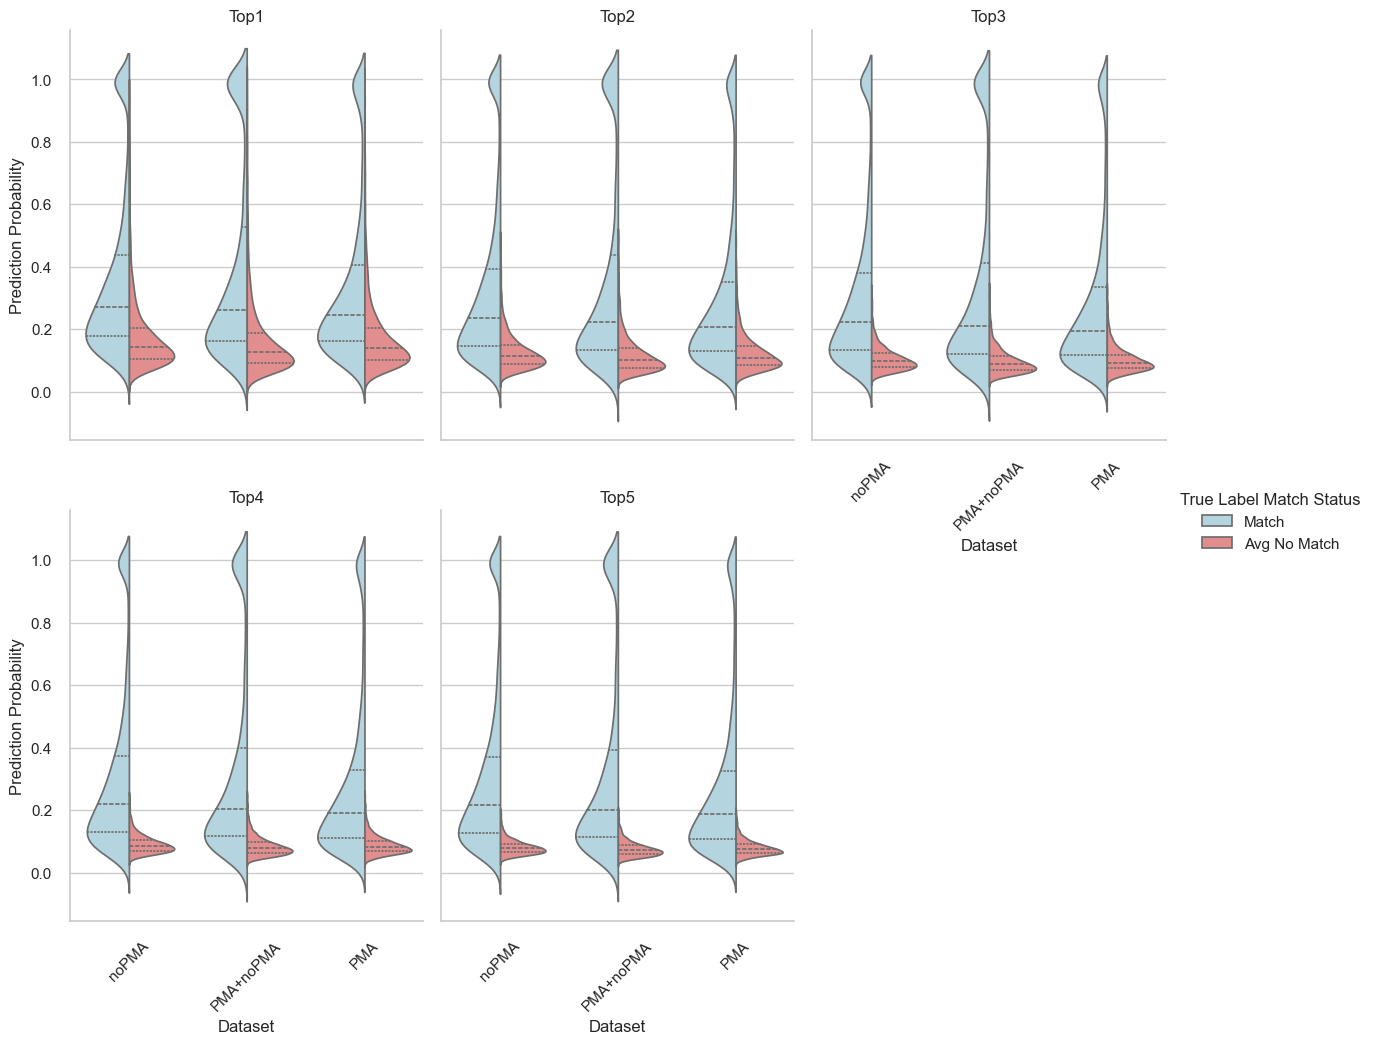

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Adjust the aspect ratio and use col_wrap to reduce the width
g = sns.FacetGrid(
    plot_df_UMAP,
    col="Rank",        # Separate plot for each rank
    height=5,          # Adjust height to reduce overall size
    aspect=0.8,        # Reduce the aspect ratio to make the plots narrower
    col_wrap=3         # Wrap the plots into 3 columns
)

# Map the violin plot onto the FacetGrid
g.map_dataframe(
    sns.violinplot,
    x='Dataset',
    y='Proba',
    hue='Match',
    split=True,
    inner="quart",
    palette={"Match": "lightblue", "Avg No Match": "lightcoral"}
)

# Adjust the legend
g.add_legend(title='True Label Match Status')

# Set titles and labels
g.set_axis_labels("Dataset", "Prediction Probability")
g.set_titles("{col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Show the plot
plt.savefig(f'B:/Catboost_models_UMAP01_top5_predProbDist.svg',dpi=300)
plt.show()
plt.close()

let's also have bar plot of the proportions of successful matches vs non-matches

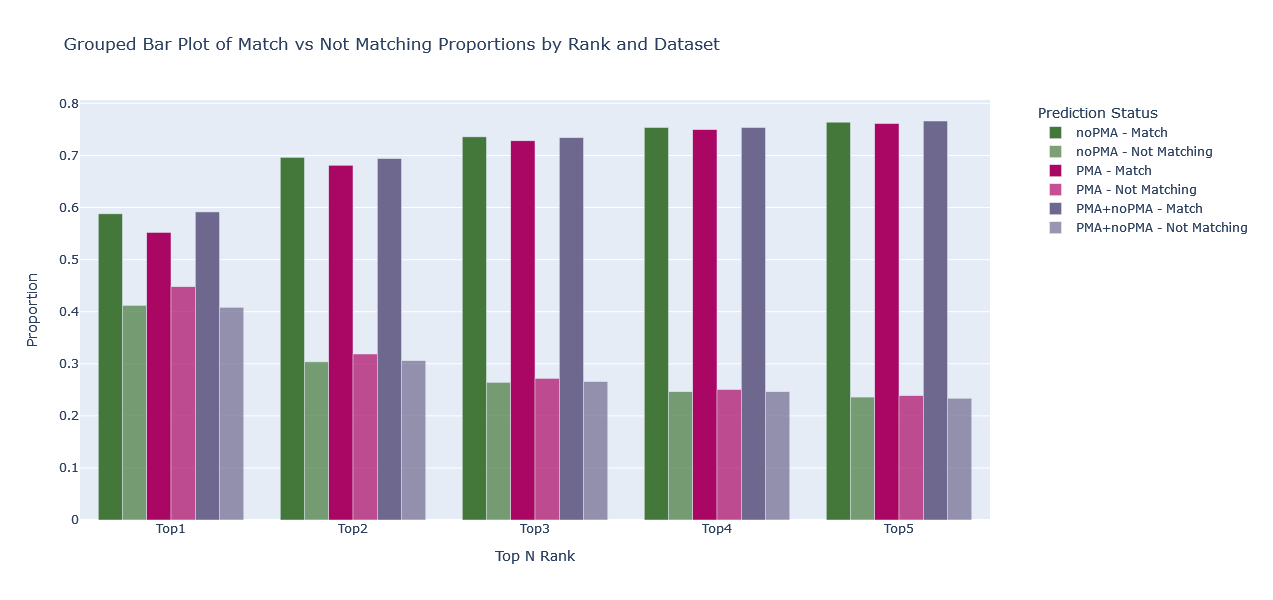

In [222]:
import plotly.graph_objs as go
import pandas as pd

# Calculate counts of matches and non-matches for each dataset and rank
proportion_df_UMAP = plot_df_UMAP.groupby(['Dataset', 'Rank', 'Match']).size().reset_index(name='Count')

# Rename 'Avg No Match' to 'Not Matching'
proportion_df_UMAP['Match'] = proportion_df_UMAP['Match'].replace('Avg No Match', 'Not Matching')

# Calculate the total count per Dataset and Rank
total_counts_UMAP = proportion_df_UMAP.groupby(['Dataset', 'Rank'])['Count'].transform('sum')

# Calculate the proportion
proportion_df_UMAP['Proportion'] = proportion_df_UMAP['Count'] / total_counts_UMAP

# Ensure the datasets are ordered correctly
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']
proportion_df_UMAP['Dataset'] = pd.Categorical(proportion_df_UMAP['Dataset'], categories=dataset_order, ordered=True)

# Create the Plotly figure
fig = go.Figure()

# Loop through each dataset and add traces for stacking with adjusted alpha
for dataset in dataset_order:
    for match_status, alpha in zip(['Match', 'Not Matching'], [1.0, 0.7]):
        filtered_df = proportion_df_UMAP[(proportion_df_UMAP['Match'] == match_status) & (proportion_df_UMAP['Dataset'] == dataset)]
        fig.add_trace(go.Bar(
            x=filtered_df['Rank'],
            y=filtered_df['Proportion'],
            name=f'{dataset} - {match_status}',
            marker=dict(color={'noPMA': '#43783A', 'PMA': '#aa0664', 'PMA+noPMA': '#6F688E'}[dataset]),
            opacity=alpha,
        ))

# Update layout to group bars and stretch the plot horizontally for better visibility
fig.update_layout(
    barmode='group',  # Group the bars by rank
    title='Grouped Bar Plot of Match vs Not Matching Proportions by Rank and Dataset',
    xaxis_title='Top N Rank',
    yaxis_title='Proportion',
    legend_title='Prediction Status',
    legend=dict(x=1.05, y=1),
    width=1200,  # Stretching the width of the plot area
    height=600   # You can adjust the height too if necessary
)

# Show the plot
fig.show()


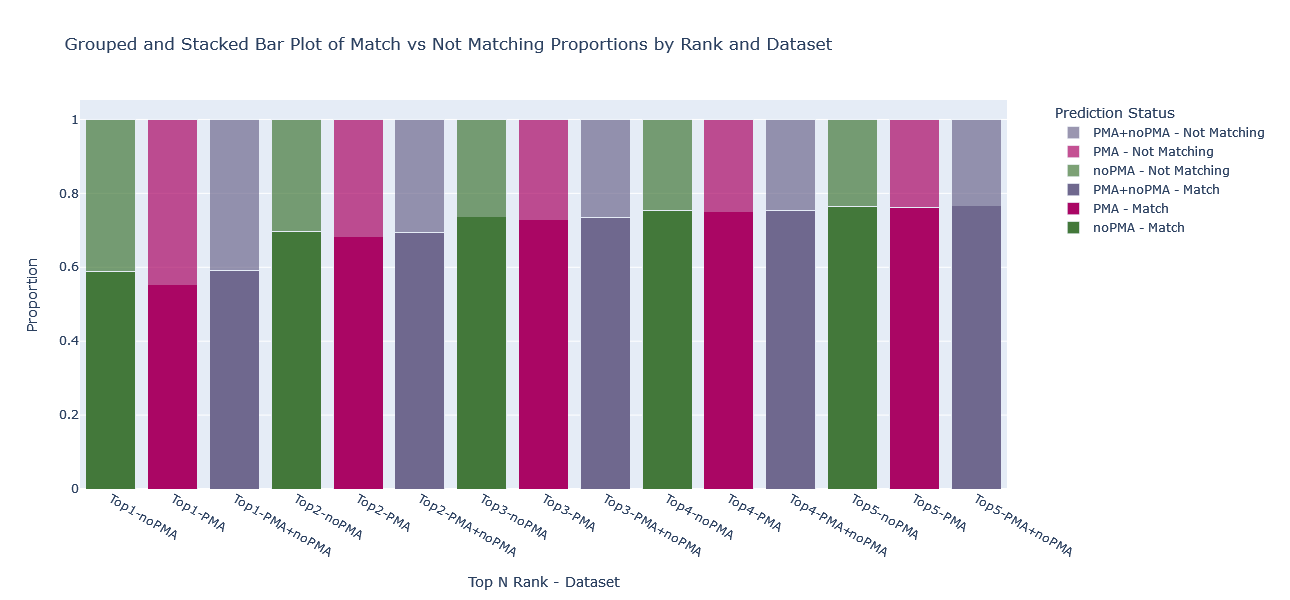

In [223]:
import plotly.graph_objs as go
import pandas as pd

# Calculate counts of matches and non-matches for each dataset and rank
proportion_df_UMAP = plot_df_UMAP.groupby(['Dataset', 'Rank', 'Match']).size().reset_index(name='Count')

# Rename 'Avg No Match' to 'Not Matching'
proportion_df_UMAP['Match'] = proportion_df_UMAP['Match'].replace('Avg No Match', 'Not Matching')

# Calculate the total count per Dataset and Rank
total_counts_UMAP = proportion_df_UMAP.groupby(['Dataset', 'Rank'])['Count'].transform('sum')

# Calculate the proportion
proportion_df_UMAP['Proportion'] = proportion_df_UMAP['Count'] / total_counts_UMAP

# Ensure the datasets are ordered correctly
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']
proportion_df_UMAP['Dataset'] = pd.Categorical(proportion_df_UMAP['Dataset'], categories=dataset_order, ordered=True)

# Combine rank and dataset for custom x-axis ordering
proportion_df_UMAP['Rank_Dataset'] = proportion_df_UMAP['Rank'].astype(str) + '-' + proportion_df_UMAP['Dataset'].astype(str)

# Create the Plotly figure
fig = go.Figure()

# Loop through each match status and add traces for stacking within groups
for match_status, alpha in zip(['Match', 'Not Matching'], [1.0, 0.7]):
    for dataset in dataset_order:
        filtered_df = proportion_df_UMAP[(proportion_df_UMAP['Match'] == match_status) & (proportion_df_UMAP['Dataset'] == dataset)]
        fig.add_trace(go.Bar(
            x=filtered_df['Rank_Dataset'],  # Custom x-axis with combined rank and dataset
            y=filtered_df['Proportion'],
            name=f'{dataset} - {match_status}',
            marker=dict(color={'noPMA': '#43783A', 'PMA': '#aa0664', 'PMA+noPMA': '#6F688E'}[dataset]),
            opacity=alpha,
        ))

# Define the custom x-axis order
custom_x_order = []
for rank in sorted(proportion_df_UMAP['Rank'].unique(), key=lambda x: int(x.replace('Top', ''))):
    for dataset in dataset_order:
        custom_x_order.append(f"{rank}-{dataset}")

# Update layout to stack within groups and set the custom x-axis order
fig.update_layout(
    barmode='stack',  # Stack bars within each group
    title='Grouped and Stacked Bar Plot of Match vs Not Matching Proportions by Rank and Dataset',
    xaxis=dict(
        title='Top N Rank - Dataset',
        categoryorder='array',
        categoryarray=custom_x_order  # Apply the custom x-axis order
    ),
    yaxis_title='Proportion',
    legend_title='Prediction Status',
    legend=dict(x=1.05, y=1),
    width=1200,  # Adjust the width for better visibility
    height=600   # Adjust the height if necessary
)

# Show the plot
fig.show()


now violins and bar plot for the FeatRead data trained models.

In [168]:
# Ensure the true label is correctly aligned with ranked predictions
# I will assume that the true label is identified by the "AL_CONSOLIDATED" column in df_ranked

# Extracting the true label for each sample
true_label_col = 'AL_CONSOLIDATED'  # Assuming this is the true label column, modify if needed

# Max rank to consider
max_rank = 5

# Prepare data for plotting
data_list = []
for model,labeledDF,saveName, dsname in [(best_PMA_Red08_model,Red08_PMA_labeled,'best_Red08_PMA_catboost_preda','PMA'),
                                 (best_noPMA_Red08_model,Red08_noPMA_labeled,'best_Red08_noPMA_catboost_preda','noPMA'),
                                 (best_PMA_noPMA_Red08_model,Red08_PMA_noPMA_labeled,'best_Red08_PMA+noPMA_catboost_preda','PMA+noPMA')]:
    # Read the prediction probabilities
    df_proba = pd.read_csv(f'B:/{saveName}.csv',index_col=0)
    
    # Read the ranked predictions
    df_ranked = pd.read_csv(f'B:/{saveName}_argsort.tsv', sep='\t',index_col=0)
    ranked_reorder_cols = df_ranked.columns[:1].to_list() + sorted(df_ranked.columns[1:], key=lambda x:int(x.split('_')[-1]))
    print(ranked_reorder_cols)
    # break
    df_ranked = df_ranked[ranked_reorder_cols]
    
    # Iterate over each sample
    for idx, row in df_ranked.iterrows():
        true_label = row[true_label_col]
        
        # Get corresponding probabilities using the index directly
        proba_values = df_proba.loc[idx]
        
        for n in range(1, max_rank + 1):  # From top 1 to top N
            top_n_predictions = row.iloc[1:1 + n].values  # Getting the top N predictions
            
            if true_label in top_n_predictions:
                # If true label is in top N predictions
                proba_value = proba_values[encodedClasses[true_label]]
                match_status = 'Match'
            else:
                # If true label is not in top N predictions
                proba_value = np.mean(proba_values[[encodedClasses[c] for c in top_n_predictions]])
                match_status = 'Avg No Match'
            
            data_list.append({
                'Dataset': dsname,  # This could be adjusted if there's a Dataset column
                'Rank': f'Top{n}',
                'Proba': proba_value,
                'Match': match_status
            })
    # # Iterate over each sample
    # for idx, row in df_ranked.iterrows():
    #     sample_id = row['Unnamed: 0']
    #     true_label = row[true_label_col]
        
    #     # Get corresponding probabilities
    #     proba_values = df_proba[df_proba['Unnamed: 0'] == sample_id]
    #     # break
    #     for n in range(1, max_rank + 1):  # From top 1 to top N
    #         top_n_predictions = row.iloc[2:2 + n].values  # Getting the top N predictions
            
    #         if true_label in top_n_predictions:
    #             # If true label is in top N predictions
    #             proba_value = proba_values.iloc[0][encodedClasses[true_label]]
    #             # .iloc[0, proba_values.columns.get_loc(true_label) + 1]  # +1 to adjust for sample_id column
    #             match_status = 'Match'
    #         else:
    #             # If true label is not in top N predictions
    #             proba_value = np.mean(proba_values.iloc[0][[encodedClasses[c] for c in top_n_predictions]])  
    #             match_status = 'Avg No Match'
            
    #         data_list.append({
    #             'Dataset': dsname,  # This could be adjusted if there's a Dataset column
    #             'Rank': f'Top{n}',
    #             'Proba': proba_value,
    #             'Match': match_status
    #         })

['AL_CONSOLIDATED', 'argsort_preda_1', 'argsort_preda_2', 'argsort_preda_3', 'argsort_preda_4', 'argsort_preda_5', 'argsort_preda_6', 'argsort_preda_7', 'argsort_preda_8', 'argsort_preda_9', 'argsort_preda_10', 'argsort_preda_11', 'argsort_preda_12', 'argsort_preda_13', 'argsort_preda_14', 'argsort_preda_15', 'argsort_preda_16', 'argsort_preda_17', 'argsort_preda_18', 'argsort_preda_19', 'argsort_preda_20', 'argsort_preda_21', 'argsort_preda_22', 'argsort_preda_23', 'argsort_preda_24', 'argsort_preda_25', 'argsort_preda_26', 'argsort_preda_27', 'argsort_preda_28', 'argsort_preda_29', 'argsort_preda_30', 'argsort_preda_31', 'argsort_preda_32', 'argsort_preda_33', 'argsort_preda_34', 'argsort_preda_35', 'argsort_preda_36', 'argsort_preda_37', 'argsort_preda_38', 'argsort_preda_39', 'argsort_preda_40', 'argsort_preda_41', 'argsort_preda_42', 'argsort_preda_43', 'argsort_preda_44', 'argsort_preda_45', 'argsort_preda_46', 'argsort_preda_47', 'argsort_preda_48', 'argsort_preda_49', 'argsort_

In [170]:
# Convert the data list to a DataFrame for plotting
plot_df = pd.DataFrame(data_list)

# Drop any rows with missing probabilities (if necessary)
# plot_df = plot_df.dropna(subset=['Proba'])

display(plot_df.describe(include='all'),plot_df)

Dataset    Rank          Proba   Match
count   247780  247780  247780.000000  247780
unique       3       5            NaN       2
top      noPMA    Top1            NaN   Match
freq     82605   49556            NaN  191986
mean       NaN     NaN       0.692484     NaN
std        NaN     NaN       0.350464     NaN
min        NaN     NaN       0.000012     NaN
25%        NaN     NaN       0.344605     NaN
50%        NaN     NaN       0.885732     NaN
75%        NaN     NaN       0.925436     NaN
max        NaN     NaN       1.000000     NaN

Dataset  Rank     Proba  Match
0             PMA  Top1  0.792422  Match
1             PMA  Top2  0.792422  Match
2             PMA  Top3  0.792422  Match
3             PMA  Top4  0.792422  Match
4             PMA  Top5  0.792422  Match
...           ...   ...       ...    ...
247775  PMA+noPMA  Top1  0.999996  Match
247776  PMA+noPMA  Top2  0.999996  Match
247777  PMA+noPMA  Top3  0.999996  Match
247778  PMA+noPMA  Top4  0.999996  Match
247779  PMA+noPMA  Top5  0.999996  Match

[247780 rows x 4 columns]

In [175]:
plot_df.loc[~plot_df['Rank'].isin([f"Top{i}" for i in range(1,6)])]

Empty DataFrame
Columns: [Dataset, Rank, Proba, Match]
Index: []

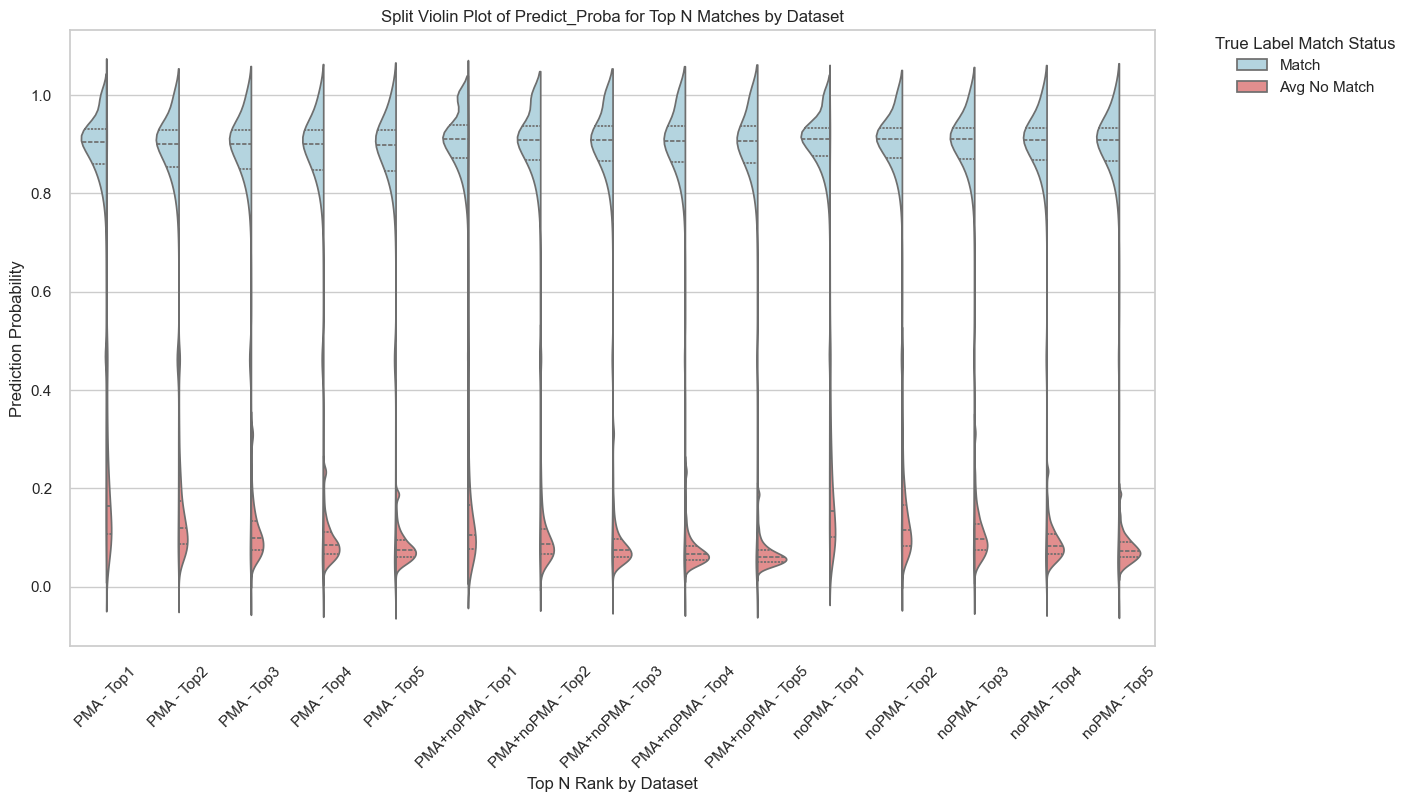

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the desired order of datasets
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']

# Ensure 'Dataset' column is ordered accordingly
plot_df['Dataset'] = pd.Categorical(plot_df['Dataset'], categories=dataset_order, ordered=True)

# Combine Rank and Dataset into a single column for the x-axis
plot_df['Rank_Dataset'] = plot_df['Dataset'].astype(str) + ' - ' + plot_df['Rank']

# Sort the DataFrame based on this new column to maintain order
plot_df = plot_df.sort_values(by='Rank_Dataset')

# Set up the plot
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(
    x='Rank_Dataset',
    y='Proba',
    hue='Match',
    data=plot_df,
    split=True,
    inner="quart",
    palette={"Match": "lightblue", "Avg No Match": "lightcoral"}
)

# Customize the plot
plt.title('Split Violin Plot of Predict_Proba for Top N Matches by Dataset')
plt.ylabel('Prediction Probability')
plt.xlabel('Top N Rank by Dataset')
plt.xticks(rotation=45)
plt.legend(title='True Label Match Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()
plt.close()


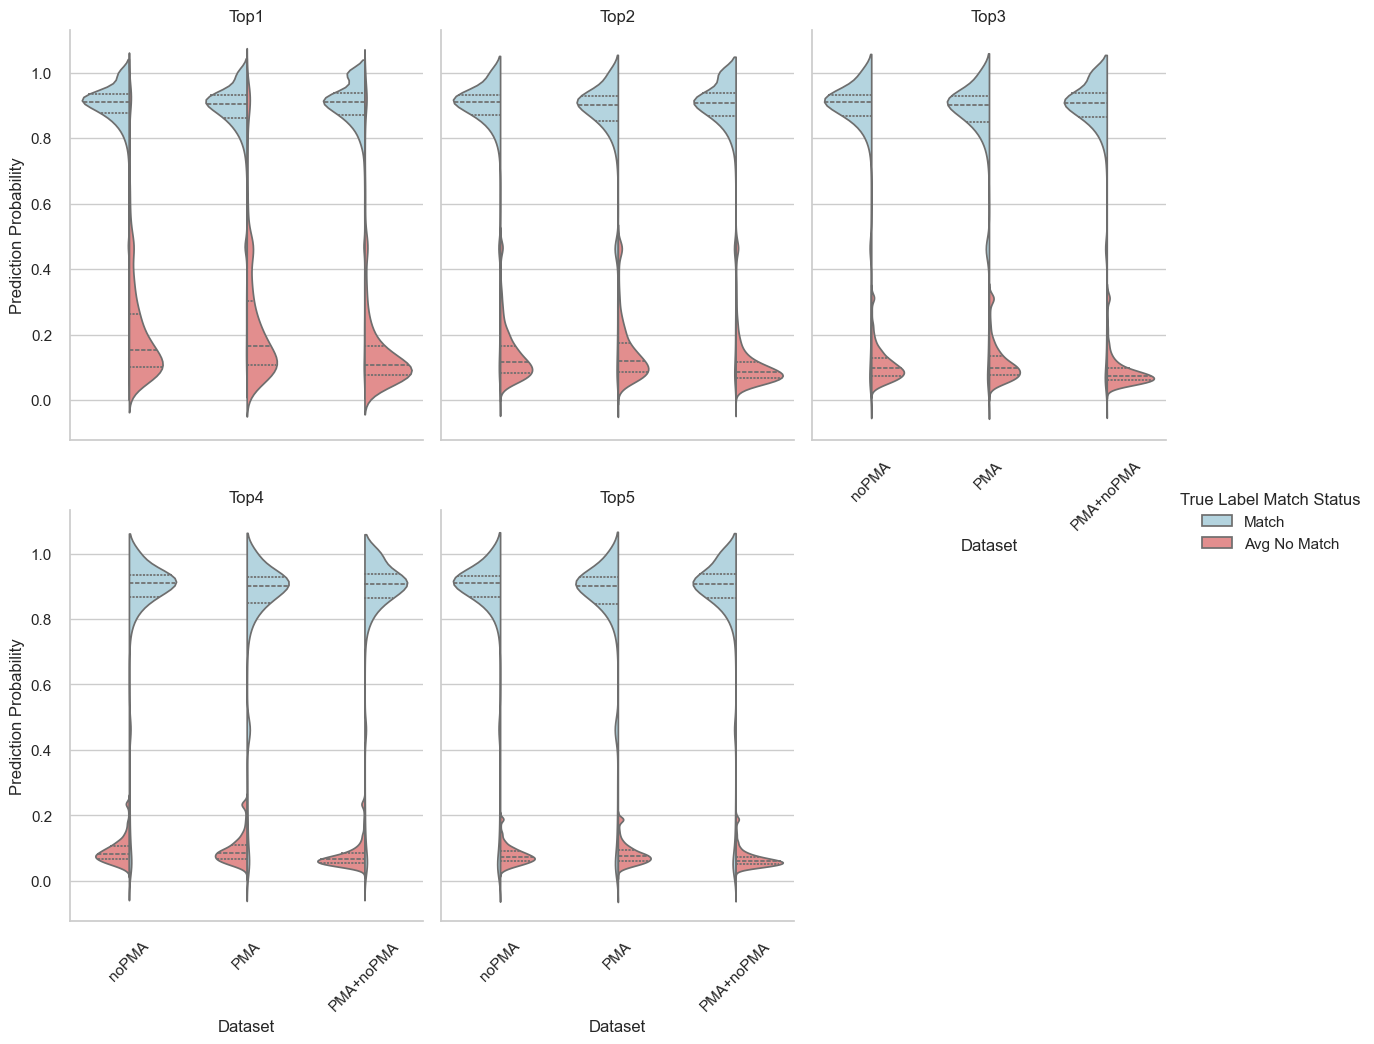

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Adjust the aspect ratio and use col_wrap to reduce the width
g = sns.FacetGrid(
    plot_df,
    col="Rank",        # Separate plot for each rank
    height=5,          # Adjust height to reduce overall size
    aspect=0.8,        # Reduce the aspect ratio to make the plots narrower
    col_wrap=3         # Wrap the plots into 3 columns
)

# Map the violin plot onto the FacetGrid
g.map_dataframe(
    sns.violinplot,
    x='Dataset',
    y='Proba',
    hue='Match',
    split=True,
    inner="quart",
    palette={"Match": "lightblue", "Avg No Match": "lightcoral"}
)

# Adjust the legend
g.add_legend(title='True Label Match Status')

# Set titles and labels
g.set_axis_labels("Dataset", "Prediction Probability")
g.set_titles("{col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Show the plot
# plt.savefig(f'B:/Catboost_models_FeatRed08_top5_predProbDist.svg',dpi=300)
plt.show()
plt.close()

stacked bar proportion plot for match vs not matching

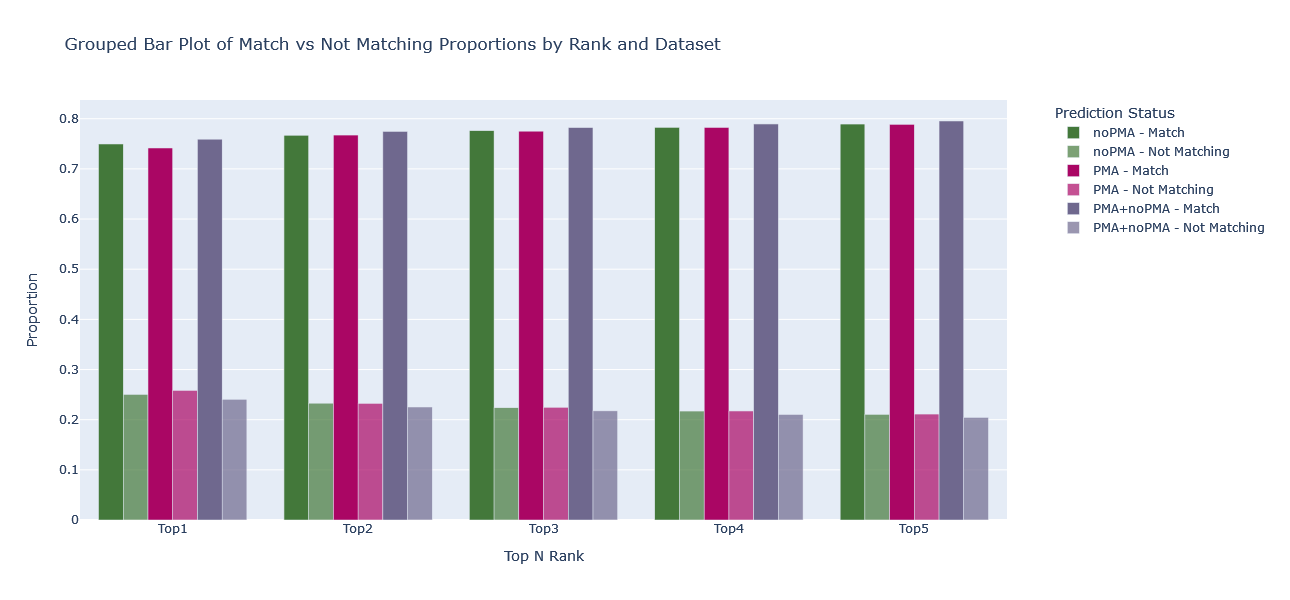

In [217]:
import plotly.graph_objs as go
import pandas as pd

# Calculate counts of matches and non-matches for each dataset and rank
proportion_df = plot_df.groupby(['Dataset', 'Rank', 'Match']).size().reset_index(name='Count')

# Rename 'Avg No Match' to 'Not Matching'
proportion_df['Match'] = proportion_df['Match'].replace('Avg No Match', 'Not Matching')

# Calculate the total count per Dataset and Rank
total_counts = proportion_df.groupby(['Dataset', 'Rank'])['Count'].transform('sum')

# Calculate the proportion
proportion_df['Proportion'] = proportion_df['Count'] / total_counts

# Ensure the datasets are ordered correctly
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']
proportion_df['Dataset'] = pd.Categorical(proportion_df['Dataset'], categories=dataset_order, ordered=True)

# Create the Plotly figure
fig = go.Figure()

# Loop through each dataset and add traces for stacking with adjusted alpha
for dataset in dataset_order:
    for match_status, alpha in zip(['Match', 'Not Matching'], [1.0, 0.7]):
        filtered_df = proportion_df[(proportion_df['Match'] == match_status) & (proportion_df['Dataset'] == dataset)]
        fig.add_trace(go.Bar(
            x=filtered_df['Rank'],
            y=filtered_df['Proportion'],
            name=f'{dataset} - {match_status}',
            marker=dict(color={'noPMA': '#43783A', 'PMA': '#aa0664', 'PMA+noPMA': '#6F688E'}[dataset]),
            opacity=alpha,
        ))

# Update layout to group bars and stretch the plot horizontally for better visibility
fig.update_layout(
    barmode='group',  # Group the bars by rank
    title='Grouped Bar Plot of Match vs Not Matching Proportions by Rank and Dataset',
    xaxis_title='Top N Rank',
    yaxis_title='Proportion',
    legend_title='Prediction Status',
    legend=dict(x=1.05, y=1),
    width=1200,  # Stretching the width of the plot area
    height=600   # You can adjust the height too if necessary
)

# Show the plot
fig.show()


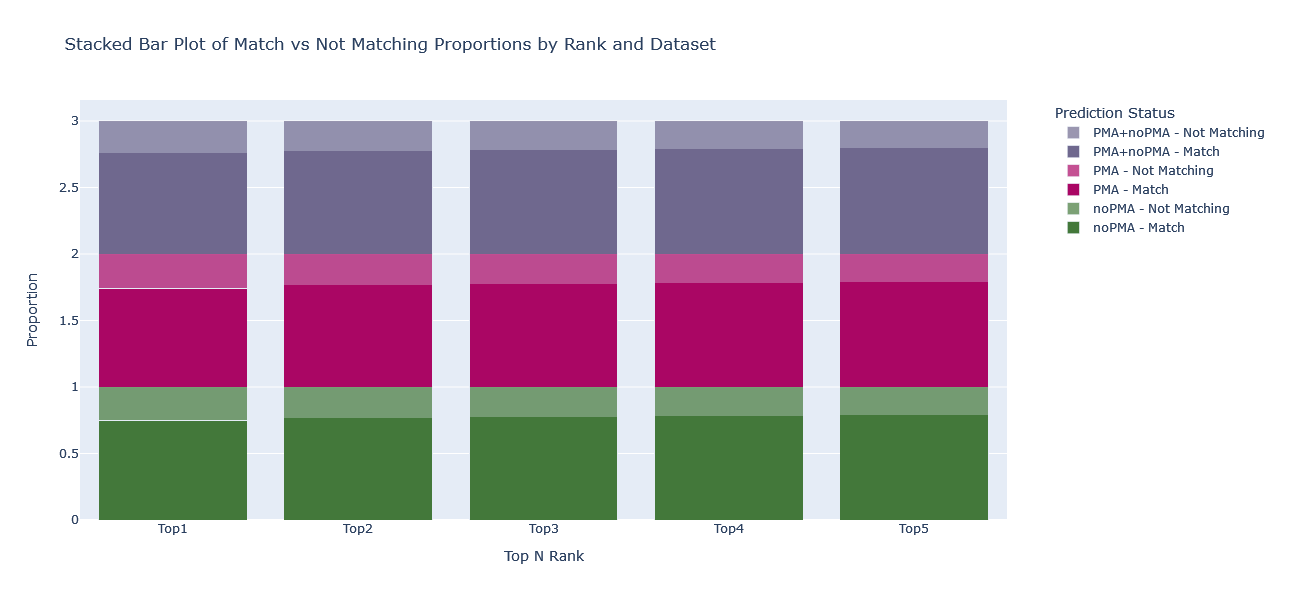

In [218]:
import plotly.graph_objs as go
import pandas as pd

# Calculate counts of matches and non-matches for each dataset and rank
proportion_df = plot_df.groupby(['Dataset', 'Rank', 'Match']).size().reset_index(name='Count')

# Rename 'Avg No Match' to 'Not Matching'
proportion_df['Match'] = proportion_df['Match'].replace('Avg No Match', 'Not Matching')

# Calculate the total count per Dataset and Rank
total_counts = proportion_df.groupby(['Dataset', 'Rank'])['Count'].transform('sum')

# Calculate the proportion
proportion_df['Proportion'] = proportion_df['Count'] / total_counts

# Ensure the datasets are ordered correctly
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']
proportion_df['Dataset'] = pd.Categorical(proportion_df['Dataset'], categories=dataset_order, ordered=True)

# Create the Plotly figure
fig = go.Figure()

# Loop through each dataset and add traces for stacking with adjusted alpha
for dataset in dataset_order:
    for match_status, alpha in zip(['Match', 'Not Matching'], [1.0, 0.7]):
        filtered_df = proportion_df[(proportion_df['Match'] == match_status) & (proportion_df['Dataset'] == dataset)]
        fig.add_trace(go.Bar(
            x=filtered_df['Rank'],
            y=filtered_df['Proportion'],
            name=f'{dataset} - {match_status}',
            marker=dict(color={'noPMA': '#43783A', 'PMA': '#aa0664', 'PMA+noPMA': '#6F688E'}[dataset]),
            opacity=alpha,
        ))

# Update layout to stack bars and stretch the plot horizontally for better visibility
fig.update_layout(
    barmode='stack',  # Use stack mode to stack "Not Matching" on top of "Match"
    title='Stacked Bar Plot of Match vs Not Matching Proportions by Rank and Dataset',
    xaxis_title='Top N Rank',
    yaxis_title='Proportion',
    legend_title='Prediction Status',
    legend=dict(x=1.05, y=1),
    width=1200,  # Stretching the width of the plot area
    height=600   # You can adjust the height too if necessary
)

# Show the plot
fig.show()


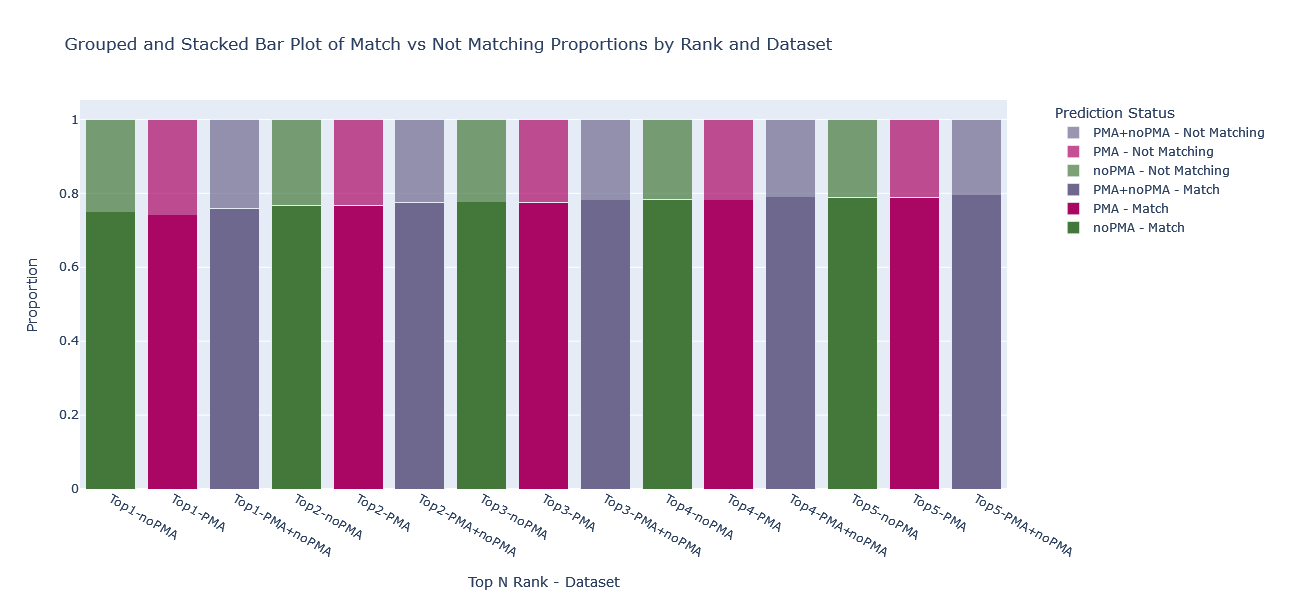

In [221]:
import plotly.graph_objs as go
import pandas as pd

# Calculate counts of matches and non-matches for each dataset and rank
proportion_df = plot_df.groupby(['Dataset', 'Rank', 'Match']).size().reset_index(name='Count')

# Rename 'Avg No Match' to 'Not Matching'
proportion_df['Match'] = proportion_df['Match'].replace('Avg No Match', 'Not Matching')

# Calculate the total count per Dataset and Rank
total_counts = proportion_df.groupby(['Dataset', 'Rank'])['Count'].transform('sum')

# Calculate the proportion
proportion_df['Proportion'] = proportion_df['Count'] / total_counts

# Ensure the datasets are ordered correctly
dataset_order = ['noPMA', 'PMA', 'PMA+noPMA']
proportion_df['Dataset'] = pd.Categorical(proportion_df['Dataset'], categories=dataset_order, ordered=True)

# Combine rank and dataset for custom x-axis ordering
proportion_df['Rank_Dataset'] = proportion_df['Rank'].astype(str) + '-' + proportion_df['Dataset'].astype(str)

# Create the Plotly figure
fig = go.Figure()

# Loop through each match status and add traces for stacking within groups
for match_status, alpha in zip(['Match', 'Not Matching'], [1.0, 0.7]):
    for dataset in dataset_order:
        filtered_df = proportion_df[(proportion_df['Match'] == match_status) & (proportion_df['Dataset'] == dataset)]
        fig.add_trace(go.Bar(
            x=filtered_df['Rank_Dataset'],  # Custom x-axis with combined rank and dataset
            y=filtered_df['Proportion'],
            name=f'{dataset} - {match_status}',
            marker=dict(color={'noPMA': '#43783A', 'PMA': '#aa0664', 'PMA+noPMA': '#6F688E'}[dataset]),
            opacity=alpha,
        ))

# Define the custom x-axis order
custom_x_order = []
for rank in sorted(proportion_df['Rank'].unique(), key=lambda x: int(x.replace('Top', ''))):
    for dataset in dataset_order:
        custom_x_order.append(f"{rank}-{dataset}")

# Update layout to stack within groups and set the custom x-axis order
fig.update_layout(
    barmode='stack',  # Stack bars within each group
    title='Grouped and Stacked Bar Plot of Match vs Not Matching Proportions by Rank and Dataset',
    xaxis=dict(
        title='Top N Rank - Dataset',
        categoryorder='array',
        categoryarray=custom_x_order  # Apply the custom x-axis order
    ),
    yaxis_title='Proportion',
    legend_title='Prediction Status',
    legend=dict(x=1.05, y=1),
    width=1200,  # Adjust the width for better visibility
    height=600   # Adjust the height if necessary
)

# Show the plot
fig.show()


In [226]:
len(['Collected_Controls',
 'Metabolite',
 'COX',
 'AChR',
 'Apoptosis_Autophagy',
 'Antibacterial',
 'Adrenergic_Receptor',
 '5-HT',
 'Dopamine',
 'DNA/RNA_Associated',
 'NFkB',
 'PI3K',
 'Histamine_Receptor',
 'Topoisomerase',
 'Estrogen_Receptor',
 'CDK',
 'EGFR',
 'Sodium_Channel',
 'Calcium_Channel',
 'GABA',
 'Penicillin_Binding',
 'Cytochrome',
 'Potassium_Channel',
 'Bacterial_Ribosome',
 'HDAC',
 'PDE',
 'PPAR',
 'Microtubule_Associated',
 'Antioxidant',
 'Transient_Receptor',
 'Glucocorticoid_Receptor',
 'JAK',
 'MAO',
 'Androgen_Receptor',
 'VEGFR',
 'Antifungal',
 'HIV',
 'Prostaglandin',
 'MAPK',
 'Tyrosine_Kinase',
 'AMPK',
 'HSP',
 'Opioid_Receptor',
 'mTOR',
 'PARP',
 'AKT',
 'Mitochondria_Associated',
 'HIF',
 'c-Met_HGFR',
 'FGFR',
 'TGF',
 'STAT',
 'NOS',
 'ROS',
 'Wnt/beta-Catenin',
 'Fatty_Acid',
 'ERK',
 'Sirtuin',
 'Histone_Methyltransferase',
 'Parasite',
 'Serotonin',
 'BCL',
 'Steroid_Biosynthesis',
 'PKC',
 'GPCR',
 'TLR',
 'NMDA_Receptor',
 'Anti-infection',
 'ALK',
 'Cannabinoid_Receptor',
 'Rho/ROCK',
 'Ras',
 'GSK',
 'BRD',
 'DUB',
 'Adenosine_Receptor',
 'Influenza_Virus',
 'AChE',
 'P2_Receptor',
 'Dihydropteroate_Synthase',
 'Reverse_Transcriptase',
 'MEK',
 'AURK',
 'Progesterone_Receptor'])

84

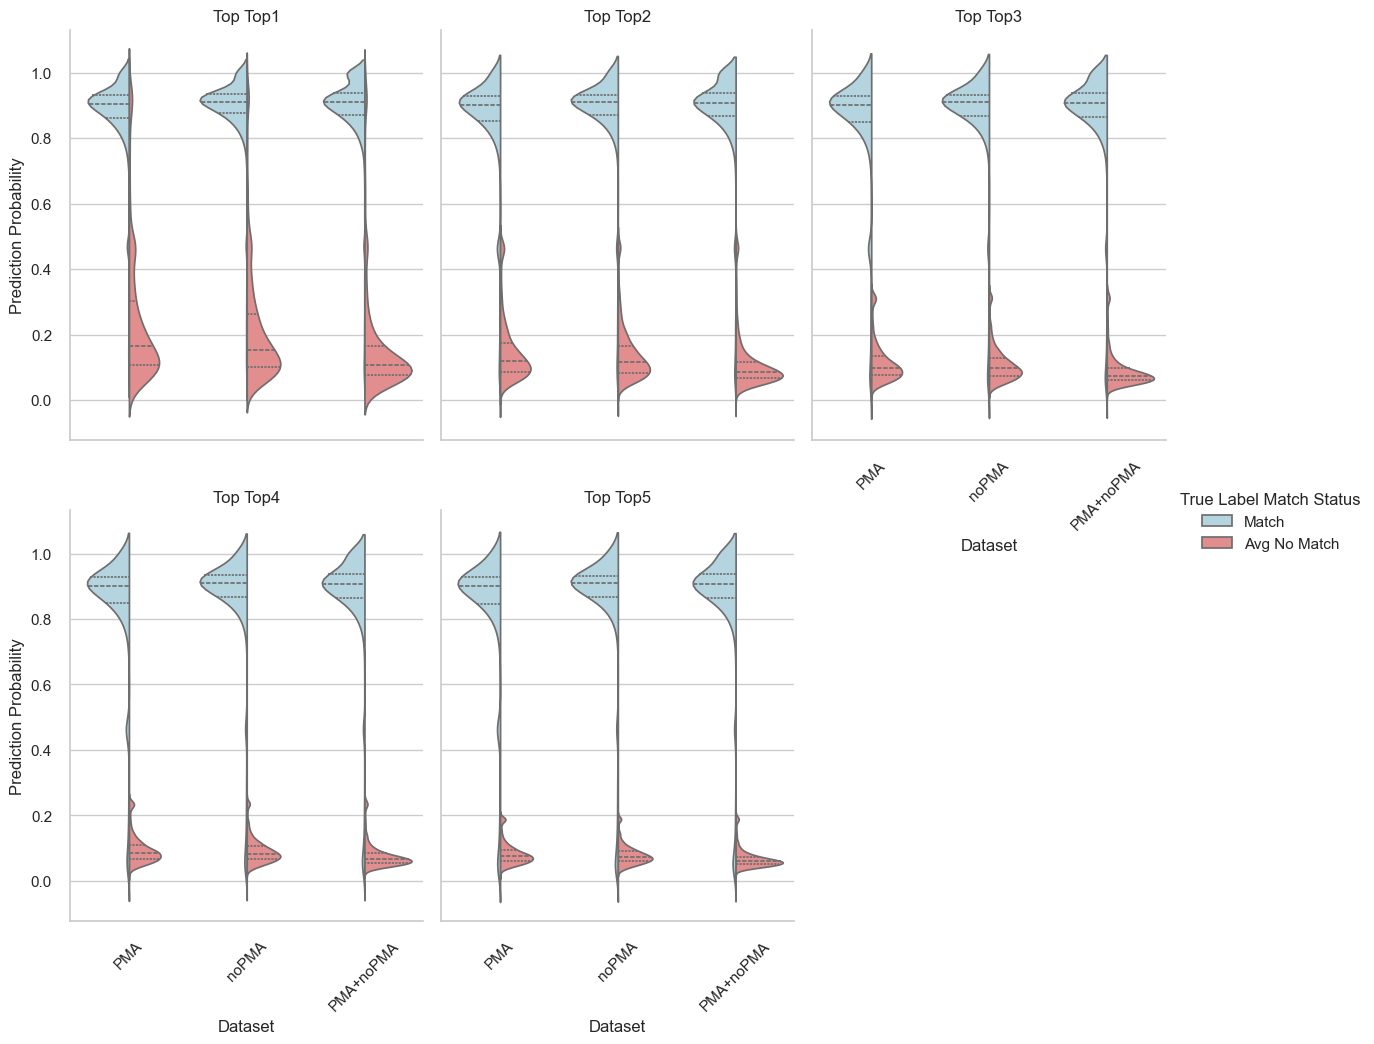

In [186]:
# just some attempts at movign the lengend as plotting, it doesnt' work...
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Adjust the aspect ratio and use col_wrap to reduce the width
g = sns.FacetGrid(
    plot_df,
    col="Rank",        # Separate plot for each rank
    height=5,          # Adjust height to reduce overall size
    aspect=0.8,        # Reduce the aspect ratio to make the plots narrower
    col_wrap=3         # Wrap the plots into 3 columns
)

# Map the violin plot onto the FacetGrid
g.map_dataframe(
    sns.violinplot,
    x='Dataset',
    y='Proba',
    hue='Match',
    split=True,
    inner="quart",
    palette={"Match": "lightblue", "Avg No Match": "lightcoral"}
)

# Set titles and labels
g.set_axis_labels("Dataset", "Prediction Probability")
g.set_titles("Top {col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Find an empty subplot and place the legend there
empty_ax = None
for ax in g.axes.flat:
    if not ax.has_data():  # Check if the axis is empty
        empty_ax = ax
        break

if empty_ax:
    # Place the legend in the empty axis
    empty_ax.legend(*g.map_dataframe(sns.violinplot, x='Dataset', y='Proba', hue='Match').legend_elements(),
                    title='True Label Match Status', loc='center', frameon=False)
    empty_ax.set_axis_off()  # Hide the axis ticks and labels
else:
    # If no empty axis, place the legend manually
    g.add_legend(title='True Label Match Status')

# Show the plot
plt.show()
plt.close()


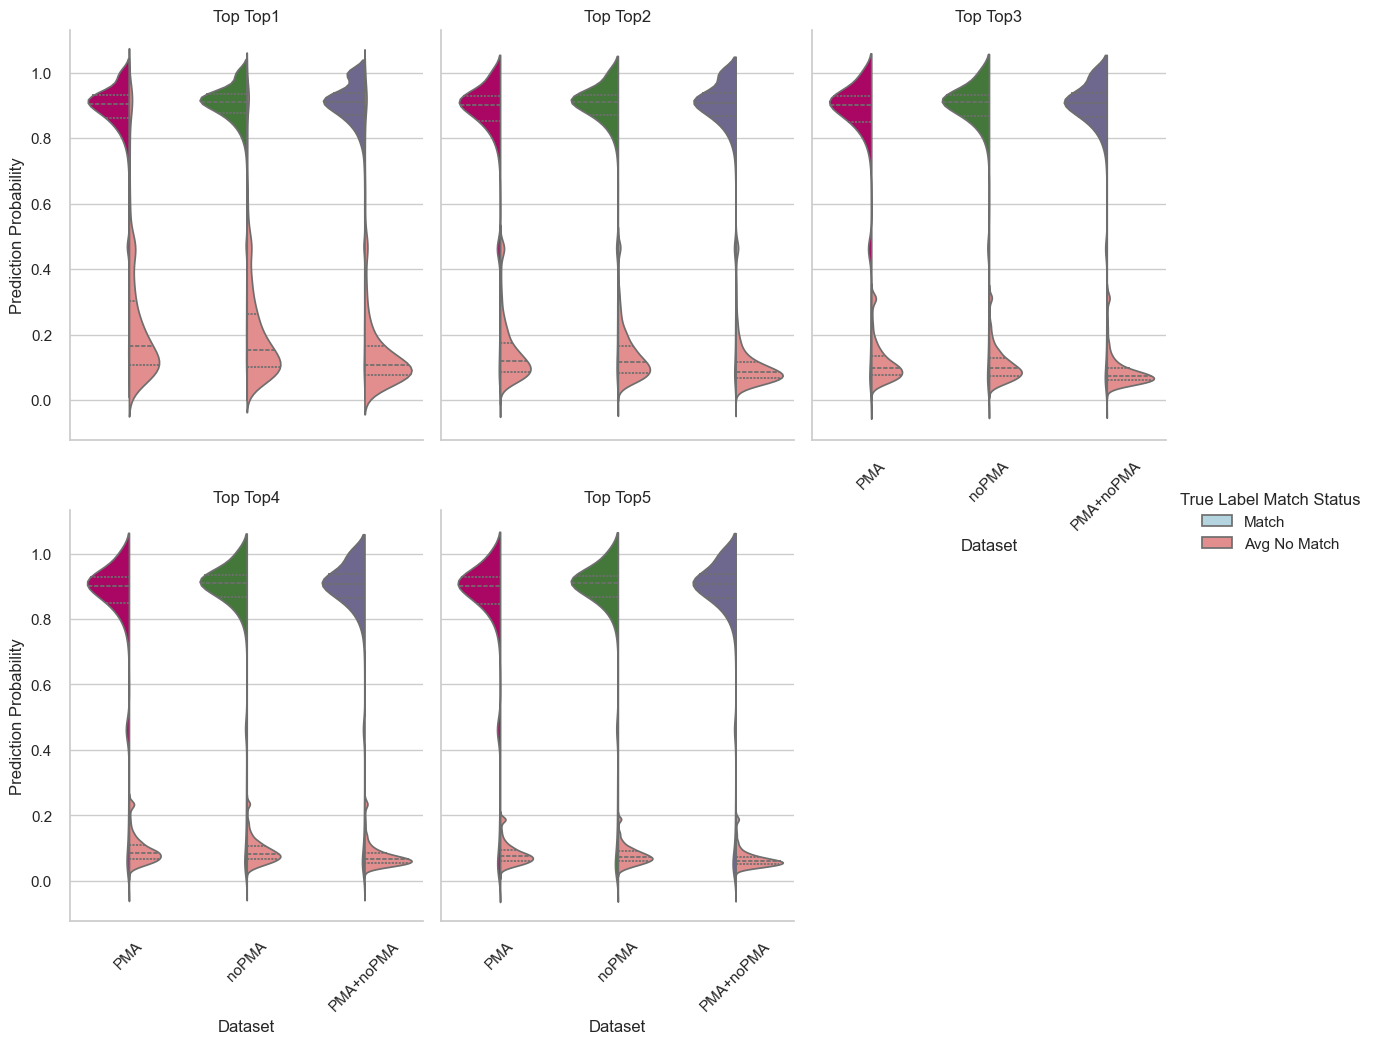

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color scheme for the datasets
dataset_palette = {
    'PMA+noPMA': '#6F688E',  # Using HEX code from nopma_pma_1color
    'PMA': '#aa0664',         # Using HEX code from pma_1color
    'noPMA': '#43783A'        # Using HEX code from nopma_1color
}

# Define the color scheme for 'Match' and 'Avg No Match'
match_palette = {
    'Match': 'lightblue', 
    'Avg No Match': 'lightcoral'
}

# Set up the plot aesthetics
sns.set(style="whitegrid")

# Adjust the aspect ratio and use col_wrap to reduce the width
g = sns.FacetGrid(
    plot_df,
    col="Rank",        # Separate plot for each rank
    height=5,          # Adjust height to reduce overall size
    aspect=0.8,        # Reduce the aspect ratio to make the plots narrower
    col_wrap=3         # Wrap the plots into 3 columns
)

# Custom function to apply the correct colors
def custom_violinplot(*args, **kwargs):
    sns.violinplot(
        *args, **kwargs, 
        split=True, 
        inner="quart",  # Ensure quartile lines are drawn
        palette=match_palette  # Use the match_palette for splitting
    )

# Map the violin plot onto the FacetGrid with custom colors
g.map_dataframe(custom_violinplot, x='Dataset', y='Proba', hue='Match')

# Re-apply the dataset colors to each violin while keeping the quartile lines
for ax in g.axes.flat:
    for i, artist in enumerate(ax.collections[::2]):  # Step through every other collection to target the violins
        dataset = plot_df['Dataset'].unique()[i % len(plot_df['Dataset'].unique())]  # Cycle through dataset names
        artist.set_facecolor(dataset_palette[dataset])  # Apply the custom color to the dataset violin

# Set titles and labels
g.set_axis_labels("Dataset", "Prediction Probability")
g.set_titles("Top {col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Find an empty subplot and place the legend there
empty_ax = None
for ax in g.axes.flat:
    if not ax.has_data():  # Check if the axis is empty
        empty_ax = ax
        break

if empty_ax:
    # Place the legend in the empty axis
    empty_ax.legend(*g.map_dataframe(sns.violinplot, x='Dataset', y='Proba', hue='Match').legend_elements(),
                    title='True Label Match Status', loc='center', frameon=False)
    empty_ax.set_axis_off()  # Hide the axis ticks and labels
else:
    # If no empty axis, place the legend manually
    g.add_legend(title='True Label Match Status')

# Show the plot
plt.show()
plt.close()


we did split violins to plot the prediction probabilities for annotation match found in rank 1-5 and avg of rank probabilities for no annotation match. let's make just match probabilities violins

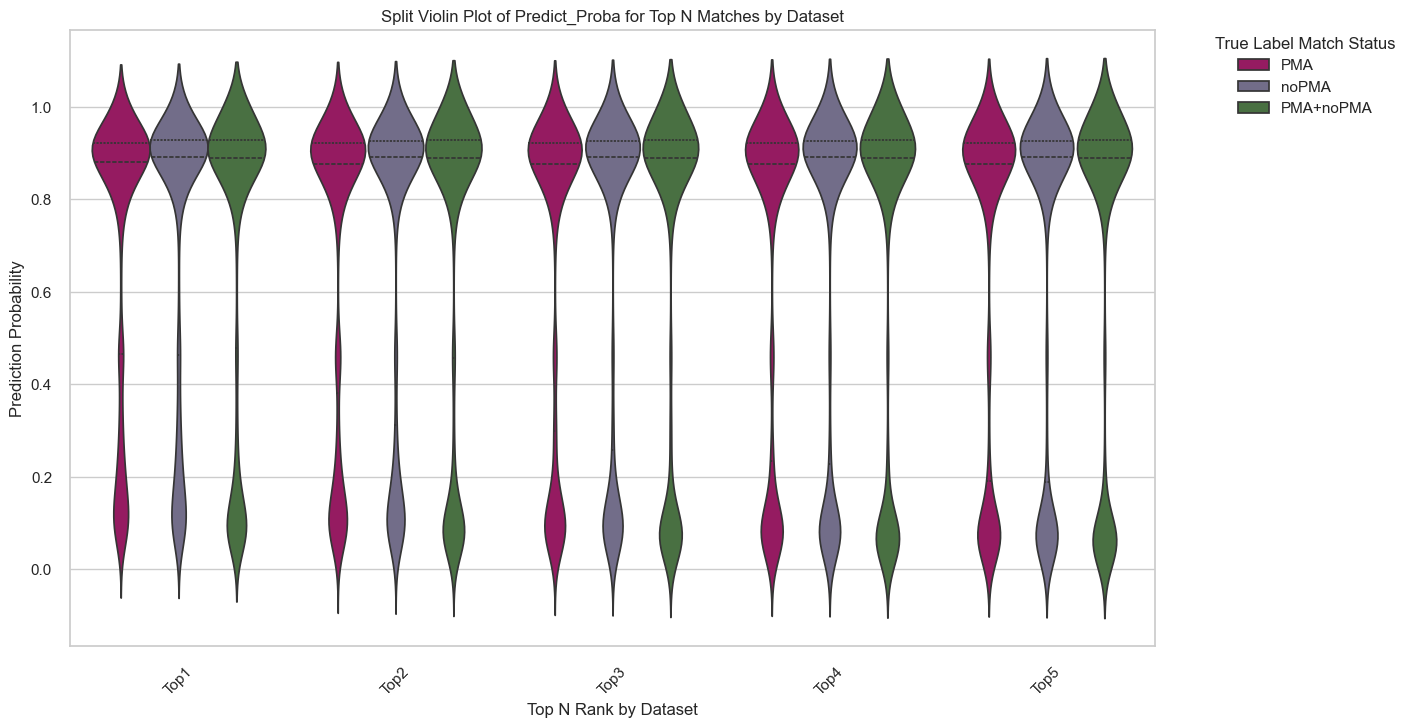

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine Rank and Dataset into a single column for the x-axis
plot_df['Rank_Dataset'] = plot_df['Dataset'] + ' - ' + plot_df['Rank']

nopma_pma_1color ={'RGB':(111,104,142), 'HEX': '#6F688E'}
pma_1color ={'RGB':(170,6,100), 'HEX': '#aa0664'}
nopma_1color ={'RGB':(67,120,58), 'HEX': '#43783A'}


# Set up the plot
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(
    x='Rank',
    y='Proba',
    hue='Dataset',
    data=plot_df,
    # split=True,
    inner="quart",
    # palette={"Match": "lightblue", "Avg No Match": "lightcoral"}
    palette={'PMA': '#aa0664','noPMA':'#6F688E','PMA+noPMA':'#43783A'}
)

# Customize the plot
plt.title('Split Violin Plot of Predict_Proba for Top N Matches by Dataset')
plt.ylabel('Prediction Probability')
plt.xlabel('Top N Rank by Dataset')
plt.xticks(rotation=45)
plt.legend(title='True Label Match Status', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()
plt.close()

### plottings

In [229]:
[ix for ix in globals().keys() if not ix.startswith('_') and 'best' in ix]

['best_noPMA_UMAP_model',
 'best_noPMA_UMAP_model_final',
 'best_horiz_PMA_noPMA_UMAP_model',
 'best_horiz_PMA_noPMA_UMAP_model_final',
 'best_PMA_UMAP_model',
 'best_PMA_UMAP_model_final',
 'best_PMA_Red08_model',
 'best_PMA_Red08_model_final',
 'best_noPMA_Red08_model',
 'best_noPMA_Red08_model_final',
 'best_PMA_noPMA_Red08_model',
 'best_PMA_noPMA_Red08_model_final']

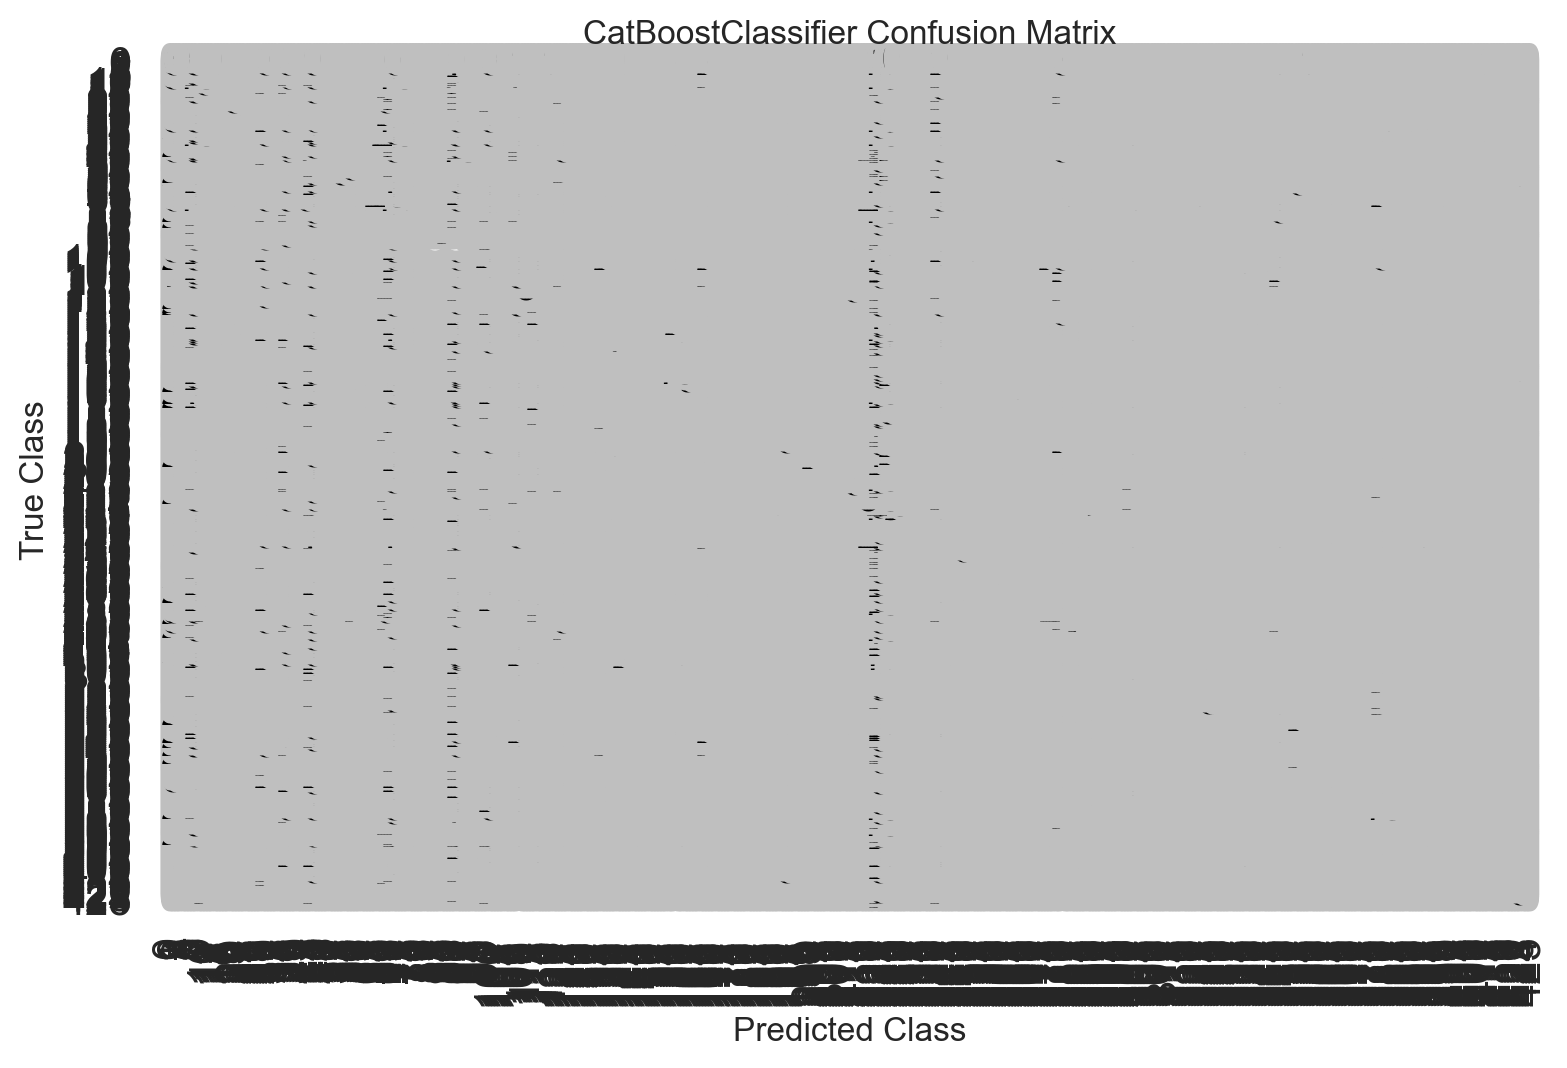

In [234]:
s_PMA_noPMA_Red08_experiment.plot_model(best_PMA_noPMA_Red08_model,"confusion_matrix", scale=2)
# help(plot_model)